# Analysing OSM history data for Zakarpattia before the bombing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, text

In [2]:
# creating connection to PostreSQL and querying database 
import psycopg2
 
# declare the connection string specifying the  hostname, database name, user name, and password
conn_string = "host='localhost' dbname='Ukraine'\
user='postgres' password='Open@close'"
 
# using the connection string to establish the connection
conn = psycopg2.connect(conn_string)

#creating engine 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

In [3]:
#querying postgres to fetch data of zakar for the 6 months before the bombing 
query1 = "SELECT * FROM merged1 WHERE timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd') AND latitude BETWEEN 47.8968940 AND 49.0973238 AND longitude BETWEEN 22.1370590 AND 24.6274681;"

In [4]:
#storing in a dataframe
zakar_1= pd.read_sql(query1, con=engine)
zakar_1.head()

id  changeset deleted                  timestamp       uid  \
0  9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1  9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2  9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3  9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4  9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   

          user  version visibility    tp   extra   latitude  longitude  
0      VARVAR8        1       true  node  265180  48.094359  24.404803  
1  muchichka_s        1       true  node  265818  48.315407  24.355062  
2  muchichka_s        1       true  node  267905  48.297057  24.383481  
3  M_Solodzhuk        1       true  node  273083  49.014364  22.779738  
4      kagebar        1       true  node  274498  48.519944  23.111179

In [5]:
#removing duplicate raws 
zakar_1=zakar_1.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
zakar_1.head()

id  changeset deleted                  timestamp       uid  \
0  9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1  9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2  9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3  9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4  9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   

          user  version visibility    tp   extra   latitude  longitude  
0      VARVAR8        1       true  node  265180  48.094359  24.404803  
1  muchichka_s        1       true  node  265818  48.315407  24.355062  
2  muchichka_s        1       true  node  267905  48.297057  24.383481  
3  M_Solodzhuk        1       true  node  273083  49.014364  22.779738  
4      kagebar        1       true  node  274498  48.519944  23.111179

In [6]:
#splitting date only from timestamp and adding to the daraframe
zakar_1['date'] = zakar_1.loc[:, 'timestamp'].astype(str).str.split().str[0]
zakar_1.head()

id  changeset deleted                  timestamp       uid  \
0  9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1  9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2  9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3  9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4  9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   

          user  version visibility    tp   extra   latitude  longitude  \
0      VARVAR8        1       true  node  265180  48.094359  24.404803   
1  muchichka_s        1       true  node  265818  48.315407  24.355062   
2  muchichka_s        1       true  node  267905  48.297057  24.383481   
3  M_Solodzhuk        1       true  node  273083  49.014364  22.779738   
4      kagebar        1       true  node  274498  48.519944  23.111179   

         date  
0  2021-11-16  
1  2021-11-17  
2  2021-11-17  
3  2021-11-17  
4  2021-11-17

In [7]:
zakar_1

id  changeset deleted                  timestamp       uid  \
0       9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1       9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2       9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3       9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4       9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   
...            ...        ...     ...                        ...       ...   
549680  9344555132  115021473   false  2021-12-16 19:01:24+00:00  10215904   
549681  3860888507  110693612   false  2021-09-03 20:36:48+01:00  13749532   
549682  5713954157  114597634   false  2021-12-05 23:16:10+00:00   3850484   
549683  9057255958  110640065   false  2021-09-02 21:59:50+01:00   3850484   
549684  9057255958  114747435    true  2021-12-09 14:46:49+00:00   1435498   

               user  version visibility    tp   extra   latitude  longitude  \
0           VARVAR8        1       true  node  265180  48.094359  24.404803   
1       muchichka_s        1       true  node  265818  48.315407  24.355062   
2       muchichka_s        1       true  node  267905  48.297057  24.383481   
3       M_Solodzhuk        1       true  node  273083  49.014364  22.779738   
4           kagebar        1       true  node  274498  48.519944  23.111179   
...             ...      ...        ...   ...     ...        ...        ...   
549680      kagebar        1       true  node   63617  48.533203  22.660054   
549681   kapitansup        2       true  node  182045  48.820883  22.492380   
549682      VARVAR8        3       true  node   48340  48.567337  24.292110   
549683      VARVAR8        1       true  node  311826  48.821310  24.097371   
549684    Rus Ionut        2      false  node  311827  48.821310  24.097371   

              date  
0       2021-11-16  
1       2021-11-17  
2       2021-11-17  
3       2021-11-17  
4       2021-11-17  
...            ...  
549680  2021-12-16  
549681  2021-09-03  
549682  2021-12-05  
549683  2021-09-02  
549684  2021-12-09  

[549685 rows x 13 columns]

### *Assigning Human and Bot categories to changesets* 

In [8]:
#taking only useful columns
zakar1=zakar_1.drop(['latitude','longitude','extra'],axis=1)
zakar1.head()

id  changeset deleted                  timestamp       uid  \
0  9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1  9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2  9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3  9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4  9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   

          user  version visibility    tp        date  
0      VARVAR8        1       true  node  2021-11-16  
1  muchichka_s        1       true  node  2021-11-17  
2  muchichka_s        1       true  node  2021-11-17  
3  M_Solodzhuk        1       true  node  2021-11-17  
4      kagebar        1       true  node  2021-11-17

In [9]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

df1=zakar1.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
df1=df1.groupby(['date','changeset']).count()
df1

id
date       changeset     
2021-08-24 110140624    1
           110154733    5
           110156689  191
           110157551  567
           110158090  134
...                   ...
2022-02-23 117785739  405
           117786257    4
           117786322  725
           117787104  837
           117787427   45

[3930 rows x 1 columns]

In [10]:
df1['category']=df1['id'].apply(lambda x:'human' if x <1000 else 'bot')
df1

id category
date       changeset              
2021-08-24 110140624    1    human
           110154733    5    human
           110156689  191    human
           110157551  567    human
           110158090  134    human
...                   ...      ...
2022-02-23 117785739  405    human
           117786257    4    human
           117786322  725    human
           117787104  837    human
           117787427   45    human

[3930 rows x 2 columns]

In [11]:
#total changesets contribued by each -bot and human
df1.groupby(['category']).count()

id
category      
bot        131
human     3799

In [12]:
#adding category to the original dataframe 
zakar1=zakar1.merge(df1['category'], on='changeset', how='left')
zakar1.head(7)

id  changeset deleted                  timestamp       uid  \
0  9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1  9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2  9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3  9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4  9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   
5  9252611779  113794546   false  2021-11-15 08:48:32+00:00   2309226   
6  9252611796  113794546   false  2021-11-15 08:48:32+00:00   2309226   

          user  version visibility    tp        date category  
0      VARVAR8        1       true  node  2021-11-16    human  
1  muchichka_s        1       true  node  2021-11-17      bot  
2  muchichka_s        1       true  node  2021-11-17    human  
3  M_Solodzhuk        1       true  node  2021-11-17      bot  
4      kagebar        1       true  node  2021-11-17      bot  
5  M_Solodzhuk        1       true  node  2021-11-15      bot  
6  M_Solodzhuk        1       true  node  2021-11-15      bot

In [13]:
zakar1

id  changeset deleted                  timestamp       uid  \
0       9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1       9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2       9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3       9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4       9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   
...            ...        ...     ...                        ...       ...   
549680  9344555132  115021473   false  2021-12-16 19:01:24+00:00  10215904   
549681  3860888507  110693612   false  2021-09-03 20:36:48+01:00  13749532   
549682  5713954157  114597634   false  2021-12-05 23:16:10+00:00   3850484   
549683  9057255958  110640065   false  2021-09-02 21:59:50+01:00   3850484   
549684  9057255958  114747435    true  2021-12-09 14:46:49+00:00   1435498   

               user  version visibility    tp        date category  
0           VARVAR8        1       true  node  2021-11-16    human  
1       muchichka_s        1       true  node  2021-11-17      bot  
2       muchichka_s        1       true  node  2021-11-17    human  
3       M_Solodzhuk        1       true  node  2021-11-17      bot  
4           kagebar        1       true  node  2021-11-17      bot  
...             ...      ...        ...   ...         ...      ...  
549680      kagebar        1       true  node  2021-12-16      bot  
549681   kapitansup        2       true  node  2021-09-03    human  
549682      VARVAR8        3       true  node  2021-12-05      bot  
549683      VARVAR8        1       true  node  2021-09-02      bot  
549684    Rus Ionut        2      false  node  2021-12-09    human  

[549685 rows x 11 columns]

### *Comparing the contribution done by Humans and Bots*

In [14]:
# date-wise grouping based on categories
df2=zakar1.groupby(['date','category']).count()
df2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2021-08-24 bot       1757       1757     1757       1757  1757  1757     1757   
           human     1629       1629     1629       1629  1629  1629     1629   
2021-08-25 bot       1552       1552     1552       1552  1552  1552     1552   
           human     1267       1267     1267       1267  1267  1267     1267   
2021-08-26 bot       2417       2417     2417       2417  2417  2417     2417   
           human     3555       3555     3555       3555  3555  3555     3555   
2021-08-27 human     1471       1471     1471       1471  1471  1471     1471   
2021-08-28 bot       1321       1321     1321       1321  1321  1321     1321   
           human      461        461      461        461   461   461      461   
2021-08-29 bot       1682       1682     1682       1682  1682  1682     1682   

                     visibility    tp  
date       category                    
2021-08-24 bot             1757  1757  
           human           1629  1629  
2021-08-25 bot             1552  1552  
           human           1267  1267  
2021-08-26 bot             2417  2417  
           human           3555  3555  
2021-08-27 human           1471  1471  
2021-08-28 bot             1321  1321  
           human            461   461  
2021-08-29 bot             1682  1682

In [15]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
df3=df2.xs('human', level='category')
df4=df2.xs('bot', level='category')

In [16]:
df3.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24  1629       1629     1629       1629  1629  1629     1629   
2021-08-25  1267       1267     1267       1267  1267  1267     1267   
2021-08-26  3555       3555     3555       3555  3555  3555     3555   

            visibility    tp  
date                          
2021-08-24        1629  1629  
2021-08-25        1267  1267  
2021-08-26        3555  3555

In [17]:
df4.head(3)

id  changeset  deleted  timestamp   uid  user  version  \
date                                                                   
2021-08-24  1757       1757     1757       1757  1757  1757     1757   
2021-08-25  1552       1552     1552       1552  1552  1552     1552   
2021-08-26  2417       2417     2417       2417  2417  2417     2417   

            visibility    tp  
date                          
2021-08-24        1757  1757  
2021-08-25        1552  1552  
2021-08-26        2417  2417

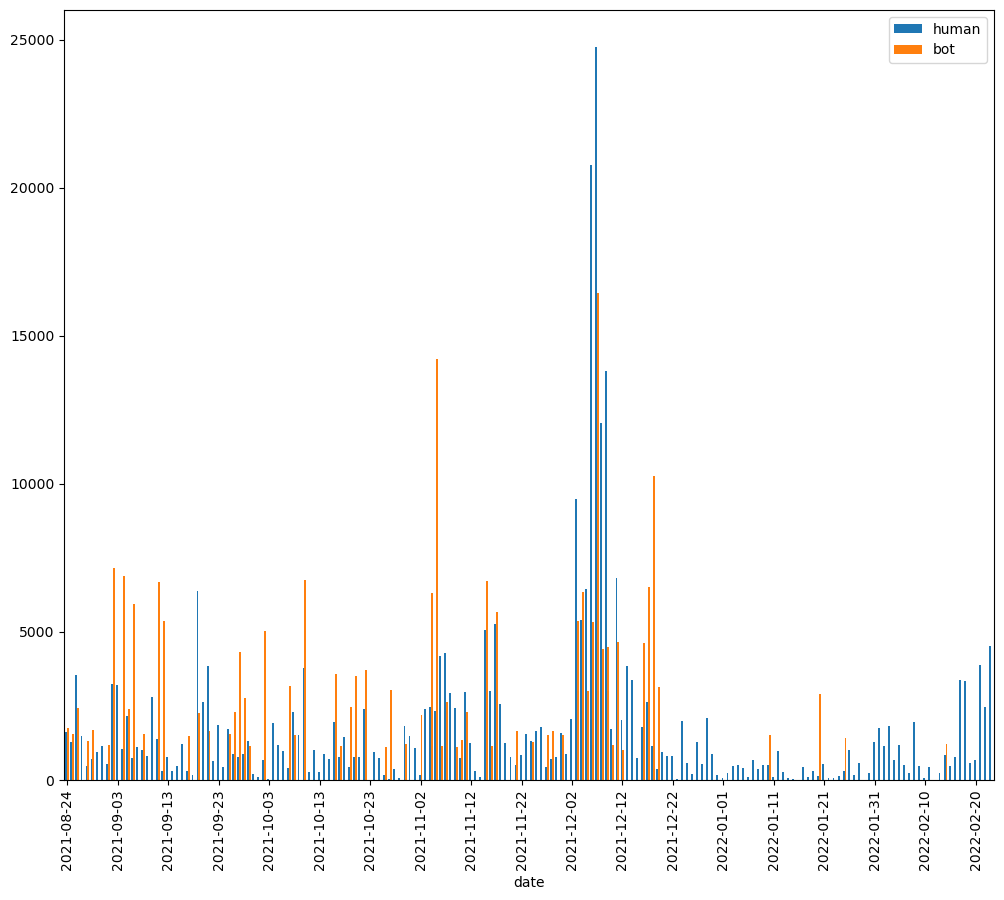

In [18]:
#plotting number of edits by both- human and bot category

x= df3.index
y=df3['changeset']
z=df4['changeset']

df5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
df5 = df5.reset_index(drop=True)

step_size = 10 
ax = df5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week before the bombing*

In [19]:
#counting number of ediits per day for this week and plotting on bar graph
df6= zakar1.loc[(zakar1['date']>='2022-02-17') & (zakar1['date']<'2022-02-26'),:]
df6=df6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df6=df6.groupby(['date']).count()
df6.head(3)

id
date            
2022-02-17  3362
2022-02-18  3340
2022-02-19   571

In [20]:
#statistic measures of edits
df6.describe()

id
count     7.000000
mean   2684.857143
std    1537.706564
min     571.000000
25%    1568.000000
50%    3340.000000
75%    3619.500000
max    4508.000000

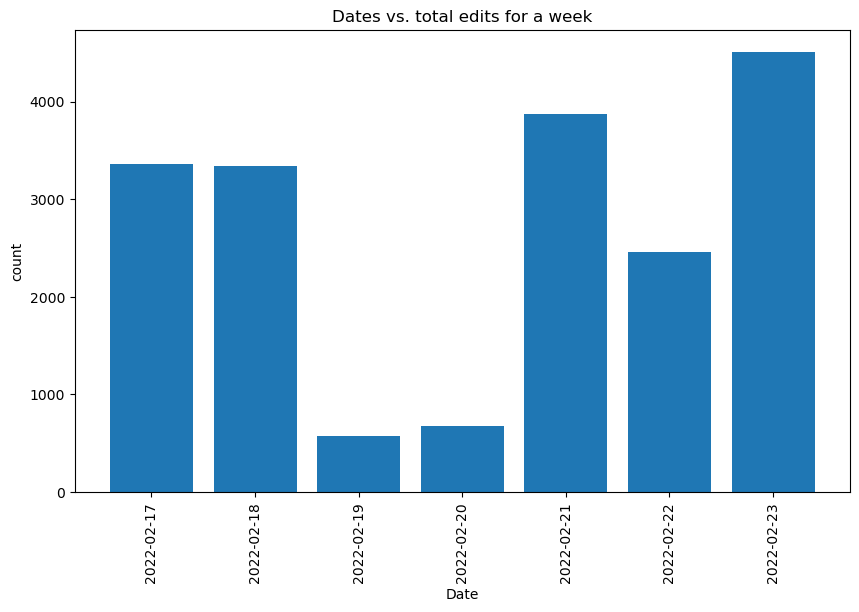

In [21]:
#using bar graph to plot the editing frequency

df6.index = pd.to_datetime(df6.index)
plt.figure(figsize=(10, 6))  
plt.bar(df6.index, df6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month before the bombing*

In [22]:
#counting number of ediits per day for 1 month and plotting on bar graph
df7= zakar1.loc[(zakar1['date']>='2022-01-24') & (zakar1['date']<'2022-02-24'),:]
df7=df7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df7=df7.groupby(['date']).count()
df7.head()

id
date            
2022-01-24   119
2022-01-25  1733
2022-01-26  1007
2022-01-27   165
2022-01-28   561

In [23]:
df7.describe() #statistic measures of edits

id
count    31.000000
mean   1214.032258
std    1214.202852
min       6.000000
25%     336.500000
50%     677.000000
75%    1796.500000
max    4508.000000

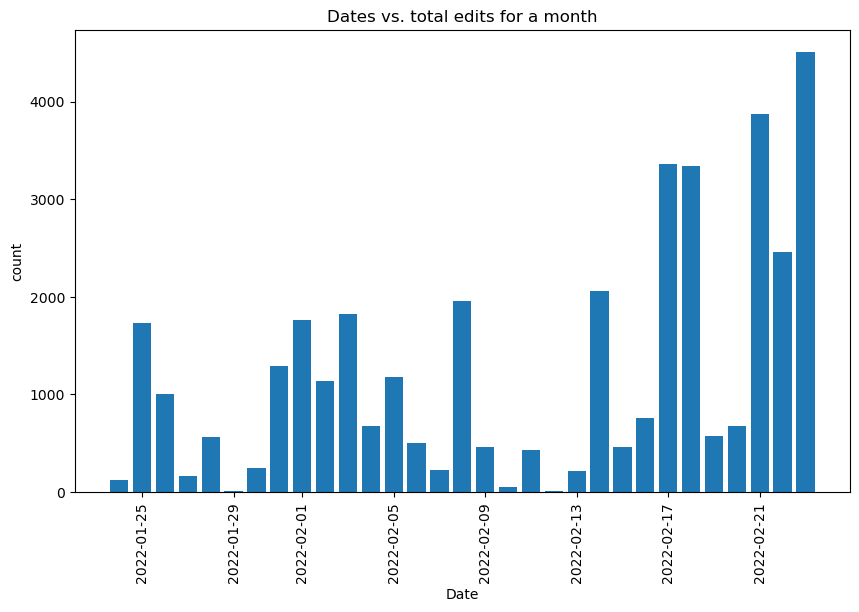

In [24]:
df7.index = pd.to_datetime(df7.index)
plt.figure(figsize=(10, 6))  
plt.bar(df7.index, df7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months before the bombing*

In [25]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
df8= zakar1.loc[(zakar1['date']>'2021-11-25') & (zakar1['date']<'2022-02-24'),:]
df8=df8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df8=df8.groupby(['date']).count()
df8.head()

id
date            
2021-11-26  1781
2021-11-27  1953
2021-11-28  2371
2021-11-29   761
2021-11-30  3120

In [26]:
df8.describe() #statistic measures of edits

id
count     90.000000
mean    2960.788889
std     6033.058580
min        6.000000
25%      309.500000
50%      811.500000
75%     2437.750000
max    41213.000000

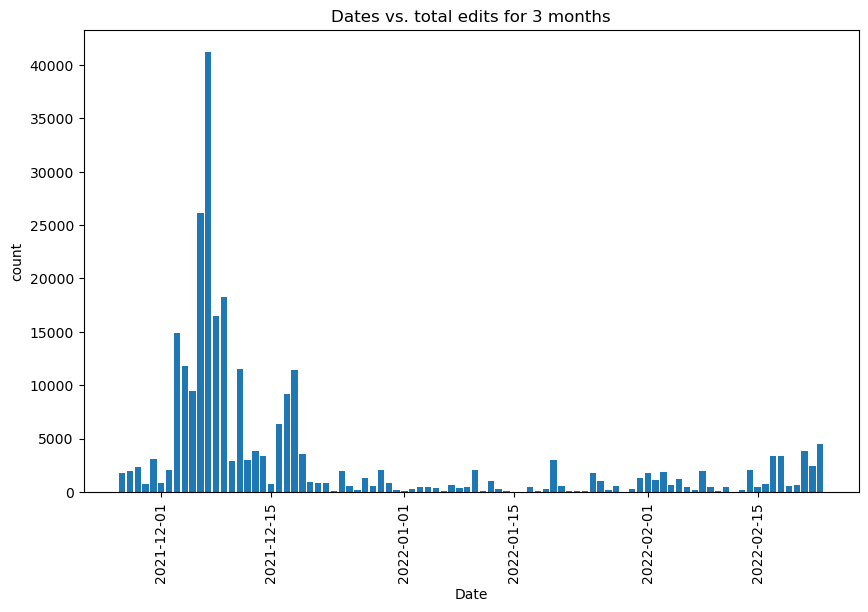

In [27]:
df8.index = pd.to_datetime(df8.index)
plt.figure(figsize=(10, 6))  
plt.bar(df8.index, df8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months before the bombing*

In [28]:
#counting number of ediits per day for the 6 months before bombing and plotting on bar graph

df9=zakar1.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
df9=df9.groupby(['date']).count()
df9.describe()

id
count    184.000000
mean    2987.418478
std     4737.678464
min        6.000000
25%      506.000000
50%     1476.000000
75%     3278.500000
max    41213.000000

In [29]:
#analysing frequency of edits for each month during these 6 months period
dfsep= zakar1.loc[(zakar1['date']>='2021-08-24') & (zakar1['date']<'2021-09-24'),:]
dfsep=dfsep.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfsep=dfsep.groupby(['date']).count()
dfsep=dfsep.reset_index()

In [30]:
dfoct= zakar1.loc[(zakar1['date']>='2021-09-24') & (zakar1['date']<'2021-10-24'),:]
dfoct=dfoct.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfoct=dfoct.groupby(['date']).count()
dfoct=dfoct.reset_index()

In [31]:
dfnov= zakar1.loc[(zakar1['date']>='2021-10-24') & (zakar1['date']<'2021-11-24'),:]
dfnov=dfnov.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfnov=dfnov.groupby(['date']).count()
dfnov=dfnov.reset_index()

In [32]:
dfdec= zakar1.loc[(zakar1['date']>='2021-11-24') & (zakar1['date']<'2021-12-24'),:]
dfdec=dfdec.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfdec=dfdec.groupby(['date']).count()
dfdec=dfdec.reset_index()

In [33]:
dfjan= zakar1.loc[(zakar1['date']>='2021-12-24') & (zakar1['date']<'2022-01-24'),:]
dfjan=dfjan.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dfjan=dfjan.groupby(['date']).count()
dfjan=dfjan.reset_index()


In [34]:
dffeb= zakar1.loc[(zakar1['date']>='2022-01-24') & (zakar1['date']<'2022-02-24'),:]
dffeb=dffeb.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dffeb=dffeb.groupby(['date']).count()
dffeb=dffeb.reset_index()


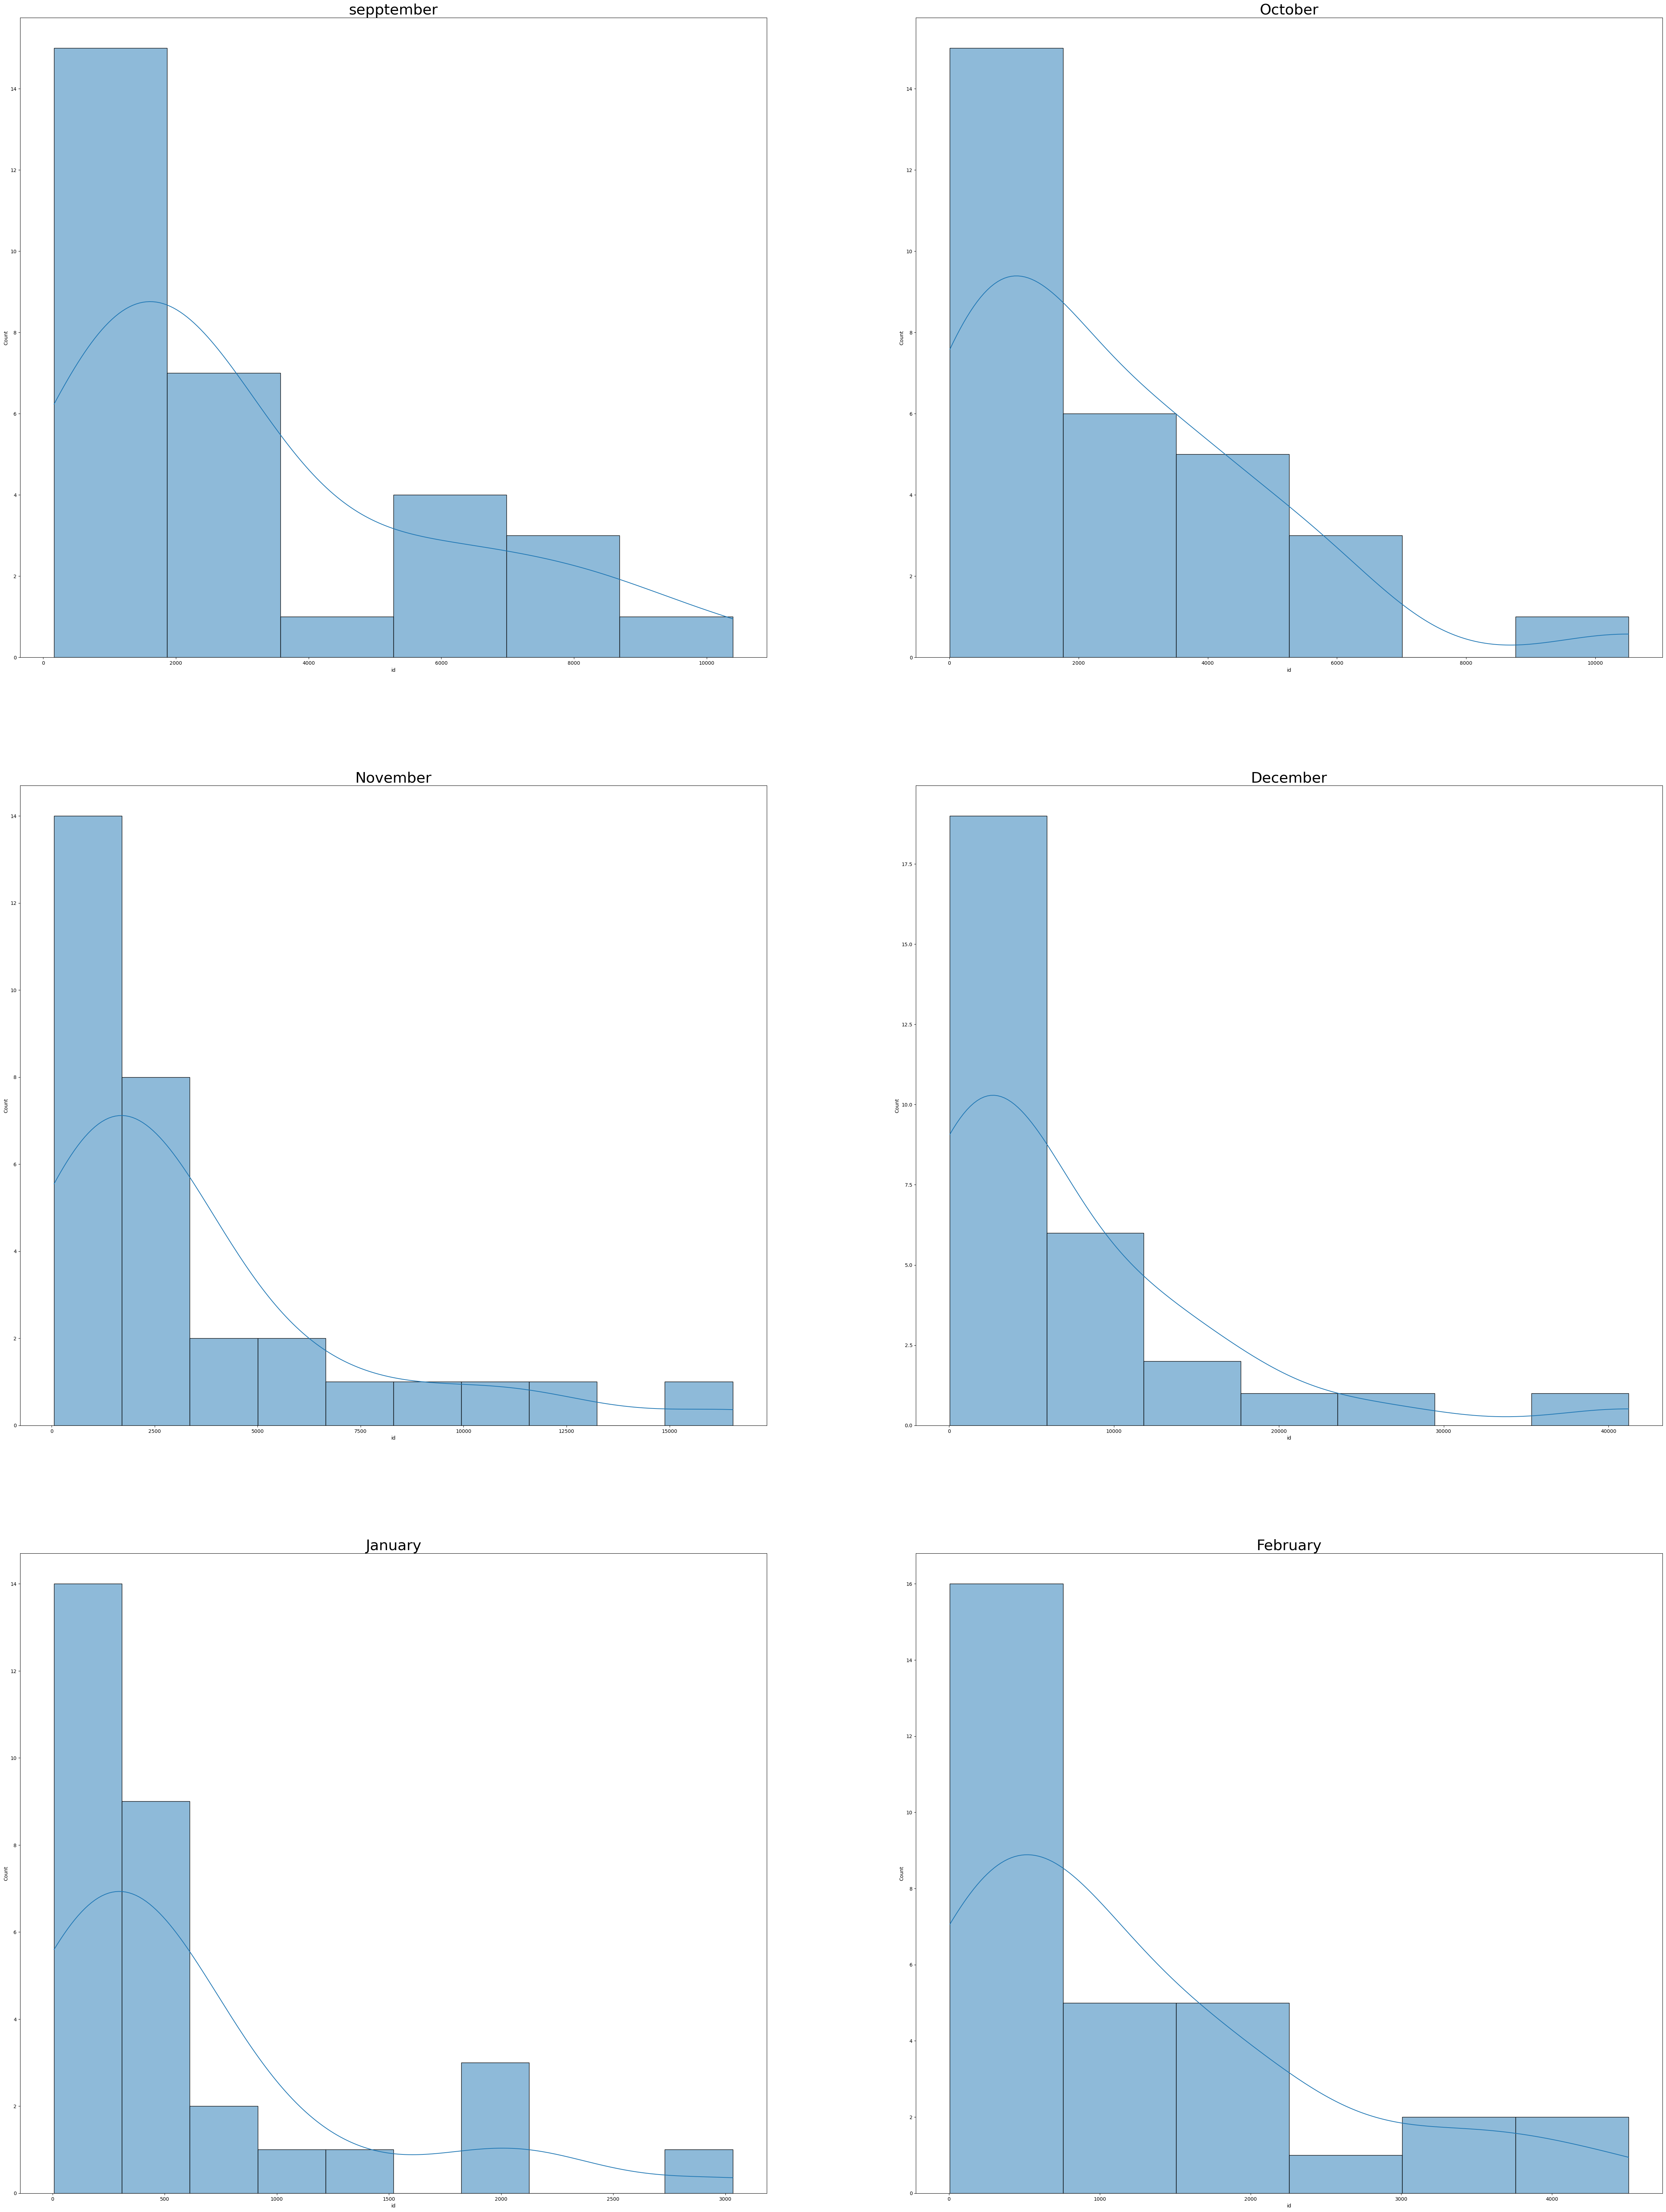

In [35]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dfsep, x='id',bins='auto',kde=True,ax=axes[0]).set_title('sepptember',fontsize = 30)
s=sb.histplot(data=dfoct, x='id',bins='auto',kde=True,ax=axes[1]).set_title('October',fontsize = 30)
s=sb.histplot(data=dfnov, x='id',bins='auto',kde=True,ax=axes[2]).set_title('November',fontsize = 30)
s=sb.histplot(data=dfdec, x='id',bins='auto',kde=True,ax=axes[3]).set_title('December',fontsize = 30)
s=sb.histplot(data=dfjan, x='id',bins='auto',kde=True,ax=axes[4]).set_title('January',fontsize = 30)
s=sb.histplot(data=dffeb, x='id',bins='auto',kde=True,ax=axes[5]).set_title('February',fontsize = 30)




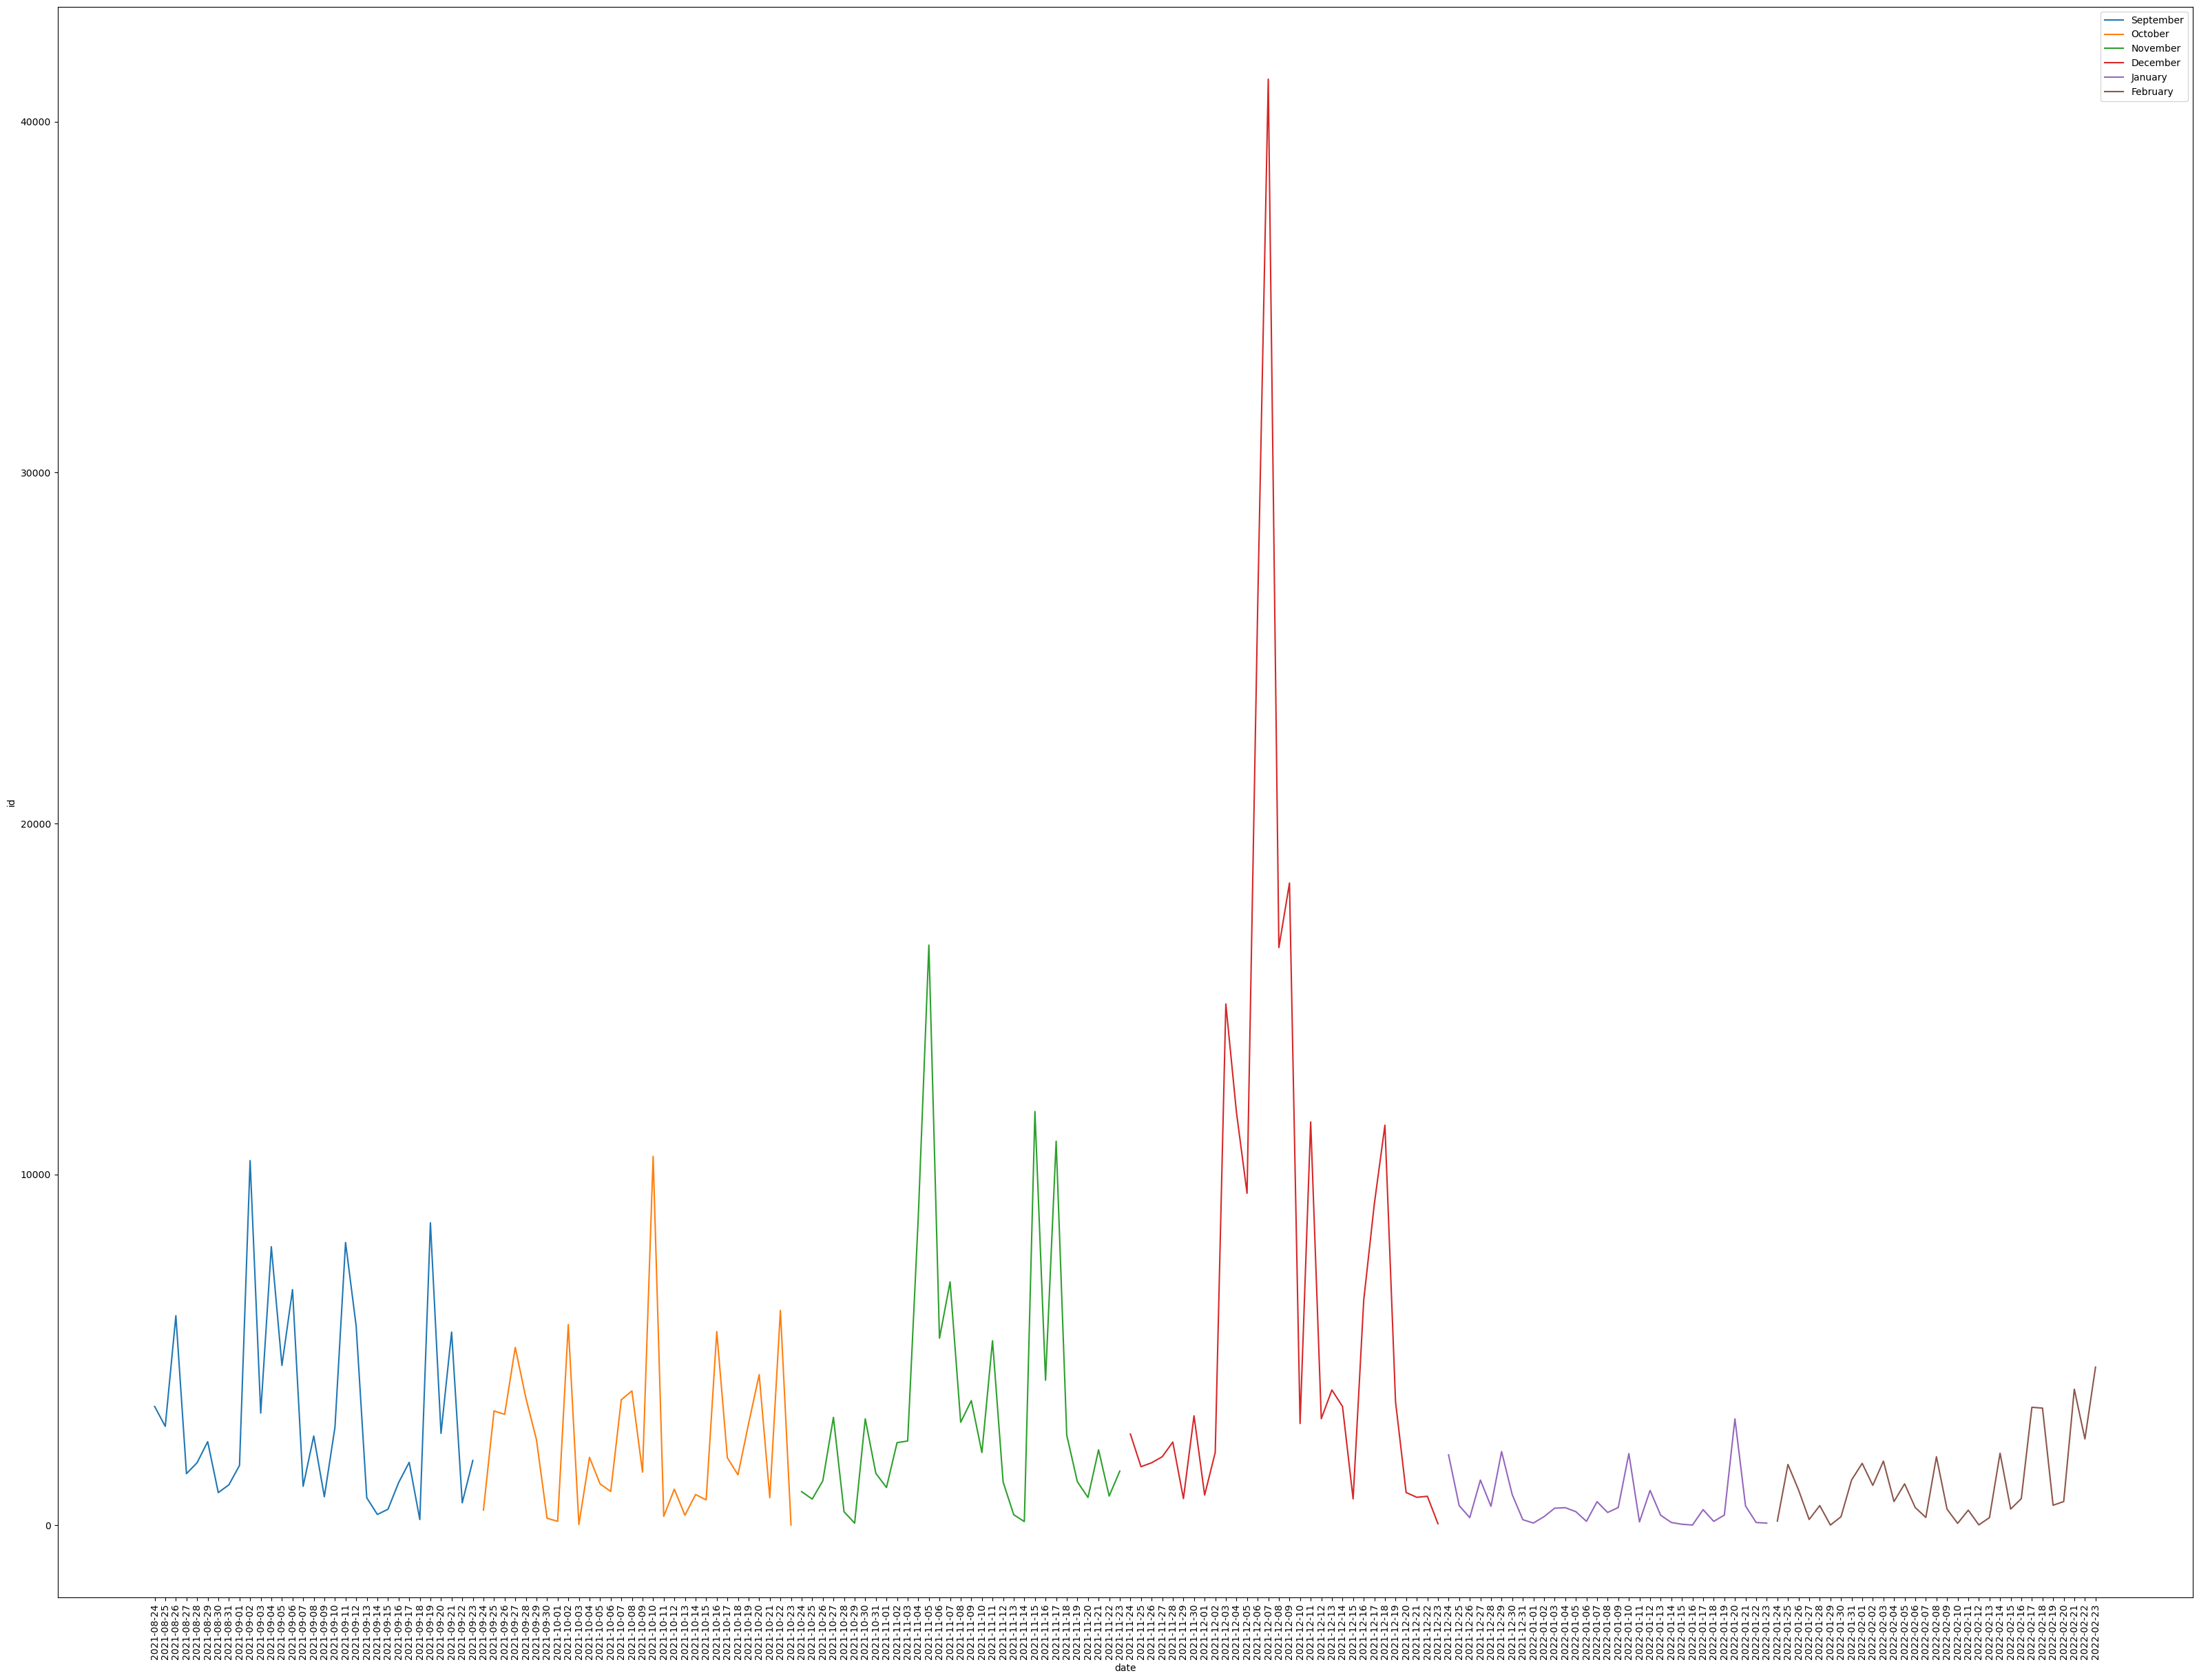

In [36]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(40, 30))
s=sb.lineplot(x='date', y='id', data=dfsep,label='September')
s=sb.lineplot(x='date', y='id', data=dfoct,label='October')
s=sb.lineplot(x='date', y='id', data=dfnov,label='November')
s=sb.lineplot(x='date', y='id', data=dfdec,label='December')
s=sb.lineplot(x='date', y='id', data=dfjan,label='January')
s=sb.lineplot(x='date', y='id', data=dffeb,label='February')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [37]:
#working on number of changesets and number of edits by each user during the 6 months

#df10=zakar1.drop(['deleted','timestamp','uid','version','visibility','tp','extra','date'], axis=1)
df10=zakar1.loc[zakar1['category']=='human']
df11=zakar1.loc[zakar1['category']=='bot']

df10=df10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
df11=df11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)


In [38]:
#counting unique changesets added by each user during 6 months

df12=df10.groupby('uid')['changeset'].nunique()
df13=df11.groupby('uid')['changeset'].nunique()

In [39]:
#number of unique changesets posted by each contributors

changesets = df12.reset_index()
changesets

uid  changeset
0        2175          2
1        4815          4
2       85218          3
3       93451          2
4      125309          1
..        ...        ...
283  14955019          2
284  15000002          2
285  15005739          1
286  15013625          5
287  15146918          1

[288 rows x 2 columns]

In [40]:
#counting the changesets added bu software bots during the period
changesets_bot= df13.reset_index()
changesets_bot

uid  changeset
0     370549          2
1     374661          3
2    1435498          3
3    2309226         16
4    2410942         10
5    3850484         44
6    4688028          5
7    6935690          1
8   10215904         29
9   10857625          7
10  13749532         11

In [41]:
#the uid suggests that the automated scripts were added by the same users as those listed in 'human' category 
#further analysis wont consider categories seperately
changesets_bot['uid'].isin(changesets_bot['uid'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
Name: uid, dtype: bool

In [42]:
#grouping data on user and counting the total contribution made by each user during the whole period
df14=df10.drop(['changeset','category'],axis=1)
id_counts=df14.groupby(['uid']).count()

id_counts=id_counts.reset_index()
id_counts

uid   id
0        2175  436
1        4815  178
2       85218    3
3       93451    9
4      125309    2
..        ...  ...
283  14955019   10
284  15000002    2
285  15005739    1
286  15013625  405
287  15146918    1

[288 rows x 2 columns]

In [43]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 
# inactive mapper: less than 2000 edits 
# casual mapper: 2000 - 6000 edits
# committed mappers : more than 6000 edits [values based on the quartile values of 6 months months]

id_counts['contribution level']=id_counts['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

#id_counts.reset_index() 
id_counts.head()

uid   id contribution level
0    2175  436           inactive
1    4815  178           inactive
2   85218    3           inactive
3   93451    9           inactive
4  125309    2           inactive

In [44]:
#count of contributors in each category

contribution= id_counts.drop('id', axis=1)

contribution=contribution.groupby('contribution level').count()

print(contribution)

                    uid
contribution level     
casual mapper         6
committed            10
inactive            272


In [45]:
id_counts.head()

uid   id contribution level
0    2175  436           inactive
1    4815  178           inactive
2   85218    3           inactive
3   93451    9           inactive
4  125309    2           inactive

In [46]:
#adding contribution level to the dataframe 


temp=id_counts.drop('id',axis=1)
temp=temp.set_index('uid')


In [47]:

zakar1=zakar1.merge(temp['contribution level'], on='uid', how='left')
zakar1

id  changeset deleted                  timestamp       uid  \
0       9258559479  113873191   false  2021-11-16 23:08:22+00:00   3850484   
1       9258805101  113877142   false  2021-11-17 03:08:33+00:00  10857625   
2       9258836760  113877525   false  2021-11-17 03:37:00+00:00  10857625   
3       9260297392  113897068   false  2021-11-17 12:49:50+00:00   2309226   
4       9260519150  113901326   false  2021-11-17 14:39:59+00:00  10215904   
...            ...        ...     ...                        ...       ...   
549680  9344555132  115021473   false  2021-12-16 19:01:24+00:00  10215904   
549681  3860888507  110693612   false  2021-09-03 20:36:48+01:00  13749532   
549682  5713954157  114597634   false  2021-12-05 23:16:10+00:00   3850484   
549683  9057255958  110640065   false  2021-09-02 21:59:50+01:00   3850484   
549684  9057255958  114747435    true  2021-12-09 14:46:49+00:00   1435498   

               user  version visibility    tp        date category  \
0           VARVAR8        1       true  node  2021-11-16    human   
1       muchichka_s        1       true  node  2021-11-17      bot   
2       muchichka_s        1       true  node  2021-11-17    human   
3       M_Solodzhuk        1       true  node  2021-11-17      bot   
4           kagebar        1       true  node  2021-11-17      bot   
...             ...      ...        ...   ...         ...      ...   
549680      kagebar        1       true  node  2021-12-16      bot   
549681   kapitansup        2       true  node  2021-09-03    human   
549682      VARVAR8        3       true  node  2021-12-05      bot   
549683      VARVAR8        1       true  node  2021-09-02      bot   
549684    Rus Ionut        2      false  node  2021-12-09    human   

       contribution level  
0               committed  
1               committed  
2               committed  
3               committed  
4               committed  
...                   ...  
549680          committed  
549681          committed  
549682          committed  
549683          committed  
549684          committed  

[549685 rows x 12 columns]

In [48]:
#counting the number of deleted nodes for each user
df_deleted=zakar1.loc[:,['uid','deleted']]
df_deleted
df_deleted=df_deleted.groupby(['uid','deleted'])['deleted'].count()
df_del=pd.DataFrame(df_deleted)
df_del= df_del.rename(columns={'deleted': 'deleted nodes'})
df_del=df_del.reset_index()
df_del=df_del.loc[df_del['deleted']=='true']


In [49]:
df_del=df_del.set_index('uid')
df_del

deleted  deleted nodes
uid                            
4815        true            175
161619      true             17
177389      true              2
195702      true              4
204049      true            260
...          ...            ...
14643680    true              1
14676348    true              7
14847147    true              1
14955019    true              1
15013625    true              6

[119 rows x 2 columns]

###  *Analysis of version history on contributor level*

In [50]:
#anaysing version history on contributor level
zakar1=zakar1.sort_values(['id', 'version'], ascending=[True,True])
zakar1

id  changeset deleted                  timestamp       uid  \
436726    26035993  116511329   false  2022-01-23 18:53:16+00:00  10553599   
318823    26037180  116511329   false  2022-01-23 18:53:16+00:00  10553599   
547286    26037659  116511329   false  2022-01-23 18:53:16+00:00  10553599   
529856    26862978  111572978   false  2021-09-23 07:02:55+01:00   2471547   
248703    27269341  112895912   false  2021-10-24 09:06:29+01:00  10857625   
...            ...        ...     ...                        ...       ...   
338764  9530909022  117787427   false  2022-02-23 20:59:35+00:00   6896735   
495186  9530909023  117787427   false  2022-02-23 20:59:35+00:00   6896735   
305307  9530909024  117787427   false  2022-02-23 20:59:35+00:00   6896735   
101287  9530909025  117787427   false  2022-02-23 20:59:35+00:00   6896735   
167967  9530909026  117787427   false  2022-02-23 20:59:35+00:00   6896735   

               user  version visibility    tp        date category  \
436726     Filip009       16       true  node  2022-01-23    human   
318823     Filip009       14       true  node  2022-01-23    human   
547286     Filip009       13       true  node  2022-01-23    human   
529856      mike140       10       true  node  2021-09-23    human   
248703  muchichka_s        3       true  node  2021-10-24    human   
...             ...      ...        ...   ...         ...      ...   
338764   Alex5Sheva        1       true  node  2022-02-23    human   
495186   Alex5Sheva        1       true  node  2022-02-23    human   
305307   Alex5Sheva        1       true  node  2022-02-23    human   
101287   Alex5Sheva        1       true  node  2022-02-23    human   
167967   Alex5Sheva        1       true  node  2022-02-23    human   

       contribution level  
436726           inactive  
318823           inactive  
547286           inactive  
529856           inactive  
248703          committed  
...                   ...  
338764          committed  
495186          committed  
305307          committed  
101287          committed  
167967          committed  

[549685 rows x 12 columns]

In [51]:
#Extract the list of editing version for each of the contributors 

version=zakar1.groupby('uid')['version'].apply(list)
version_list=pd.DataFrame(version)
version_list.head()

version
uid                                                      
2175    [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, ...
4815    [3, 4, 2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, ...
85218                                          [10, 3, 4]
93451                         [1, 1, 1, 1, 1, 1, 1, 1, 1]
125309                                             [1, 1]

In [52]:
# This will count the number of new nodes vs number of edits 
#version=1 is considered new node, rest of the versions as edited nodes

# Function to count the frequency of new nodes(version=1) in a list
def count_ones(lst):
    return lst.count(1)

# Function to count the frequency of edited nodes in a list
def edits(lst):
    count=0
    for i in lst:
        if i != 1:
            count=count+1
    return count

# Apply the functions to the 'version' column
version_list['new nodes'] = version_list['version'].apply(count_ones)
version_list['edited nodes'] = version_list['version'].apply(edits)                                                    
version_list.head(16)
        

version  new nodes  \
uid                                                                    
2175    [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, ...        218   
4815    [3, 4, 2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, ...          0   
85218                                          [10, 3, 4]          0   
93451                         [1, 1, 1, 1, 1, 1, 1, 1, 1]          9   
125309                                             [1, 1]          2   
161619  [5, 4, 5, 5, 4, 5, 5, 3, 2, 5, 4, 4, 4, 5, 2, ...         13   
174344                                    [1, 1, 1, 1, 1]          5   
177389                                 [7, 3, 2, 2, 2, 1]          1   
184969                                    [6, 3, 2, 2, 2]          0   
195702  [3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...         21   
204049  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...        384   
208947  [3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, ...        339   
222568  [8, 5, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 8, ...        123   
251543                                                [3]          0   
284094  [2, 3, 2, 4, 5, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, ...        198   
290442                        [2, 2, 2, 2, 1, 1, 1, 1, 1]          5   

        edited nodes  
uid                   
2175             218  
4815             178  
85218              3  
93451              0  
125309             0  
161619            28  
174344             0  
177389             5  
184969             5  
195702             9  
204049           710  
208947            12  
222568           258  
251543             1  
284094           427  
290442             4

###  *Calculating the total active days for each user*

In [53]:
df_lifespan= zakar1.loc[:,['uid','date']]
df_lifespan['date'] = df_lifespan.date.astype('datetime64[ns]')

In [54]:
df_lifespan=df_lifespan.sort_values(['uid','date'],ascending=[True,True])#sorting the database to get the first day of contribution

In [55]:
# grouping on uid and then for each user, retrieving the first and last day of contribution time perdiod
df_lifespan=df_lifespan.groupby('uid')
first_row= df_lifespan.min()
last_row=df_lifespan.max()
#print('first_row')
timeframe1=pd.DataFrame(first_row).reset_index()
timeframe2=pd.DataFrame(last_row).reset_index()

In [56]:
# first day when the conributor made an activty
timeframe1.head(10)

uid       date
0    2175 2021-11-19
1    4815 2022-01-19
2   85218 2022-01-16
3   93451 2021-09-04
4  125309 2021-09-17
5  161619 2021-09-07
6  174344 2022-01-16
7  177389 2021-10-10
8  184969 2021-11-03
9  195702 2021-09-03

In [57]:
timeframe2.head(10) # last day when the conributor made an activty

uid       date
0    2175 2021-11-26
1    4815 2022-01-25
2   85218 2022-01-17
3   93451 2021-09-28
4  125309 2021-09-17
5  161619 2021-12-05
6  174344 2022-01-16
7  177389 2022-02-11
8  184969 2021-11-03
9  195702 2021-09-16

In [58]:
#calculating the difference between two dats

result=(timeframe2['date']-timeframe1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe1['active days']=result+day
timeframe1=timeframe1.drop(['date'],axis=1)
timeframe1.head(6)

uid active days
0    2175      8 days
1    4815      7 days
2   85218      2 days
3   93451     25 days
4  125309      1 days
5  161619     90 days

## *Importing and analysing tag data for the 6 months period*

In [59]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months
query2 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 47.8968940 AND 49.0973238 AND longitude BETWEEN 22.1370590 AND 24.6274681) AND timestamp <TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp >TO_DATE('2021-08-24','yyyy-mm-dd'));"

In [60]:
zakar2 = pd.read_sql(query2, con=engine)

In [61]:
pd.set_option('max_colwidth', None)
zakar2

id  \
0         26037180   
1         26037180   
2         26037180   
3         26037180   
4         26037180   
...            ...   
769366  6449877491   
769367  6449997851   
769368  6449997851   
769369  6452307618   
769370  6452307618   

                                                                                                                                                                                                                                                                                                                                                                                                                                         tags  
0                                        {'ascii_name': 'Ruska', 'city_id': '528714', 'created_by': 'JOSM', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '592', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
1                                                          {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '595', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
2                                 {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
3       {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'name:hu': 'DobÃ³ruszka', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
4       {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'name:hu': 'DobÃ³ruszka', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
...                                                                                                                                                                                                                                                                                                                                                                                                                                       ...  
769366                                                                                                                                                                                                                                                                                                                                                                                                                                     {}  
769367                                                                                                                                                                                                                                                                                                 

In [62]:
#count of empty tags

df15=zakar2[zakar2['tags']=='{}'].count()
df15

id      743763
tags    743763
dtype: int64

In [63]:
#only taking the records having non-null values in tags

df15=zakar2[zakar2['tags']!='{}']

df15

id  \
0         26037180   
1         26037180   
2         26037180   
3         26037180   
4         26037180   
...            ...   
769346  6396632036   
769347  6396632036   
769348  6396632036   
769349  6396632036   
769350  6396632036   

                                                                                                                                                                                                                                                                                                                                                                                                                                         tags  
0                                        {'ascii_name': 'Ruska', 'city_id': '528714', 'created_by': 'JOSM', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '592', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
1                                                          {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '595', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
2                                 {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
3       {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'name:hu': 'DobÃ³ruszka', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
4       {'addr:postcode': '076 77', 'city_id': '528714', 'ele': '101', 'import_ref': 'city_import_sk_1', 'is_in': 'Michalovce,KoÅ¡ickÃ½ kraj,VÃ½chodnÃ© Slovensko,Slovensko', 'loc_name': 'Doboruszka,DobÃ³ruszka', 'name': 'RuskÃ¡', 'name:hu': 'DobÃ³ruszka', 'place': 'village', 'population': '595', 'postal_code': '076 77', 'region_id': '807', 'source:name': 'http://earth-info.nga.mil/gns/html/cntry_files.html,www.statistics.sk'}  
...                                                                                                                                                                                                                                                                                                                                                                                                                                       ...  
769346                                                                                                                                                                                                                                                                                                                                                                                                                 {'leisure': 'firepit'}  
769347                                                                                                                                                                                                                                                                                                 

In [64]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
df16=df15.merge(zakar1, on='id', how='left')
df16

id                           tags  changeset deleted  \
0        26037180  {'ascii_name': 'Ruska', 'c...  116511329   false   
1        26037180  {'addr:postcode': '076 77'...  116511329   false   
2        26037180  {'addr:postcode': '076 77'...  116511329   false   
3        26037180  {'addr:postcode': '076 77'...  116511329   false   
4        26037180  {'addr:postcode': '076 77'...  116511329   false   
...           ...                            ...        ...     ...   
31616  6396632036         {'leisure': 'firepit'}  111420836   false   
31617  6396632036  {'backcountry': 'yes', 'to...  111420836   false   
31618  6396632036  {'backcountry': 'yes', 'na...  111420836   false   
31619  6396632036  {'backcountry': 'yes', 'na...  111420836   false   
31620  6396632036  {'backcountry': 'yes', 'na...  111420836   false   

                       timestamp       uid         user  version visibility  \
0      2022-01-23 18:53:16+00:00  10553599     Filip009       14       true   
1      2022-01-23 18:53:16+00:00  10553599     Filip009       14       true   
2      2022-01-23 18:53:16+00:00  10553599     Filip009       14       true   
3      2022-01-23 18:53:16+00:00  10553599     Filip009       14       true   
4      2022-01-23 18:53:16+00:00  10553599     Filip009       14       true   
...                          ...       ...          ...      ...        ...   
31616  2021-09-19 19:50:40+01:00  10483128  Agronom1983        5       true   
31617  2021-09-19 19:50:40+01:00  10483128  Agronom1983        5       true   
31618  2021-09-19 19:50:40+01:00  10483128  Agronom1983        5       true   
31619  2021-09-19 19:50:40+01:00  10483128  Agronom1983        5       true   
31620  2021-09-19 19:50:40+01:00  10483128  Agronom1983        5       true   

         tp        date category contribution level  
0      node  2022-01-23    human           inactive  
1      node  2022-01-23    human           inactive  
2      node  2022-01-23    human           inactive  
3      node  2022-01-23    human           inactive  
4      node  2022-01-23    human           inactive  
...     ...         ...      ...                ...  
31616  node  2021-09-19    human           inactive  
31617  node  2021-09-19    human           inactive  
31618  node  2021-09-19    human           inactive  
31619  node  2021-09-19    human           inactive  
31620  node  2021-09-19    human           inactive  

[31621 rows x 13 columns]

In [65]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
df16['tags'] = df16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in df16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  # Add the 'id' column
    extracted_row.update(tag_dict)  # Add the rest of the dictionary data
    extracted_data.append(extracted_row)


# Create a new DataFrame from the extracted data
pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
df17 = pd.DataFrame(extracted_data)


In [66]:
id_to_value1 = df16.set_index('id')['uid'].to_dict()
df17['uid'] = df17['id'].map(id_to_value1) #adding uid column to the dataframe
df17.head()

id ascii_name city_id created_by  ele        import_ref  \
0  26037180      Ruska  528714       JOSM  101  city_import_sk_1   
1  26037180        NaN  528714        NaN  101  city_import_sk_1   
2  26037180        NaN  528714        NaN  101  city_import_sk_1   
3  26037180        NaN  528714        NaN  101  city_import_sk_1   
4  26037180        NaN  528714        NaN  101  city_import_sk_1   

                           is_in                loc_name    name    place  \
0  Michalovce,KoÅ¡ickÃ½ kraj,...  Doboruszka,DobÃ³ruszka  RuskÃ¡  village   
1  Michalovce,KoÅ¡ickÃ½ kraj,...  Doboruszka,DobÃ³ruszka  RuskÃ¡  village   
2  Michalovce,KoÅ¡ickÃ½ kraj,...  Doboruszka,DobÃ³ruszka  RuskÃ¡  village   
3  Michalovce,KoÅ¡ickÃ½ kraj,...  Doboruszka,DobÃ³ruszka  RuskÃ¡  village   
4  Michalovce,KoÅ¡ickÃ½ kraj,...  Doboruszka,DobÃ³ruszka  RuskÃ¡  village   

  population region_id                    source:name addr:postcode  \
0        592       807  http://earth-info.nga.mil/...           NaN   
1        595       807  http://earth-info.nga.mil/...        076 77   
2        595       807  http://earth-info.nga.mil/...        076 77   
3        595       807  http://earth-info.nga.mil/...        076 77   
4        595       807  http://earth-info.nga.mil/...        076 77   

  postal_code      name:hu wikidata wikipedia shop opening_hours:signed  \
0         NaN          NaN      NaN       NaN  NaN                  NaN   
1         NaN          NaN      NaN       NaN  NaN                  NaN   
2      076 77          NaN      NaN       NaN  NaN                  NaN   
3      076 77  DobÃ³ruszka      NaN       NaN  NaN                  NaN   
4      076 77  DobÃ³ruszka      NaN       NaN  NaN                  NaN   

  crossing crossing_ref highway bicycle railway crossing:barrier  \
0      NaN          NaN     NaN     NaN     NaN              NaN   
1      NaN          NaN     NaN     NaN     NaN              NaN   
2      NaN          NaN     NaN     NaN     NaN              NaN   
3      NaN          NaN     NaN     NaN     NaN              NaN   
4      NaN          NaN     NaN     NaN     NaN              NaN   

  crossing:bell crossing:light man_made surveillance:type name:uk natural  \
0           NaN            NaN      NaN               NaN     NaN     NaN   
1           NaN            NaN      NaN               NaN     NaN     NaN   
2           NaN            NaN      NaN               NaN     NaN     NaN   
3           NaN            NaN      NaN               NaN     NaN     NaN   
4           NaN            NaN      NaN               NaN     NaN     NaN   

  name:ro name:en fixme contact:facebook contact:instagram contact:phone  \
0     NaN     NaN   NaN              NaN               NaN           NaN   
1     NaN     NaN   NaN              NaN               NaN           NaN   
2     NaN     NaN   NaN              NaN               NaN           NaN   
3     NaN     NaN   NaN              NaN               NaN           NaN   
4     NaN     NaN   NaN              NaN               NaN           NaN   

  contact:website opening_hours operator phone:UA bench  bus name:ru  \
0             NaN           NaN      NaN      NaN   NaN  NaN     NaN   
1             NaN           NaN      NaN      NaN   NaN  NaN     NaN   
2             NaN           NaN      NaN      NaN   NaN  NaN     NaN   
3             NaN           NaN      NaN      NaN   NaN  NaN     NaN   
4             NaN           NaN      NaN      NaN   NaN  NaN     NaN   

  public_transport  ref shelter addr:housenumber addr:street office website  \
0              NaN  NaN     NaN              NaN         NaN    NaN     NaN   
1              NaN  NaN     NaN              NaN         NaN    NaN     NaN   
2              NaN  NaN     NaN              NaN         NaN    NaN     NaN   
3              NaN  NaN     NaN              NaN         NaN    NaN     NaN   
4              NaN  NaN     NaN              NaN         NaN    NaN     NaN   

  government tourism a

In [67]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31621 entries, 0 to 31620
Columns: 510 entries, id to uid
dtypes: int64(2), object(508)
memory usage: 123.0+ MB


In [68]:
#counting total counts of each tags

non_null_counts = df17.count()
counts=pd.DataFrame(non_null_counts)
counts= counts.reset_index()
counts.columns = ["tags", "total counts"]
counts=counts.sort_values(['total counts'], ascending=False)
counts.head(7)

tags  total counts
0         id         31621
509      uid         31621
8       name         20265
30   name:uk         12651
44   name:ru         12192
33   name:en         11819
9      place         10919

In [69]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

df18= counts.loc[counts['total counts']>5000]
df18

tags  total counts
0               id         31621
509            uid         31621
8             name         20265
30         name:uk         12651
44         name:ru         12192
33         name:en         11819
9            place         10919
17       wikipedia          8437
126         koatuu          7716
10      population          7452
87     name:prefix          6816
13   addr:postcode          5825
54         amenity          5627
15         name:hu          5413
127   wikipedia:ru          5206

<Axes: xlabel='total counts', ylabel='Count'>

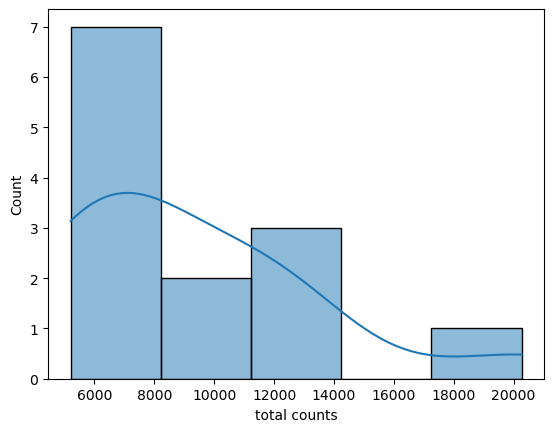

In [70]:
#frequency distribution of tag counts

df_plot=df18.loc[(df18['tags']!='id') & (df18['tags']!='uid'),:]
sb.histplot(data=df_plot, x='total counts',bins='auto',kde=True)

In [71]:
#list of tags for further analysis

column_keep=df18["tags"].tolist()
column_keep


['id',
 'uid',
 'name',
 'name:uk',
 'name:ru',
 'name:en',
 'place',
 'wikipedia',
 'koatuu',
 'population',
 'name:prefix',
 'addr:postcode',
 'amenity',
 'name:hu',
 'wikipedia:ru']

In [72]:
df19=df17.loc[:,column_keep]
df19.head()

id       uid    name name:uk name:ru name:en    place wikipedia  \
0  26037180  10553599  RuskÃ¡     NaN     NaN     NaN  village       NaN   
1  26037180  10553599  RuskÃ¡     NaN     NaN     NaN  village       NaN   
2  26037180  10553599  RuskÃ¡     NaN     NaN     NaN  village       NaN   
3  26037180  10553599  RuskÃ¡     NaN     NaN     NaN  village       NaN   
4  26037180  10553599  RuskÃ¡     NaN     NaN     NaN  village       NaN   

  koatuu population name:prefix addr:postcode amenity      name:hu  \
0    NaN        592         NaN           NaN     NaN          NaN   
1    NaN        595         NaN        076 77     NaN          NaN   
2    NaN        595         NaN        076 77     NaN          NaN   
3    NaN        595         NaN        076 77     NaN  DobÃ³ruszka   
4    NaN        595         NaN        076 77     NaN  DobÃ³ruszka   

  wikipedia:ru  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [73]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

result_dict1 = {}
for column_name in df19.columns:
    if column_name not in remove:
        unique_value_counts = df19[column_name].value_counts()
        result_dict1[column_name] = unique_value_counts

sorted(result_dict1.items())

[('addr:postcode',
  78593            101
  88000             90
  78436             67
  90500             53
  90223             49
                  ... 
  82602              1
  77200â€”77204      1
  90202              1
  89200 - 89202      1
  78400              1
  Name: addr:postcode, Length: 592, dtype: int64),
 ('amenity',
  post_office          3009
  atm                   722
  bank                  406
  shelter               150
  pharmacy              123
                       ... 
  food_court              1
  bbq                     1
  social_facility         1
  conference_centre       1
  college                 1
  Name: amenity, Length: 62, dtype: int64),
 ('koatuu',
  2122482103    42
  2123610100    32
  2122487204    30
  2124880901    30
  2122786301    28
                ..
  2624883604     5
  2125386001     5
  2120484801     5
  2121285002     5
  2124481202     2
  Name: koatuu, Length: 905, dtype: int64),
 ('name',
  Нова Пошта №1                    11

In [74]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict2[column_name] = unique_values

In [75]:
#storing dictionary into table 
uniquetags=pd.DataFrame.from_dict(result_dict2)
uniquetags=uniquetags.drop(['id'],axis=1)
uniquetags.head()

name name:uk name:ru                name:en  \
uid                                                                          
85218          [Тис ягідний, Синяк]   [nan]   [nan]  [nan, Sunyak, Syniak]   
93451   [nan, rovás településtábla]   [nan]   [nan]                  [nan]   
125309                        [nan]   [nan]   [nan]                  [nan]   
161619                        [nan]   [nan]   [nan]                  [nan]   
184969                        [nan]   [nan]   [nan]                  [nan]   

        place                      wikipedia koatuu population name:prefix  \
uid                                                                          
85218   [nan]  [uk:https://uk.wikipedia.o...  [nan]      [nan]       [nan]   
93451   [nan]                          [nan]  [nan]      [nan]       [nan]   
125309  [nan]                          [nan]  [nan]      [nan]       [nan]   
161619  [nan]                          [nan]  [nan]      [nan]       [nan]   
184969  [nan]                          [nan]  [nan]      [nan]       [nan]   

       addr:postcode amenity name:hu wikipedia:ru  
uid                                                
85218          [nan]   [nan]   [nan]        [nan]  
93451          [nan]   [nan]   [nan]        [nan]  
125309         [nan]   [nan]   [nan]        [nan]  
161619         [nan]   [nan]   [nan]        [nan]  
184969         [nan]   [nan]   [nan]        [nan]

In [76]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
result_dict = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the result_dict with the column_name as the key
        result_dict[column_name] = total_unique_count

In [77]:
result_dict

{'id': 10171,
 'name': 3177,
 'name:uk': 1385,
 'name:ru': 1144,
 'name:en': 1272,
 'place': 13,
 'wikipedia': 1300,
 'koatuu': 906,
 'population': 825,
 'name:prefix': 21,
 'addr:postcode': 593,
 'amenity': 63,
 'name:hu': 705,
 'wikipedia:ru': 885}

In [78]:
# countinng the frequency of each tags added by each of the contributors 
#this will be further used to create contributor-base
grouped = df19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
result_dict3 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in df19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].nunique()
        
        # Store the unique values in the result_dict with the column_name as the key
        result_dict3[column_name] = unique_values

In [79]:
#converting the resulting dictionary into dataframe

contributor_base=pd.DataFrame.from_dict(result_dict3)
contributor_base.reset_index()
contributor_base=contributor_base.drop(['id'],axis=1)
contributor_base

name  name:uk  name:ru  name:en  place  wikipedia  koatuu  \
uid                                                                   
85218        2        0        0        2      0          3       0   
93451        1        0        0        0      0          0       0   
125309       0        0        0        0      0          0       0   
161619       0        0        0        0      0          0       0   
184969       0        0        0        0      0          0       0   
...        ...      ...      ...      ...    ...        ...     ...   
14955019     1        0        0        0      0          0       0   
15000002     2        0        0        0      0          0       0   
15005739     2        0        0        0      0          0       0   
15013625     8        0        0        0      0          0       0   
15146918     0        0        0        0      0          0       0   

          population  name:prefix  addr:postcode  amenity  name:hu  \
uid                                                                  
85218              0            0              0        0        0   
93451              0            0              0        0        0   
125309             0            0              0        0        0   
161619             0            0              0        0        0   
184969             0            0              0        0        0   
...              ...          ...            ...      ...      ...   
14955019           0            0              0        1        0   
15000002           0            0              1        0        0   
15005739           0            0              1        0        0   
15013625           0            0              0        7        0   
15146918           0            0              0        0        0   

          wikipedia:ru  
uid                     
85218                0  
93451                0  
125309               0  
161619               0  
184969               0  
...                ...  
14955019             0  
15000002             0  
15005739             0  
15013625             0  
15146918             0  

[180 rows x 13 columns]

In [80]:
#creating user profile based on previously derived features of all contributors

contributor_base=timeframe1.merge(contributor_base, how='left',on='uid')

In [81]:
contributor_base=changesets.merge(contributor_base, how='left',on='uid')


In [82]:
contributor_base=version_list.merge(contributor_base, how='left',on='uid')
contributor_base['version'] = contributor_base['version'].str[:6]

In [83]:
contributor_base=contributor_base.merge(df_del.loc[:,'deleted nodes'], how='left',on='uid')

In [84]:
contributor_base=id_counts.merge(contributor_base, how='left',on='uid')

In [85]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base.head(5)

uid   id contribution level             version  new nodes  \
0    2175  436           inactive  [1, 2, 1, 2, 1, 2]        218   
1    4815  178           inactive  [3, 4, 2, 2, 3, 2]          0   
2   85218    3           inactive          [10, 3, 4]          0   
3   93451    9           inactive  [1, 1, 1, 1, 1, 1]          9   
4  125309    2           inactive              [1, 1]          2   

   edited nodes  changeset active days  name  name:uk  name:ru  name:en  \
0           218          2      8 days   NaN      NaN      NaN      NaN   
1           178          4      7 days   NaN      NaN      NaN      NaN   
2             3          3      2 days   2.0      0.0      0.0      2.0   
3             0          2     25 days   1.0      0.0      0.0      0.0   
4             0          1      1 days   0.0      0.0      0.0      0.0   

   place  wikipedia  koatuu  population  name:prefix  addr:postcode  amenity  \
0    NaN        NaN     NaN         NaN          NaN            NaN      NaN   
1    NaN        NaN     NaN         NaN          NaN            NaN      NaN   
2    0.0        3.0     0.0         0.0          0.0            0.0      0.0   
3    0.0        0.0     0.0         0.0          0.0            0.0      0.0   
4    0.0        0.0     0.0         0.0          0.0            0.0      0.0   

   name:hu  wikipedia:ru  deleted nodes  
0      NaN           NaN            NaN  
1      NaN           NaN          175.0  
2      0.0           0.0            NaN  
3      0.0           0.0            NaN  
4      0.0           0.0            NaN

In [86]:
contributor_base

uid   id contribution level             version  new nodes  \
0        2175  436           inactive  [1, 2, 1, 2, 1, 2]        218   
1        4815  178           inactive  [3, 4, 2, 2, 3, 2]          0   
2       85218    3           inactive          [10, 3, 4]          0   
3       93451    9           inactive  [1, 1, 1, 1, 1, 1]          9   
4      125309    2           inactive              [1, 1]          2   
..        ...  ...                ...                 ...        ...   
283  14955019   10           inactive  [1, 1, 1, 1, 2, 1]          9   
284  15000002    2           inactive              [1, 1]          2   
285  15005739    1           inactive                 [1]          1   
286  15013625  405           inactive  [3, 4, 2, 2, 2, 2]        226   
287  15146918    1           inactive                 [2]          0   

     edited nodes  changeset active days  name  name:uk  name:ru  name:en  \
0             218          2      8 days   NaN      NaN      NaN      NaN   
1             178          4      7 days   NaN      NaN      NaN      NaN   
2               3          3      2 days   2.0      0.0      0.0      2.0   
3               0          2     25 days   1.0      0.0      0.0      0.0   
4               0          1      1 days   0.0      0.0      0.0      0.0   
..            ...        ...         ...   ...      ...      ...      ...   
283             1          2      1 days   1.0      0.0      0.0      0.0   
284             0          2      7 days   2.0      0.0      0.0      0.0   
285             0          1      1 days   2.0      0.0      0.0      0.0   
286           179          5      1 days   8.0      0.0      0.0      0.0   
287             1          1      1 days   0.0      0.0      0.0      0.0   

     place  wikipedia  koatuu  population  name:prefix  addr:postcode  \
0      NaN        NaN     NaN         NaN          NaN            NaN   
1      NaN        NaN     NaN         NaN          NaN            NaN   
2      0.0        3.0     0.0         0.0          0.0            0.0   
3      0.0        0.0     0.0         0.0          0.0            0.0   
4      0.0        0.0     0.0         0.0          0.0            0.0   
..     ...        ...     ...         ...          ...            ...   
283    0.0        0.0     0.0         0.0          0.0            0.0   
284    0.0        0.0     0.0         0.0          0.0            1.0   
285    0.0        0.0     0.0         0.0          0.0            1.0   
286    0.0        0.0     0.0         0.0          0.0            0.0   
287    0.0        0.0     0.0         0.0          0.0            0.0   

     amenity  name:hu  wikipedia:ru  deleted nodes  
0        NaN      NaN           NaN            NaN  
1        NaN      NaN           NaN          175.0  
2        0.0      0.0           0.0            NaN  
3        0.0      0.0           0.0            NaN  
4        0.0      0.0           0.0            NaN  
..       ...      ...           ...            ...  
283      1.0      0.0           0.0            1.0  
284      0.0      0.0           0.0            NaN  
285      0.0      0.0           0.0            NaN  
286      7.0      0.0           0.0            6.0  
287      0.0      0.0           0.0            NaN  

[288 rows x 22 columns]

In [87]:
uid_list=contributor_base['uid'].to_list()
print(len(uid_list)) #total contributors active before the event

288


## *Analysing location data for the 6 months period*

In [88]:
#fetching locations to analyse spatial data
zakar3=zakar_1.drop(['deleted','version','visibility','tp','extra'],axis=1)
zakar3

id  changeset                  timestamp       uid  \
0       9258559479  113873191  2021-11-16 23:08:22+00:00   3850484   
1       9258805101  113877142  2021-11-17 03:08:33+00:00  10857625   
2       9258836760  113877525  2021-11-17 03:37:00+00:00  10857625   
3       9260297392  113897068  2021-11-17 12:49:50+00:00   2309226   
4       9260519150  113901326  2021-11-17 14:39:59+00:00  10215904   
...            ...        ...                        ...       ...   
549680  9344555132  115021473  2021-12-16 19:01:24+00:00  10215904   
549681  3860888507  110693612  2021-09-03 20:36:48+01:00  13749532   
549682  5713954157  114597634  2021-12-05 23:16:10+00:00   3850484   
549683  9057255958  110640065  2021-09-02 21:59:50+01:00   3850484   
549684  9057255958  114747435  2021-12-09 14:46:49+00:00   1435498   

               user   latitude  longitude        date  
0           VARVAR8  48.094359  24.404803  2021-11-16  
1       muchichka_s  48.315407  24.355062  2021-11-17  
2       muchichka_s  48.297057  24.383481  2021-11-17  
3       M_Solodzhuk  49.014364  22.779738  2021-11-17  
4           kagebar  48.519944  23.111179  2021-11-17  
...             ...        ...        ...         ...  
549680      kagebar  48.533203  22.660054  2021-12-16  
549681   kapitansup  48.820883  22.492380  2021-09-03  
549682      VARVAR8  48.567337  24.292110  2021-12-05  
549683      VARVAR8  48.821310  24.097371  2021-09-02  
549684    Rus Ionut  48.821310  24.097371  2021-12-09  

[549685 rows x 8 columns]

In [89]:
# grouing by uid and calculating mean value of latitudes
df20=zakar3.groupby(['uid'])['latitude'].mean()
df20=df20.reset_index()
df20

uid   latitude
0        2175  48.797852
1        4815  48.960849
2       85218  48.090430
3       93451  48.185959
4      125309  48.489986
..        ...        ...
283  14955019  48.353987
284  15000002  48.092834
285  15005739  48.451791
286  15013625  48.975480
287  15146918  47.957588

[288 rows x 2 columns]

In [90]:
# grouing by uid and calculating mean value of longitude

df21=zakar3.groupby(['uid'])['longitude'].mean()
df21=df21.reset_index()
df20

uid   latitude
0        2175  48.797852
1        4815  48.960849
2       85218  48.090430
3       93451  48.185959
4      125309  48.489986
..        ...        ...
283  14955019  48.353987
284  15000002  48.092834
285  15005739  48.451791
286  15013625  48.975480
287  15146918  47.957588

[288 rows x 2 columns]

In [91]:
mean_loc=df20.merge(df21, on='uid')

In [92]:
#dataframe ontaining mean value of latitudes and longitudes mapped by individual contributors

mean_loc

uid   latitude  longitude
0        2175  48.797852  22.366994
1        4815  48.960849  22.288900
2       85218  48.090430  24.231961
3       93451  48.185959  22.625996
4      125309  48.489986  23.483651
..        ...        ...        ...
283  14955019  48.353987  24.419267
284  15000002  48.092834  23.434806
285  15005739  48.451791  22.712161
286  15013625  48.975480  23.970560
287  15146918  47.957588  22.312727

[288 rows x 3 columns]

In [93]:
#Finding the locations of the first node contributed by each user

df22=zakar3.sort_values(['uid', 'date'], ascending=[True,True])
df22

id  changeset                  timestamp       uid  \
2636    9267996640  114005852  2021-11-19 19:44:16+00:00      2175   
5436    9267996843  114005852  2021-11-19 19:44:17+00:00      2175   
13692   9267985676  114005852  2021-11-19 19:44:17+00:00      2175   
14221   9267996834  114005852  2021-11-19 19:44:17+00:00      2175   
14799   9267996647  114005852  2021-11-19 19:44:16+00:00      2175   
...            ...        ...                        ...       ...   
546359  2964663371  117000879  2022-02-04 10:55:39+00:00  15013625   
546609  9474036800  117000879  2022-02-04 10:55:39+00:00  15013625   
547404  3813124161  117001845  2022-02-04 11:14:34+00:00  15013625   
548063  9473980022  116999813  2022-02-04 10:30:59+00:00  15013625   
172338  1750848322  117774445  2022-02-23 14:54:50+00:00  15146918   

              user   latitude  longitude        date  
2636        laznik  48.797692  22.365611  2021-11-19  
5436        laznik  48.796011  22.370293  2021-11-19  
13692       laznik  48.793320  22.365317  2021-11-19  
14221       laznik  48.795779  22.371916  2021-11-19  
14799       laznik  48.799267  22.364614  2021-11-19  
...            ...        ...        ...         ...  
546359  MikiMotion  48.973765  23.968786  2022-02-04  
546609  MikiMotion  48.972715  23.969310  2022-02-04  
547404  MikiMotion  48.974944  23.967426  2022-02-04  
548063  MikiMotion  48.977362  23.976295  2022-02-04  
172338     Zsófi29  47.957588  22.312727  2022-02-23  

[549685 rows x 8 columns]

In [94]:
df23=df22.groupby('uid')

first_row= df23.first()
first_record=pd.DataFrame(first_row).reset_index()

In [95]:
first_record

uid          id  changeset                  timestamp  \
0        2175  9267996640  114005852  2021-11-19 19:44:16+00:00   
1        4815  1136432193  116342723  2022-01-19 13:22:46+00:00   
2       85218  3706621200  116208769  2022-01-16 10:43:17+00:00   
3       93451  9062373254  110719203  2021-09-04 15:34:25+01:00   
4      125309  9101653088  111345121  2021-09-17 17:21:26+01:00   
..        ...         ...        ...                        ...   
283  14955019  9453126421  116670099  2022-01-27 14:47:20+00:00   
284  15000002  9468921713  116919779  2022-02-02 15:51:03+00:00   
285  15005739  9471082065  116956180  2022-02-03 10:17:55+00:00   
286  15013625  6831562166  117001845  2022-02-04 11:14:34+00:00   
287  15146918  1750848322  117774445  2022-02-23 14:54:50+00:00   

              user   latitude  longitude        date  
0           laznik  48.797692  22.365611  2021-11-19  
1         *Martin*  49.027851  22.151902  2022-01-19  
2     Aleks-Berlin  47.941446  24.119235  2022-01-16  
3         grozsa11  48.185326  22.609389  2021-09-04  
4          docyeti  48.489965  23.483725  2021-09-17  
..             ...        ...        ...         ...  
283  Войцеховський  48.354180  24.419892  2022-01-27  
284    skarbniza02  48.010749  23.576352  2022-02-02  
285       lightseo  48.451791  22.712161  2022-02-03  
286     MikiMotion  48.974607  23.966041  2022-02-04  
287        Zsófi29  47.957588  22.312727  2022-02-23  

[288 rows x 8 columns]

In [96]:
#finding the median value of the latitude and longitude contributed by each user


df25=zakar3.groupby(['uid'])['latitude'].median()
df26=zakar3.groupby(['uid'])['longitude'].median()

In [97]:
df25=df25.reset_index()
df26=df26.reset_index()
median_loc=df25.merge(df26, on='uid')

In [98]:
median_loc

uid   latitude  longitude
0        2175  48.797005  22.367988
1        4815  48.971360  22.321563
2       85218  47.941446  24.119235
3       93451  48.185004  22.611837
4      125309  48.489986  23.483651
..        ...        ...        ...
283  14955019  48.354109  24.419388
284  15000002  48.092834  23.434806
285  15005739  48.451791  22.712161
286  15013625  48.975360  23.968944
287  15146918  47.957588  22.312727

[288 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LinearSegmentedColormap

In [100]:
#plotting the location of first node created by each user using geopandas
crs={'init':'epsg:4326'}
geometry1=[Point(xy) for xy in zip(first_record["longitude"], first_record["latitude"])]

In [101]:
geodata1=gpd.GeoDataFrame(first_record,crs=crs, geometry=geometry1)

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

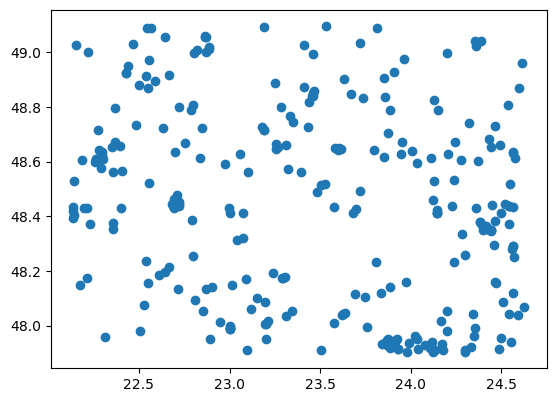

In [102]:
geodata1.plot()

In [103]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry2=[Point(xy) for xy in zip(median_loc["longitude"], median_loc["latitude"])]

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

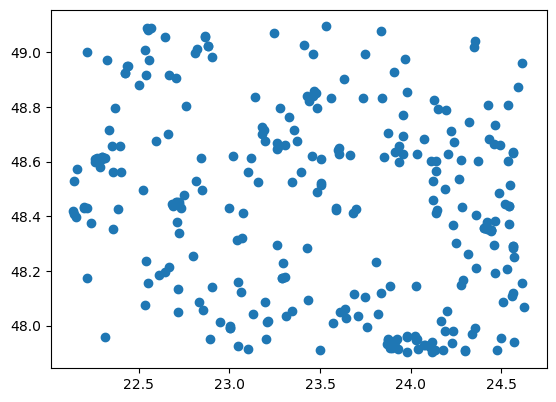

In [104]:
geodata2=gpd.GeoDataFrame(median_loc,crs=crs, geometry=geometry2)
geodata2.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

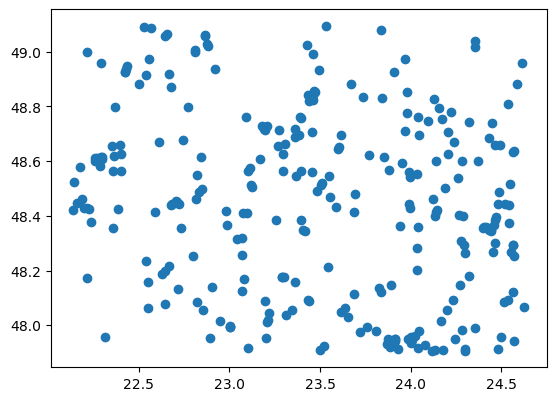

In [105]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry3=[Point(xy) for xy in zip(mean_loc["longitude"], mean_loc["latitude"])]
geodata3=gpd.GeoDataFrame(mean_loc,crs=crs, geometry=geometry3)
geodata3.plot()

In [106]:
#importing shapefile of Ukraine

shapefile = gpd.read_file("C:/Users/Shruti/CST4090/ukr_admbnda_sspe_20230201_shp/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

Text(0.5, 0.98, 'zakar mapping pattern')

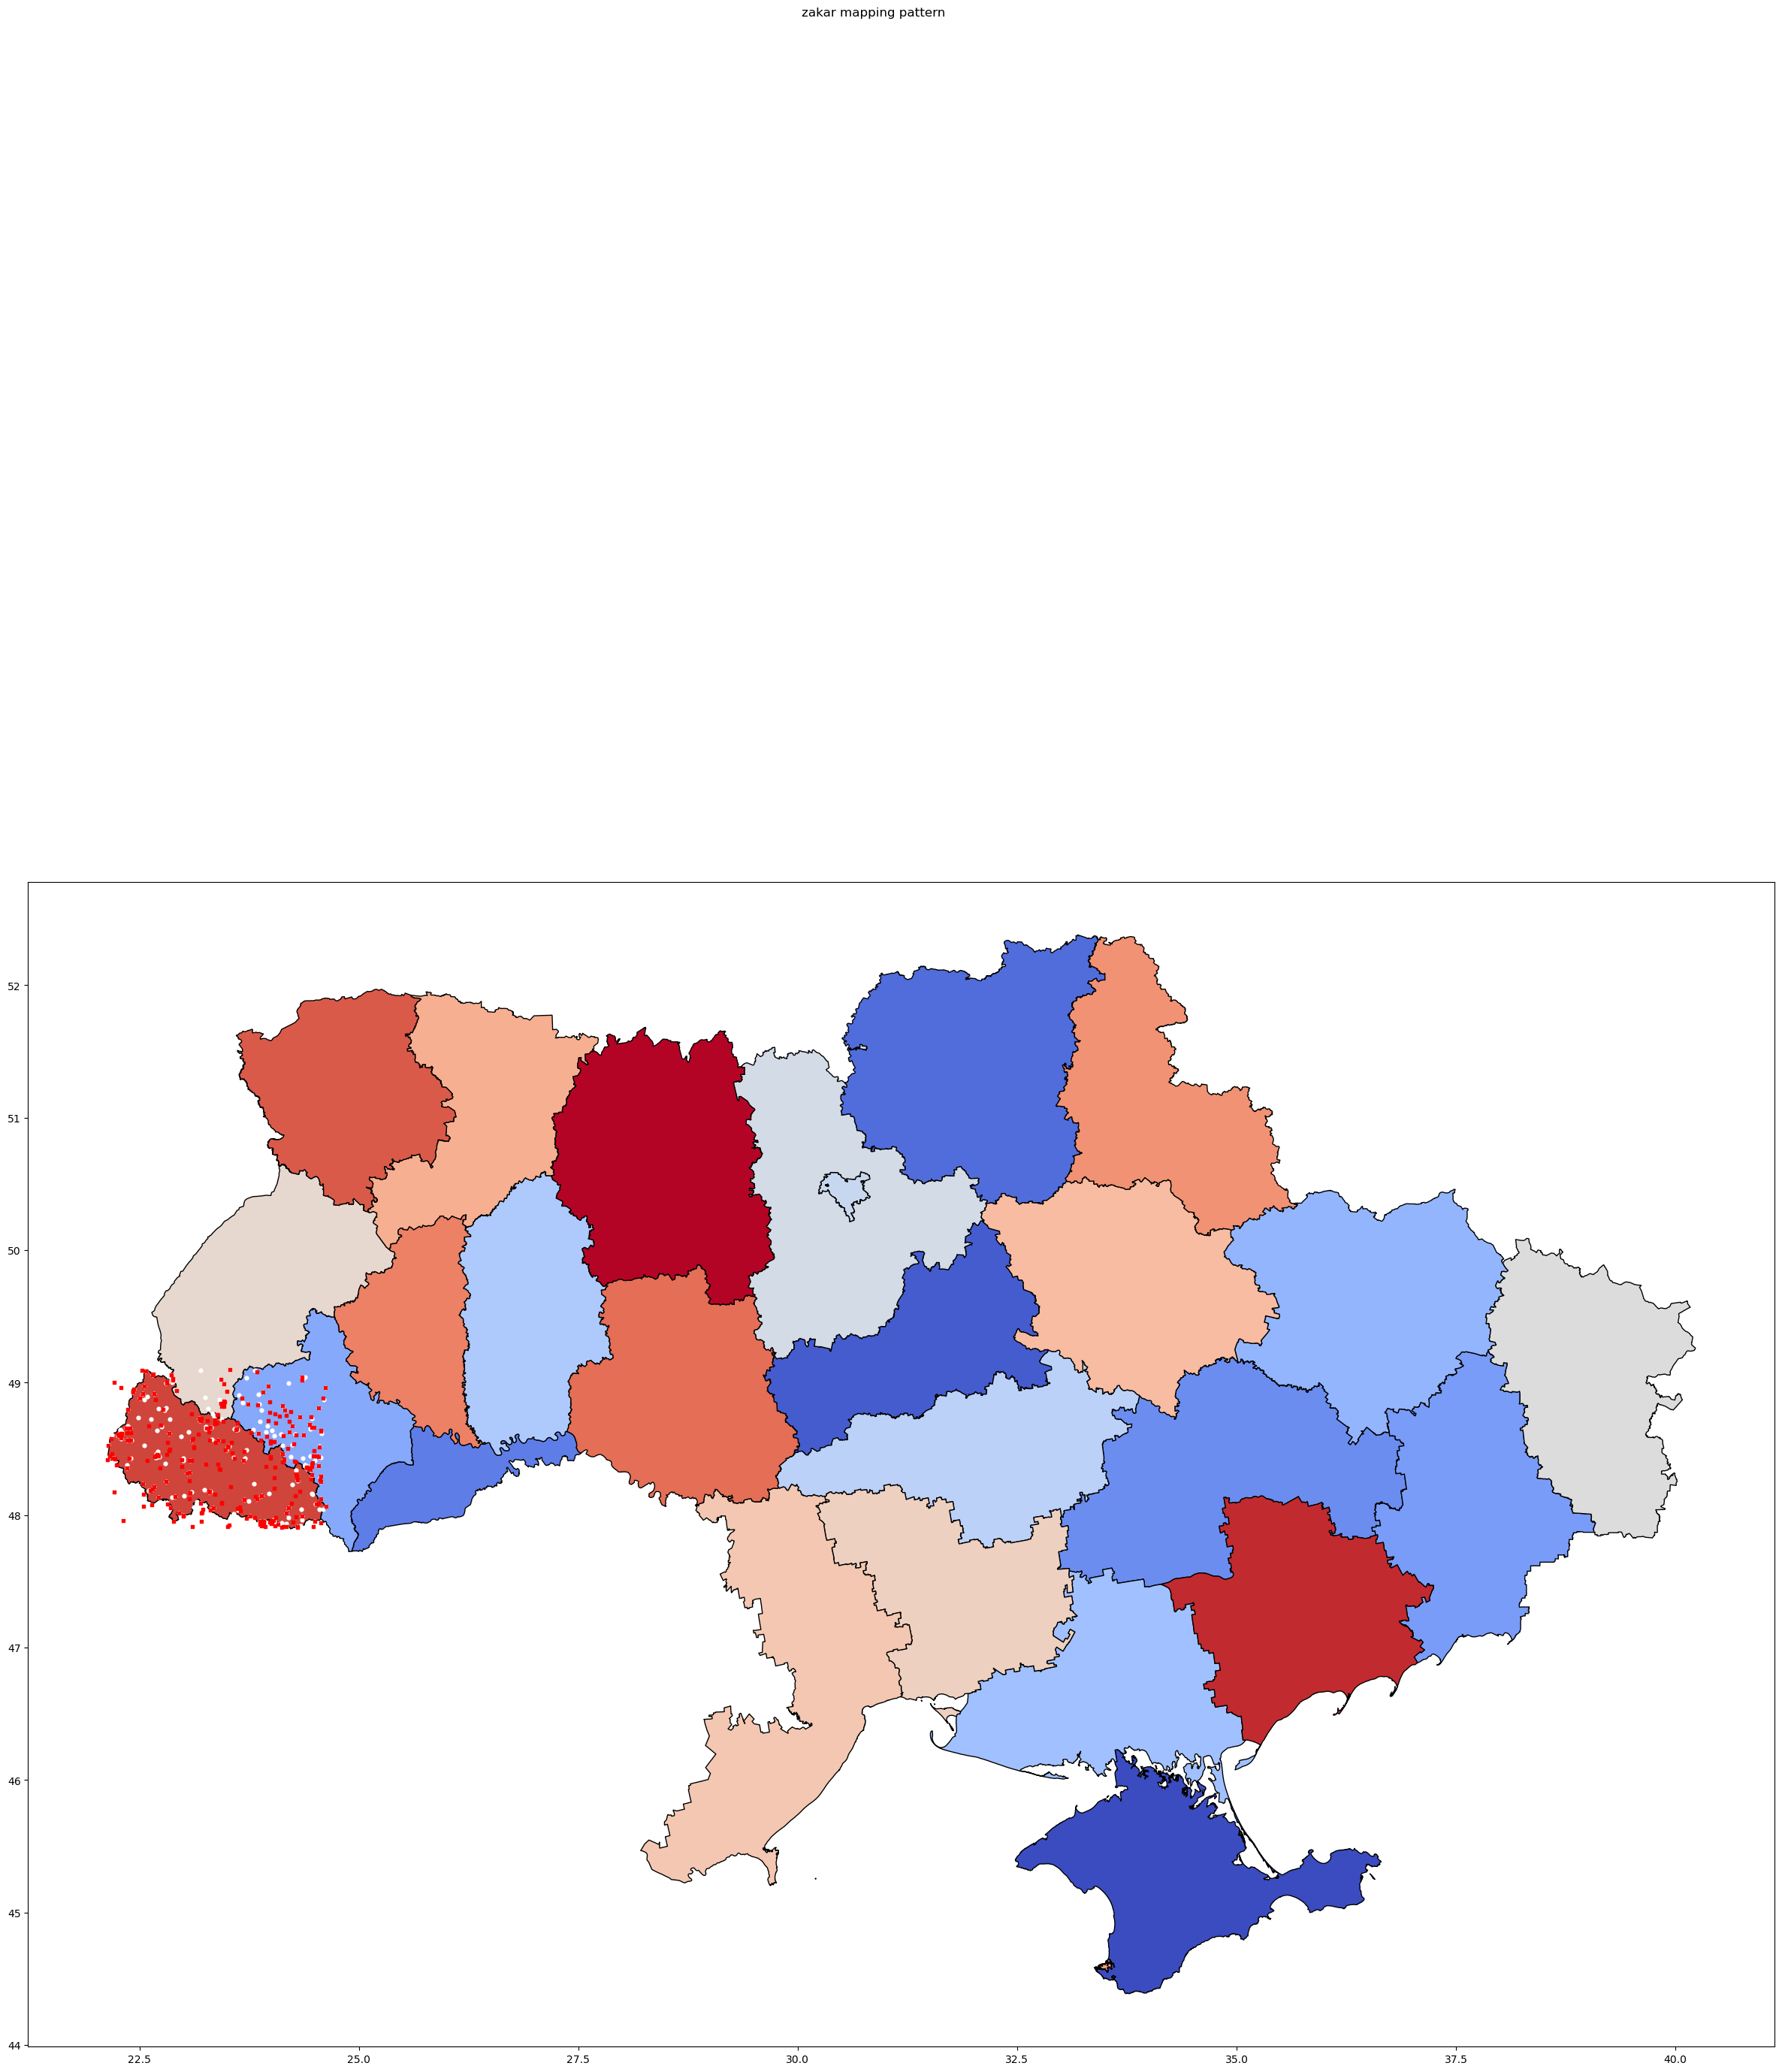

In [107]:
#creating plot with Ukraine's map  with locations of first node and mean point 


fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata1.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata3.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('zakar mapping pattern', fontsize=12)


### *Analysing dispersion of mapping using Statistical measure*

In [108]:
import statistics as st
df27=zakar3.loc[:,['uid','latitude','longitude']]
df27.head()

uid   latitude  longitude
0   3850484  48.094359  24.404803
1  10857625  48.315407  24.355062
2  10857625  48.297057  24.383481
3   2309226  49.014364  22.779738
4  10215904  48.519944  23.111179

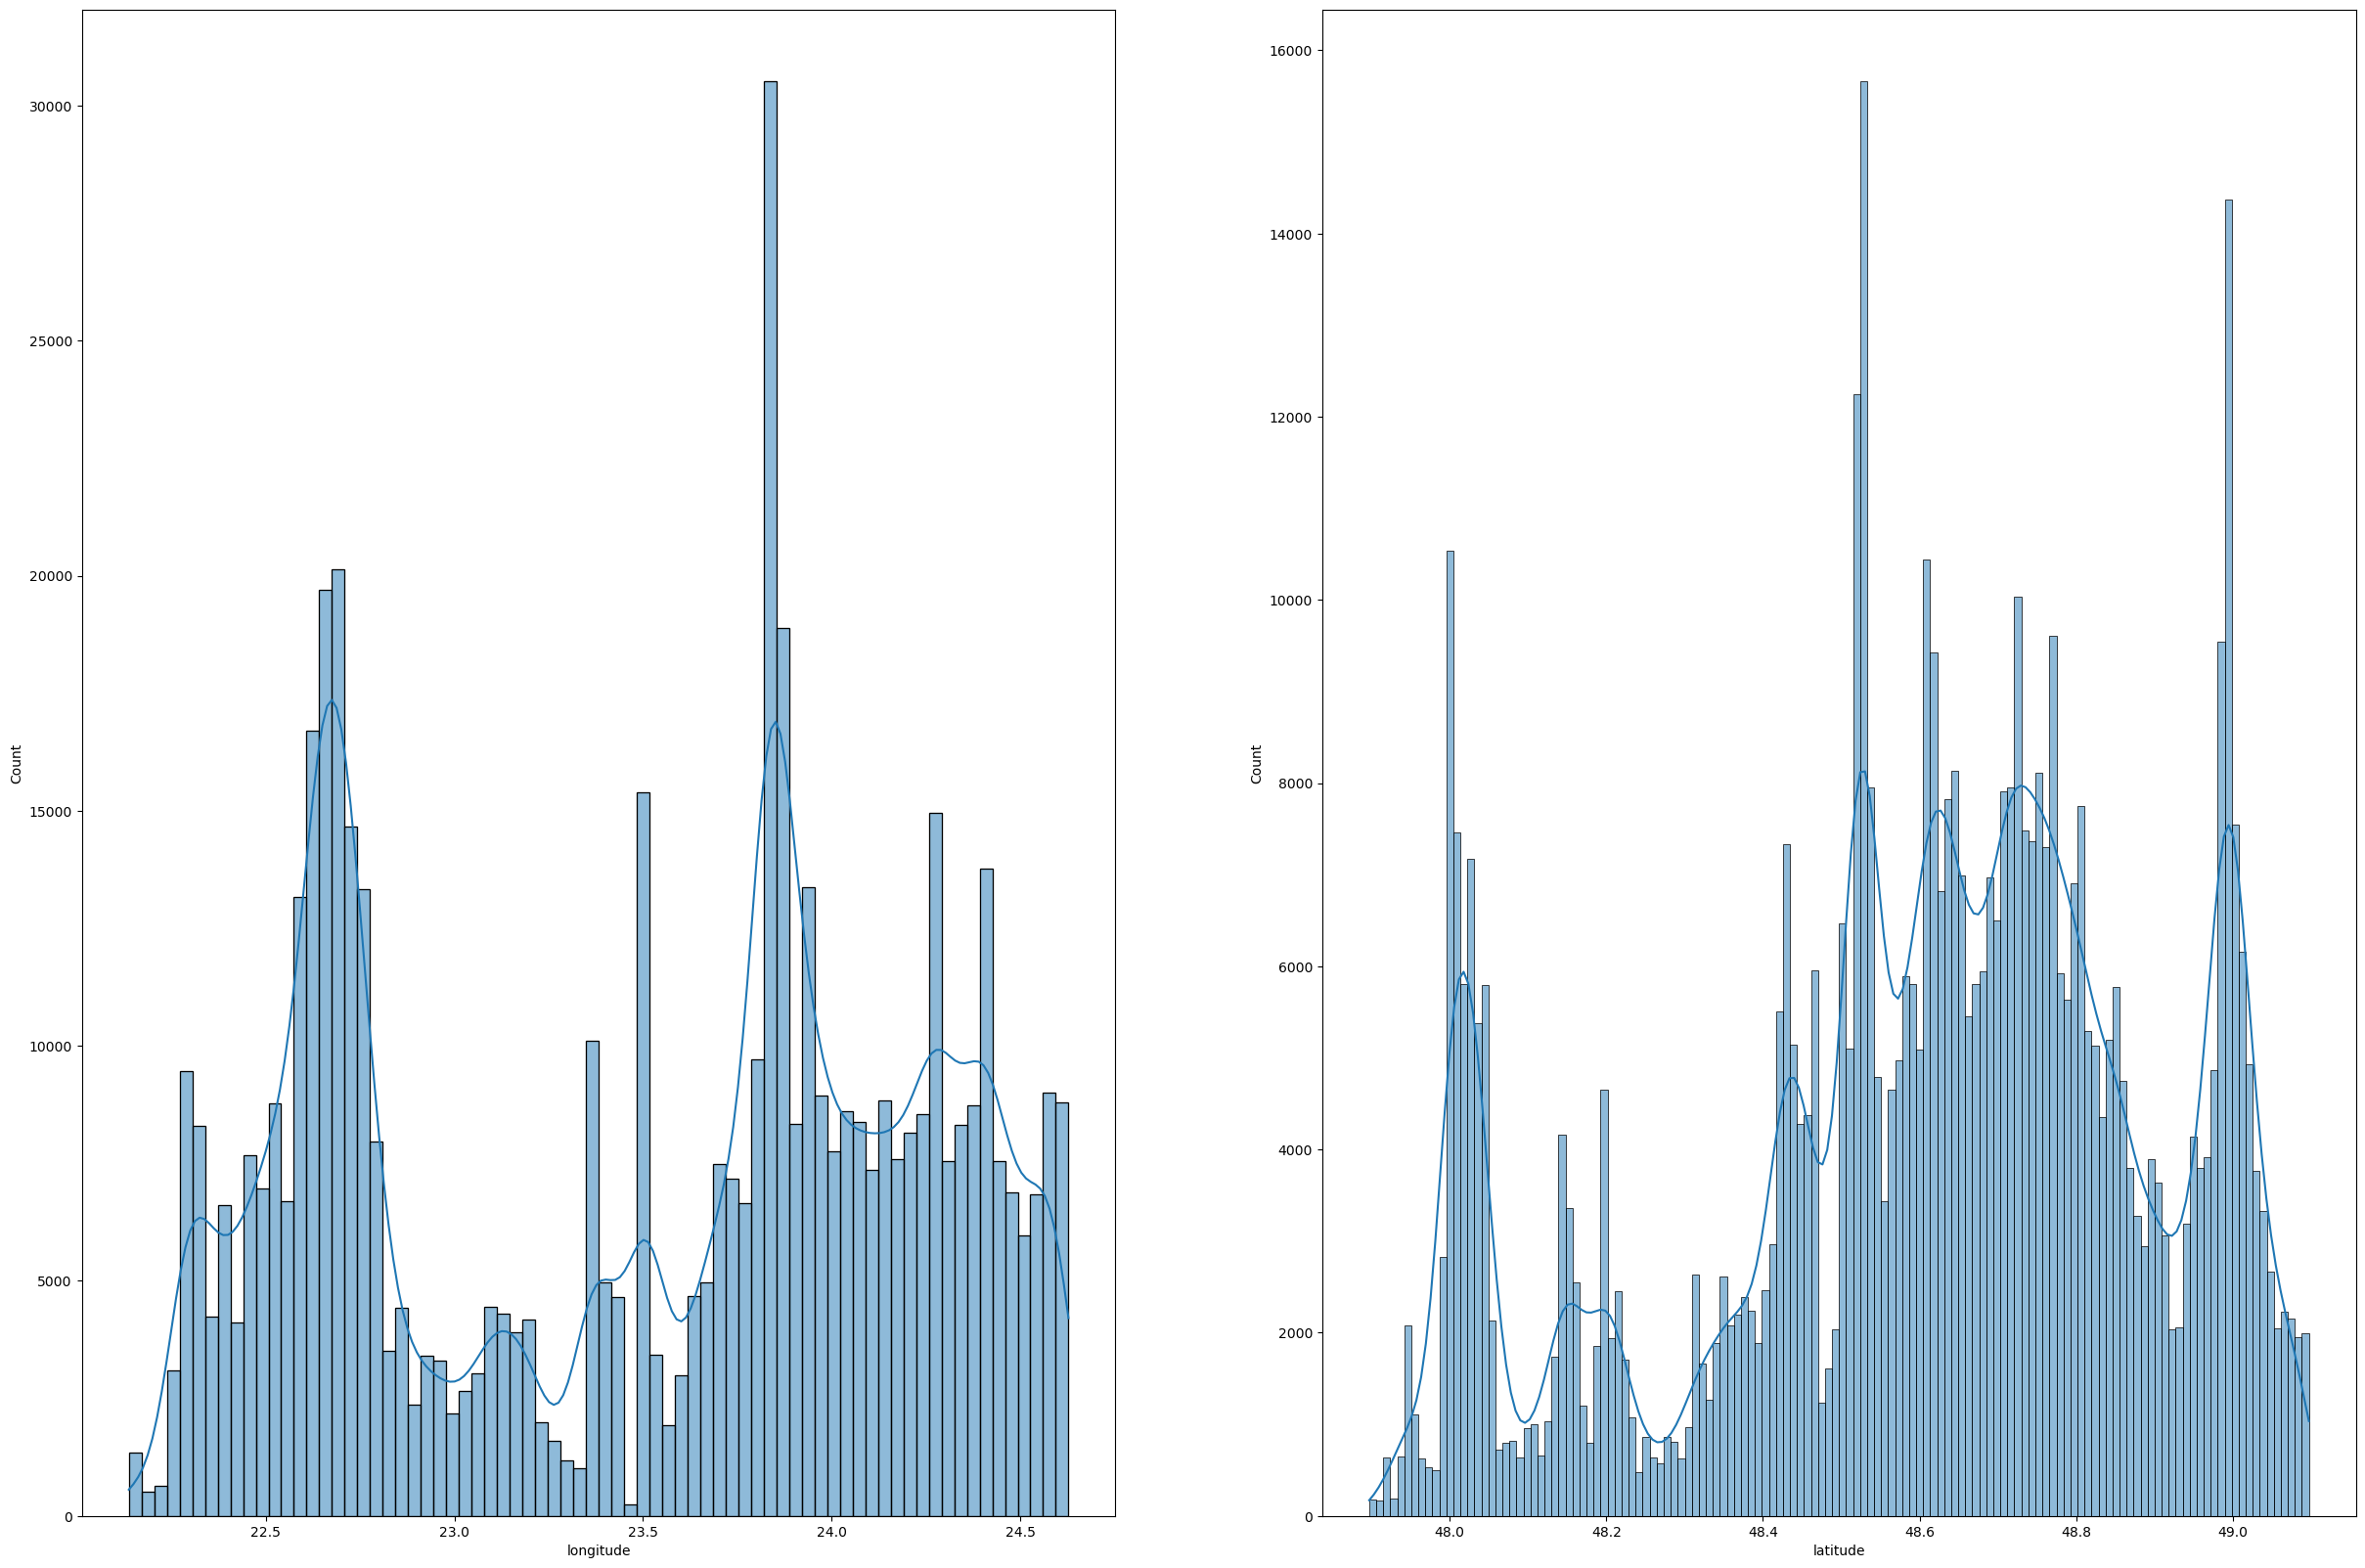

In [109]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=df27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=df27, x='latitude',bins='auto',kde=True,ax=axes[1])




In [110]:
#calculating standard deviation of complete dataset 

p_std_lat= st.pstdev(df27['latitude'])
p_std_lon= st.pstdev(df27['longitude'])


In [111]:
print('Population std for latitude: ',p_std_lat)
print('Population std for longitude: ',p_std_lon)

Population std for latitude:  0.29760044980004596
Population std for longitude:  0.7265082771645089


In [112]:
#calculating mean of each dataset

p_mean_lat=df27['latitude'].mean()
p_mean_lon=df27['longitude'].mean()

In [113]:
print('Population mean for latitude: ',p_mean_lat)
print('Population mean for latitude: ',p_mean_lon)

Population mean for latitude:  48.60227979480029
Population mean for latitude:  23.477819494475025


In [114]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat=(p_std_lat/p_mean_lat)*100
cv_lon=(p_std_lon/p_mean_lon)*100
print('CV for latitude: ',cv_lat)
print('CV for longitude: ',cv_lon)

CV for latitude:  0.612317881088131
CV for longitude:  3.094445279875656


In [115]:
#calculating std for each contributor group

df28=df27.groupby('uid').agg('std',numeric_only='True')
df28=df28.reset_index()

In [116]:
df28

uid  latitude  longitude
0        2175  0.004054   0.005250
1        4815  0.055565   0.087081
2       85218  0.258048   0.195247
3       93451  0.003219   0.022696
4      125309  0.000029   0.000105
..        ...       ...        ...
283  14955019  0.000297   0.000471
284  15000002  0.116086   0.200176
285  15005739       NaN        NaN
286  15013625  0.001453   0.003655
287  15146918       NaN        NaN

[288 rows x 3 columns]

In [117]:
df29=df28.merge(mean_loc,on='uid',how='left')

In [118]:
df29
df29= df29.rename(columns={'latitude_x': 'latitude'})
df29= df29.rename(columns={'longitude_x': 'longitude'})
df29= df29.rename(columns={'latitude_y': 'mean_lat'})
df29= df29.rename(columns={'longitude_y': 'mean_long'})
df29

uid  latitude  longitude   mean_lat  mean_long
0        2175  0.004054   0.005250  48.797852  22.366994
1        4815  0.055565   0.087081  48.960849  22.288900
2       85218  0.258048   0.195247  48.090430  24.231961
3       93451  0.003219   0.022696  48.185959  22.625996
4      125309  0.000029   0.000105  48.489986  23.483651
..        ...       ...        ...        ...        ...
283  14955019  0.000297   0.000471  48.353987  24.419267
284  15000002  0.116086   0.200176  48.092834  23.434806
285  15005739       NaN        NaN  48.451791  22.712161
286  15013625  0.001453   0.003655  48.975480  23.970560
287  15146918       NaN        NaN  47.957588  22.312727

[288 rows x 5 columns]

In [119]:
#calculation for CV applied to each group

df29['CV_lat']=(df29['latitude']/df29['mean_lat']*100)
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat
0        2175  0.004054   0.005250  48.797852  22.366994  0.008307
1        4815  0.055565   0.087081  48.960849  22.288900  0.113489
2       85218  0.258048   0.195247  48.090430  24.231961  0.536590
3       93451  0.003219   0.022696  48.185959  22.625996  0.006680
4      125309  0.000029   0.000105  48.489986  23.483651  0.000059
..        ...       ...        ...        ...        ...       ...
283  14955019  0.000297   0.000471  48.353987  24.419267  0.000614
284  15000002  0.116086   0.200176  48.092834  23.434806  0.241379
285  15005739       NaN        NaN  48.451791  22.712161       NaN
286  15013625  0.001453   0.003655  48.975480  23.970560  0.002966
287  15146918       NaN        NaN  47.957588  22.312727       NaN

[288 rows x 6 columns]

In [120]:
df29['CV_lon']=(df29['longitude']/df29['mean_long'])*100
df29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        2175  0.004054   0.005250  48.797852  22.366994  0.008307  0.023473
1        4815  0.055565   0.087081  48.960849  22.288900  0.113489  0.390690
2       85218  0.258048   0.195247  48.090430  24.231961  0.536590  0.805743
3       93451  0.003219   0.022696  48.185959  22.625996  0.006680  0.100308
4      125309  0.000029   0.000105  48.489986  23.483651  0.000059  0.000445
..        ...       ...        ...        ...        ...       ...       ...
283  14955019  0.000297   0.000471  48.353987  24.419267  0.000614  0.001931
284  15000002  0.116086   0.200176  48.092834  23.434806  0.241379  0.854182
285  15005739       NaN        NaN  48.451791  22.712161       NaN       NaN
286  15013625  0.001453   0.003655  48.975480  23.970560  0.002966  0.015249
287  15146918       NaN        NaN  47.957588  22.312727       NaN       NaN

[288 rows x 7 columns]

# Analysing OSM history data for Zakarpattia Aftere the bombing

In [121]:
#querying postgres to fetch data of zakar for the 6 months after the bombing 
query3 = "SELECT * FROM merged2 WHERE timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd') AND latitude BETWEEN 47.8968940 AND 49.0973238 AND longitude BETWEEN 22.1370590 AND 24.6274681;"

In [122]:
#storing in a dataframe
zakar_2 = pd.read_sql(query3, con=engine)
zakar_2.head()

id  changeset deleted                  timestamp       uid  \
0   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
2   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
3  5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
4  5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   

        user  version visibility    tp   extra   latitude  longitude  
0   Filip009        3       true  node  278380  49.004485  22.440338  
1   Filip009        3       true  node  278380  49.001951  22.378844  
2   Filip009        3       true  node  278380  49.001951  22.378844  
3  red_brand        2      false  node   19721  48.642877  22.300631  
4  red_brand        2       true  node   26295  48.657827  22.337595

In [123]:
#removing duplicate columns 
zakar_2=zakar_2.drop_duplicates(subset=['id', 'changeset'],keep='first',ignore_index=True)
zakar_2.head()

id  changeset deleted                  timestamp       uid  \
0   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1  5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
2  5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   
3  2460195066  124686301   false  2022-08-09 14:26:41+01:00   7154639   
4  3669342838  119517189   false  2022-04-09 21:34:36+01:00   3023916   

         user  version visibility    tp   extra   latitude  longitude  
0    Filip009        3       true  node  278380  49.004485  22.440338  
1   red_brand        2      false  node   19721  48.642877  22.300631  
2   red_brand        2       true  node   26295  48.657827  22.337595  
3   trofimich        3       true  node  183767  48.646850  23.333922  
4  neviksasha        4       true  node  122852  48.441727  22.730602

In [124]:
#splitting date only from timestamp and adding to the daraframe
zakar_2['date'] = zakar_2.loc[:, 'timestamp'].astype(str).str.split().str[0]
zakar_2

id  changeset deleted                  timestamp       uid  \
0        452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1       5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
2       5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   
3       2460195066  124686301   false  2022-08-09 14:26:41+01:00   7154639   
4       3669342838  119517189   false  2022-04-09 21:34:36+01:00   3023916   
...            ...        ...     ...                        ...       ...   
202275  9869148018  123252390   false  2022-07-05 22:49:35+01:00   1739740   
202276  9853440685  122959825   false  2022-06-28 15:09:54+01:00    693154   
202277  9613001570  119018227   false  2022-03-28 12:46:59+01:00  10857625   
202278  9624298144  119123997   false  2022-03-30 17:28:23+01:00   3023916   
202279  8254308324  122432769    true  2022-06-15 20:44:09+01:00   1739740   

                     user  version visibility    tp   extra   latitude  \
0                Filip009        3       true  node  278380  49.004485   
1               red_brand        2      false  node   19721  48.642877   
2               red_brand        2       true  node   26295  48.657827   
3               trofimich        3       true  node  183767  48.646850   
4              neviksasha        4       true  node  122852  48.441727   
...                   ...      ...        ...   ...     ...        ...   
202275           андриано        1       true  node  260584  48.608051   
202276  Władysław Komorek        1       true  node  151852  49.016221   
202277        muchichka_s        1       true  node  226084  48.446334   
202278         neviksasha        1       true  node  259938  48.440219   
202279           андриано        2      false  node  195659  48.601882   

        longitude        date  
0       22.440338  2022-07-23  
1       22.300631  2022-04-19  
2       22.337595  2022-05-22  
3       23.333922  2022-08-09  
4       22.730602  2022-04-09  
...           ...         ...  
202275  22.316602  2022-07-05  
202276  22.892235  2022-06-28  
202277  22.730730  2022-03-28  
202278  22.713695  2022-03-30  
202279  22.291706  2022-06-15  

[202280 rows x 13 columns]

### *Assigning Human and Bot categories to changesets*

In [125]:
#taking only useful columns
zakar4=zakar_2.drop(['latitude','longitude','extra'],axis=1)
zakar4.head()

id  changeset deleted                  timestamp       uid  \
0   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1  5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
2  5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   
3  2460195066  124686301   false  2022-08-09 14:26:41+01:00   7154639   
4  3669342838  119517189   false  2022-04-09 21:34:36+01:00   3023916   

         user  version visibility    tp        date  
0    Filip009        3       true  node  2022-07-23  
1   red_brand        2      false  node  2022-04-19  
2   red_brand        2       true  node  2022-05-22  
3   trofimich        3       true  node  2022-08-09  
4  neviksasha        4       true  node  2022-04-09

In [126]:
#counting number of edits in each changeset and then assigning a category [humna/bot] based on the counts
#for this classification, it is assumed that a changeset having more than 1000 edits in one time is contributed by automated script

db1=zakar4.drop(['deleted','timestamp','uid','user','version','visibility','tp'],axis=1)
db1=db1.groupby(['date','changeset']).count()
db1

id
date       changeset     
2022-02-24 117804471   10
           117814504   10
2022-02-25 117858106  205
           117859727   13
           117859762   17
...                   ...
2022-08-25 125375007  208
           125375303   96
           125375900    3
           125376228   65
           125377998    2

[5435 rows x 1 columns]

In [127]:
db1['category']=db1['id'].apply(lambda x:'human' if x <1000 else 'bot')
db1

id category
date       changeset              
2022-02-24 117804471   10    human
           117814504   10    human
2022-02-25 117858106  205    human
           117859727   13    human
           117859762   17    human
...                   ...      ...
2022-08-25 125375007  208    human
           125375303   96    human
           125375900    3    human
           125376228   65    human
           125377998    2    human

[5435 rows x 2 columns]

In [128]:
#total changesets contribued by each -bot and human
db1.groupby(['category']).count()

id
category      
bot         21
human     5414

In [129]:
#adding category to the original dataframe 
zakar4=zakar4.merge(db1['category'], on='changeset', how='left')
zakar4.head(7)

id  changeset deleted                  timestamp       uid  \
0   452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1  5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
2  5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   
3  2460195066  124686301   false  2022-08-09 14:26:41+01:00   7154639   
4  3669342838  119517189   false  2022-04-09 21:34:36+01:00   3023916   
5  9928895785  124421686   false  2022-08-03 08:26:34+01:00  13749532   
6  9928918759  124422294   false  2022-08-03 08:39:32+01:00  13749532   

         user  version visibility    tp        date category  
0    Filip009        3       true  node  2022-07-23      bot  
1   red_brand        2      false  node  2022-04-19    human  
2   red_brand        2       true  node  2022-05-22    human  
3   trofimich        3       true  node  2022-08-09    human  
4  neviksasha        4       true  node  2022-04-09    human  
5  kapitansup        1       true  node  2022-08-03      bot  
6  kapitansup        1       true  node  2022-08-03    human

### *Comparing the contribution done by Humans and Bots*

In [130]:
# date-wise grouping based on categories
db2=zakar4.groupby(['date','category']).count()
db2.head(10)

id  changeset  deleted  timestamp   uid  user  version  \
date       category                                                             
2022-02-24 human       20         20       20         20    20    20       20   
2022-02-25 human      246        246      246        246   246   246      246   
2022-02-26 bot       1054       1054     1054       1054  1054  1054     1054   
           human     1603       1603     1603       1603  1603  1603     1603   
2022-02-27 human       44         44       44         44    44    44       44   
2022-02-28 human       47         47       47         47    47    47       47   
2022-03-01 human      245        245      245        245   245   245      245   
2022-03-02 human      756        756      756        756   756   756      756   
2022-03-03 human      861        861      861        861   861   861      861   
2022-03-04 human      917        917      917        917   917   917      917   

                     visibility    tp  
date       category                    
2022-02-24 human             20    20  
2022-02-25 human            246   246  
2022-02-26 bot             1054  1054  
           human           1603  1603  
2022-02-27 human             44    44  
2022-02-28 human             47    47  
2022-03-01 human            245   245  
2022-03-02 human            756   756  
2022-03-03 human            861   861  
2022-03-04 human            917   917

In [131]:
#creating two sepearte datafarmes each having daily total contribution by human and bot respectively for the 6 months 
db3=db2.xs('human', level='category')
db4=db2.xs('bot', level='category')

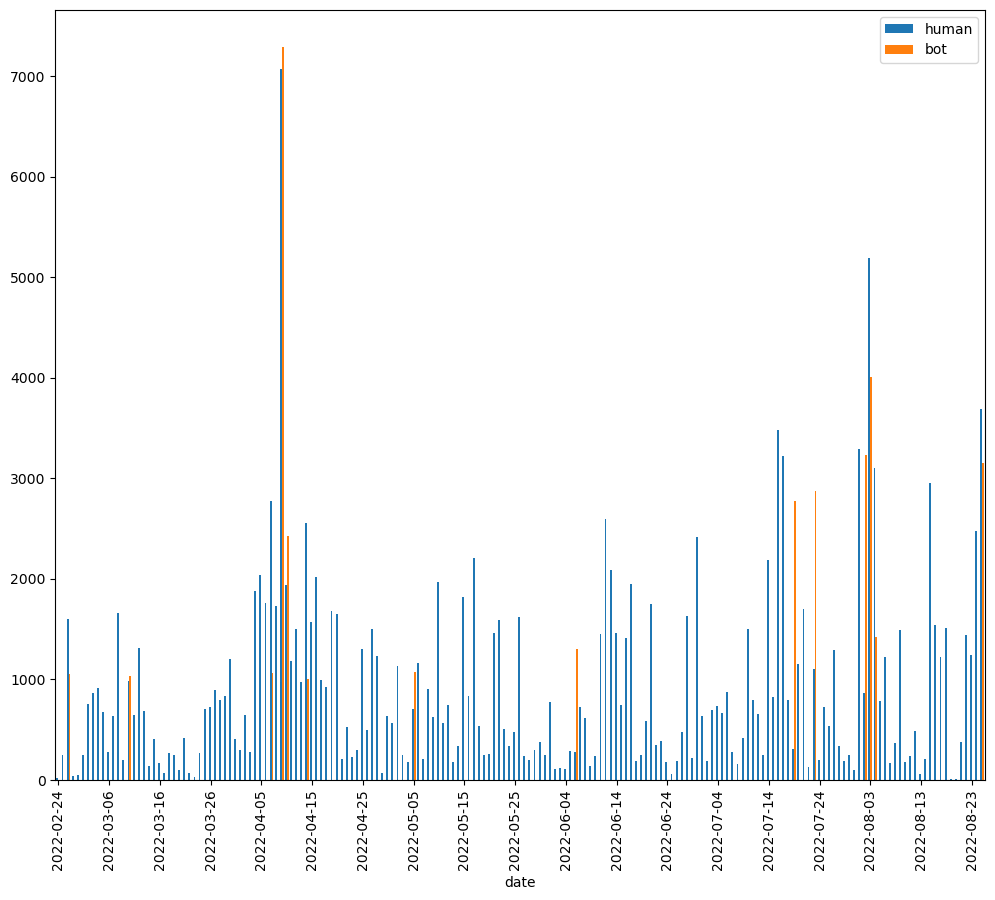

In [132]:
#plotting number of edits by both- human and bot category

x= db3.index
y=db3['changeset']
z=db4['changeset']

db5 = pd.DataFrame({
    'date': x,
    'human': y,
    'bot':z
})
db5 = db5.reset_index(drop=True)

step_size = 10 
ax = db5.plot(x="date", y=["human", "bot"],width=0.75, kind="bar", rot=90,figsize=(12, 10))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()

# to set x-axis labels based on the step size
ax.set_xticks(x_ticks[::step_size])
ax.set_xticklabels(x_tick_labels[::step_size])

plt.show()

### *Analysis of data for 1 week after the bombing*

In [133]:
#counting number of ediits per day for this week and plotting on bar graph
db6= zakar4.loc[(zakar4['date']>='2022-02-24') & (zakar4['date']<'2022-03-03'),:]
db6=db6.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db6=db6.groupby(['date']).count()
db6.head(3)

id
date            
2022-02-24    20
2022-02-25   246
2022-02-26  2657

In [134]:
#statistic measures of edits
db6.describe()

id
count     7.000000
mean    573.571429
std     953.360872
min      20.000000
25%      45.500000
50%     245.000000
75%     501.000000
max    2657.000000

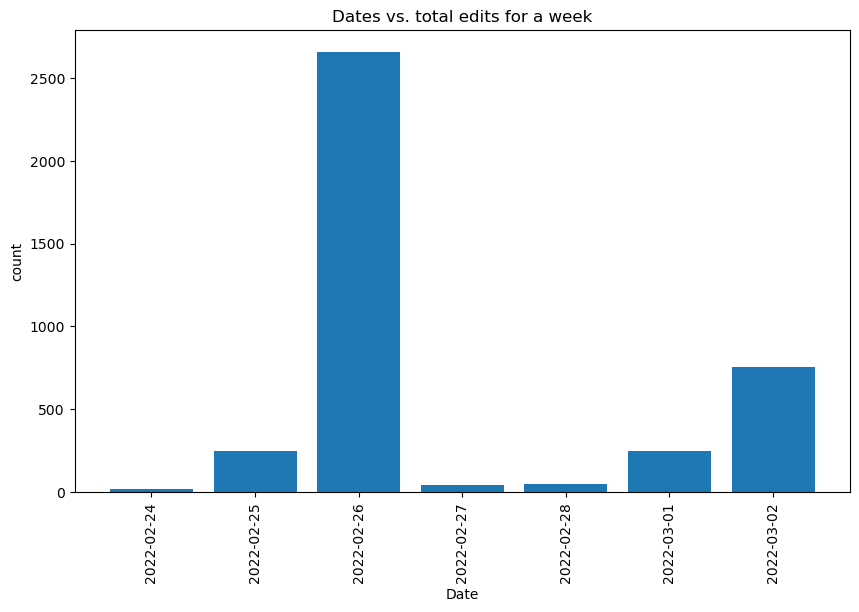

In [135]:
#using bar graph to plot the editing frequency

db6.index = pd.to_datetime(db6.index)
plt.figure(figsize=(10, 6))  
plt.bar(db6.index, db6['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a week')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the month after the bombing*

In [136]:
#counting number of ediits per day for 1 month and plotting on bar graph
db7= zakar4.loc[(zakar4['date']>='2022-02-24') & (zakar4['date']<'2022-03-26'),:]
db7=db7.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db7=db7.groupby(['date']).count()
db7.head()

id
date            
2022-02-24    20
2022-02-25   246
2022-02-26  2657
2022-02-27    44
2022-02-28    47

In [137]:
db7.describe() #statistic measures of edits

id
count    30.000000
mean    559.966667
std     628.311173
min      20.000000
25%     147.250000
50%     277.500000
75%     697.250000
max    2657.000000

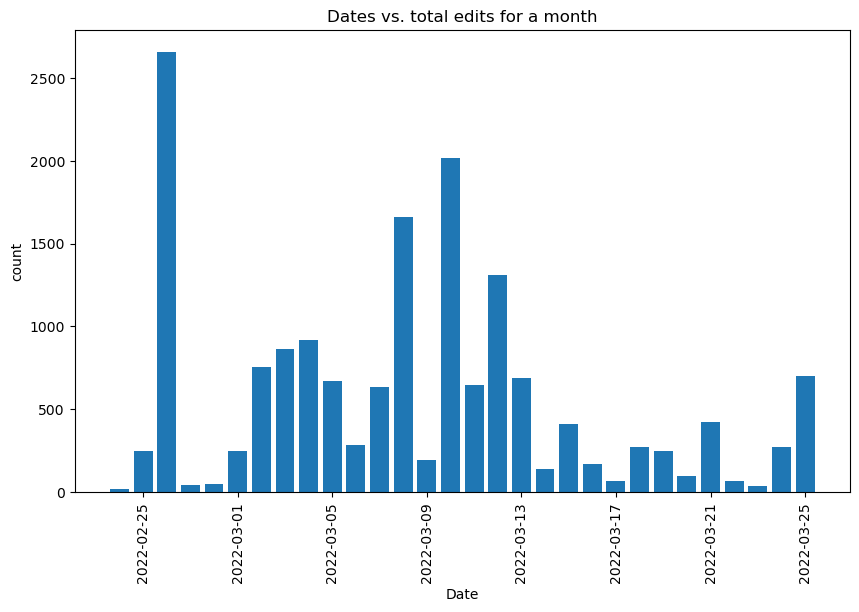

In [138]:
db7.index = pd.to_datetime(db7.index)
plt.figure(figsize=(10, 6))  
plt.bar(db7.index, db7['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for a month')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 3 months after the bombing*

In [139]:
#counting number of ediits per day for the 3 months before bombing and plotting on bar graph
db8= zakar4.loc[(zakar4['date']>='2022-02-24') & (zakar4['date']<'2022-05-26'),:]
db8=db8.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db8=db8.groupby(['date']).count()
db8.head()

id
date            
2022-02-24    20
2022-02-25   246
2022-02-26  2657
2022-02-27    44
2022-02-28    47

In [140]:
db8.describe() #statistic measures of edits

id
count     91.000000
mean    1058.307692
std     1640.905852
min       20.000000
25%      271.000000
50%      673.000000
75%     1384.000000
max    14360.000000

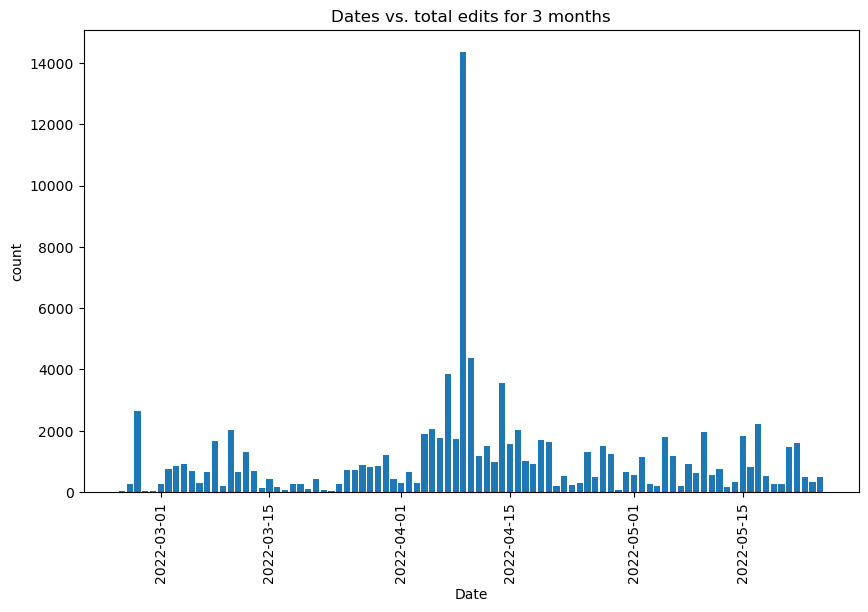

In [141]:
db8.index = pd.to_datetime(db8.index)
plt.figure(figsize=(10, 6))  
plt.bar(db8.index, db8['id'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Dates vs. total edits for 3 months')
plt.xticks(rotation=90)
plt.show()

### *Analysis of data for the 6 months after the bombing*

In [142]:
#counting number of ediits per day for the 6 months after bombing and plotting on bar graph
db9=zakar4.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
db9=db9.groupby(['date']).count()
db9.describe()

id
count    183.000000
mean    1105.721311
std     1551.862187
min        6.000000
25%      248.000000
50%      671.000000
75%     1492.000000
max    14360.000000

In [143]:
#analysing frequency of edits for each month during these 6 months period
dbmar= zakar4.loc[(zakar4['date']>='2022-02-24') & (zakar4['date']<'2022-03-26'),:]
dbmar=dbmar.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmar=dbmar.groupby(['date']).count()
dbmar=dbmar.reset_index()

In [144]:
dbapr= zakar4.loc[(zakar4['date']>='2022-03-26') & (zakar4['date']<'2022-04-26'),:]
dbapr=dbapr.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbapr=dbapr.groupby(['date']).count()
dbapr=dbapr.reset_index()

In [145]:
dbmay= zakar4.loc[(zakar4['date']>='2022-04-26') & (zakar4['date']<'2022-05-26'),:]
dbmay=dbmay.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbmay=dbmay.groupby(['date']).count()
dbmay=dbmay.reset_index()

In [146]:
dbjun= zakar4.loc[(zakar4['date']>='2022-05-26') & (zakar4['date']<'2022-06-26'),:]
dbjun=dbjun.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjun=dbjun.groupby(['date']).count()
dbjun=dbjun.reset_index()

In [147]:
dbjul= zakar4.loc[(zakar4['date']>='2022-06-26') & (zakar4['date']<'2022-07-26'),:]
dbjul=dbjul.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbjul=dbjul.groupby(['date']).count()
dbjul=dbjul.reset_index()


In [148]:
dbaug= zakar4.loc[(zakar4['date']>='2022-07-26') & (zakar4['date']<'2022-08-26'),:]
dbaug=dbaug.drop(['deleted','timestamp','uid','user','version','visibility','tp','changeset','category'],axis=1)
dbaug=dbaug.groupby(['date']).count()
dbaug=dbaug.reset_index()


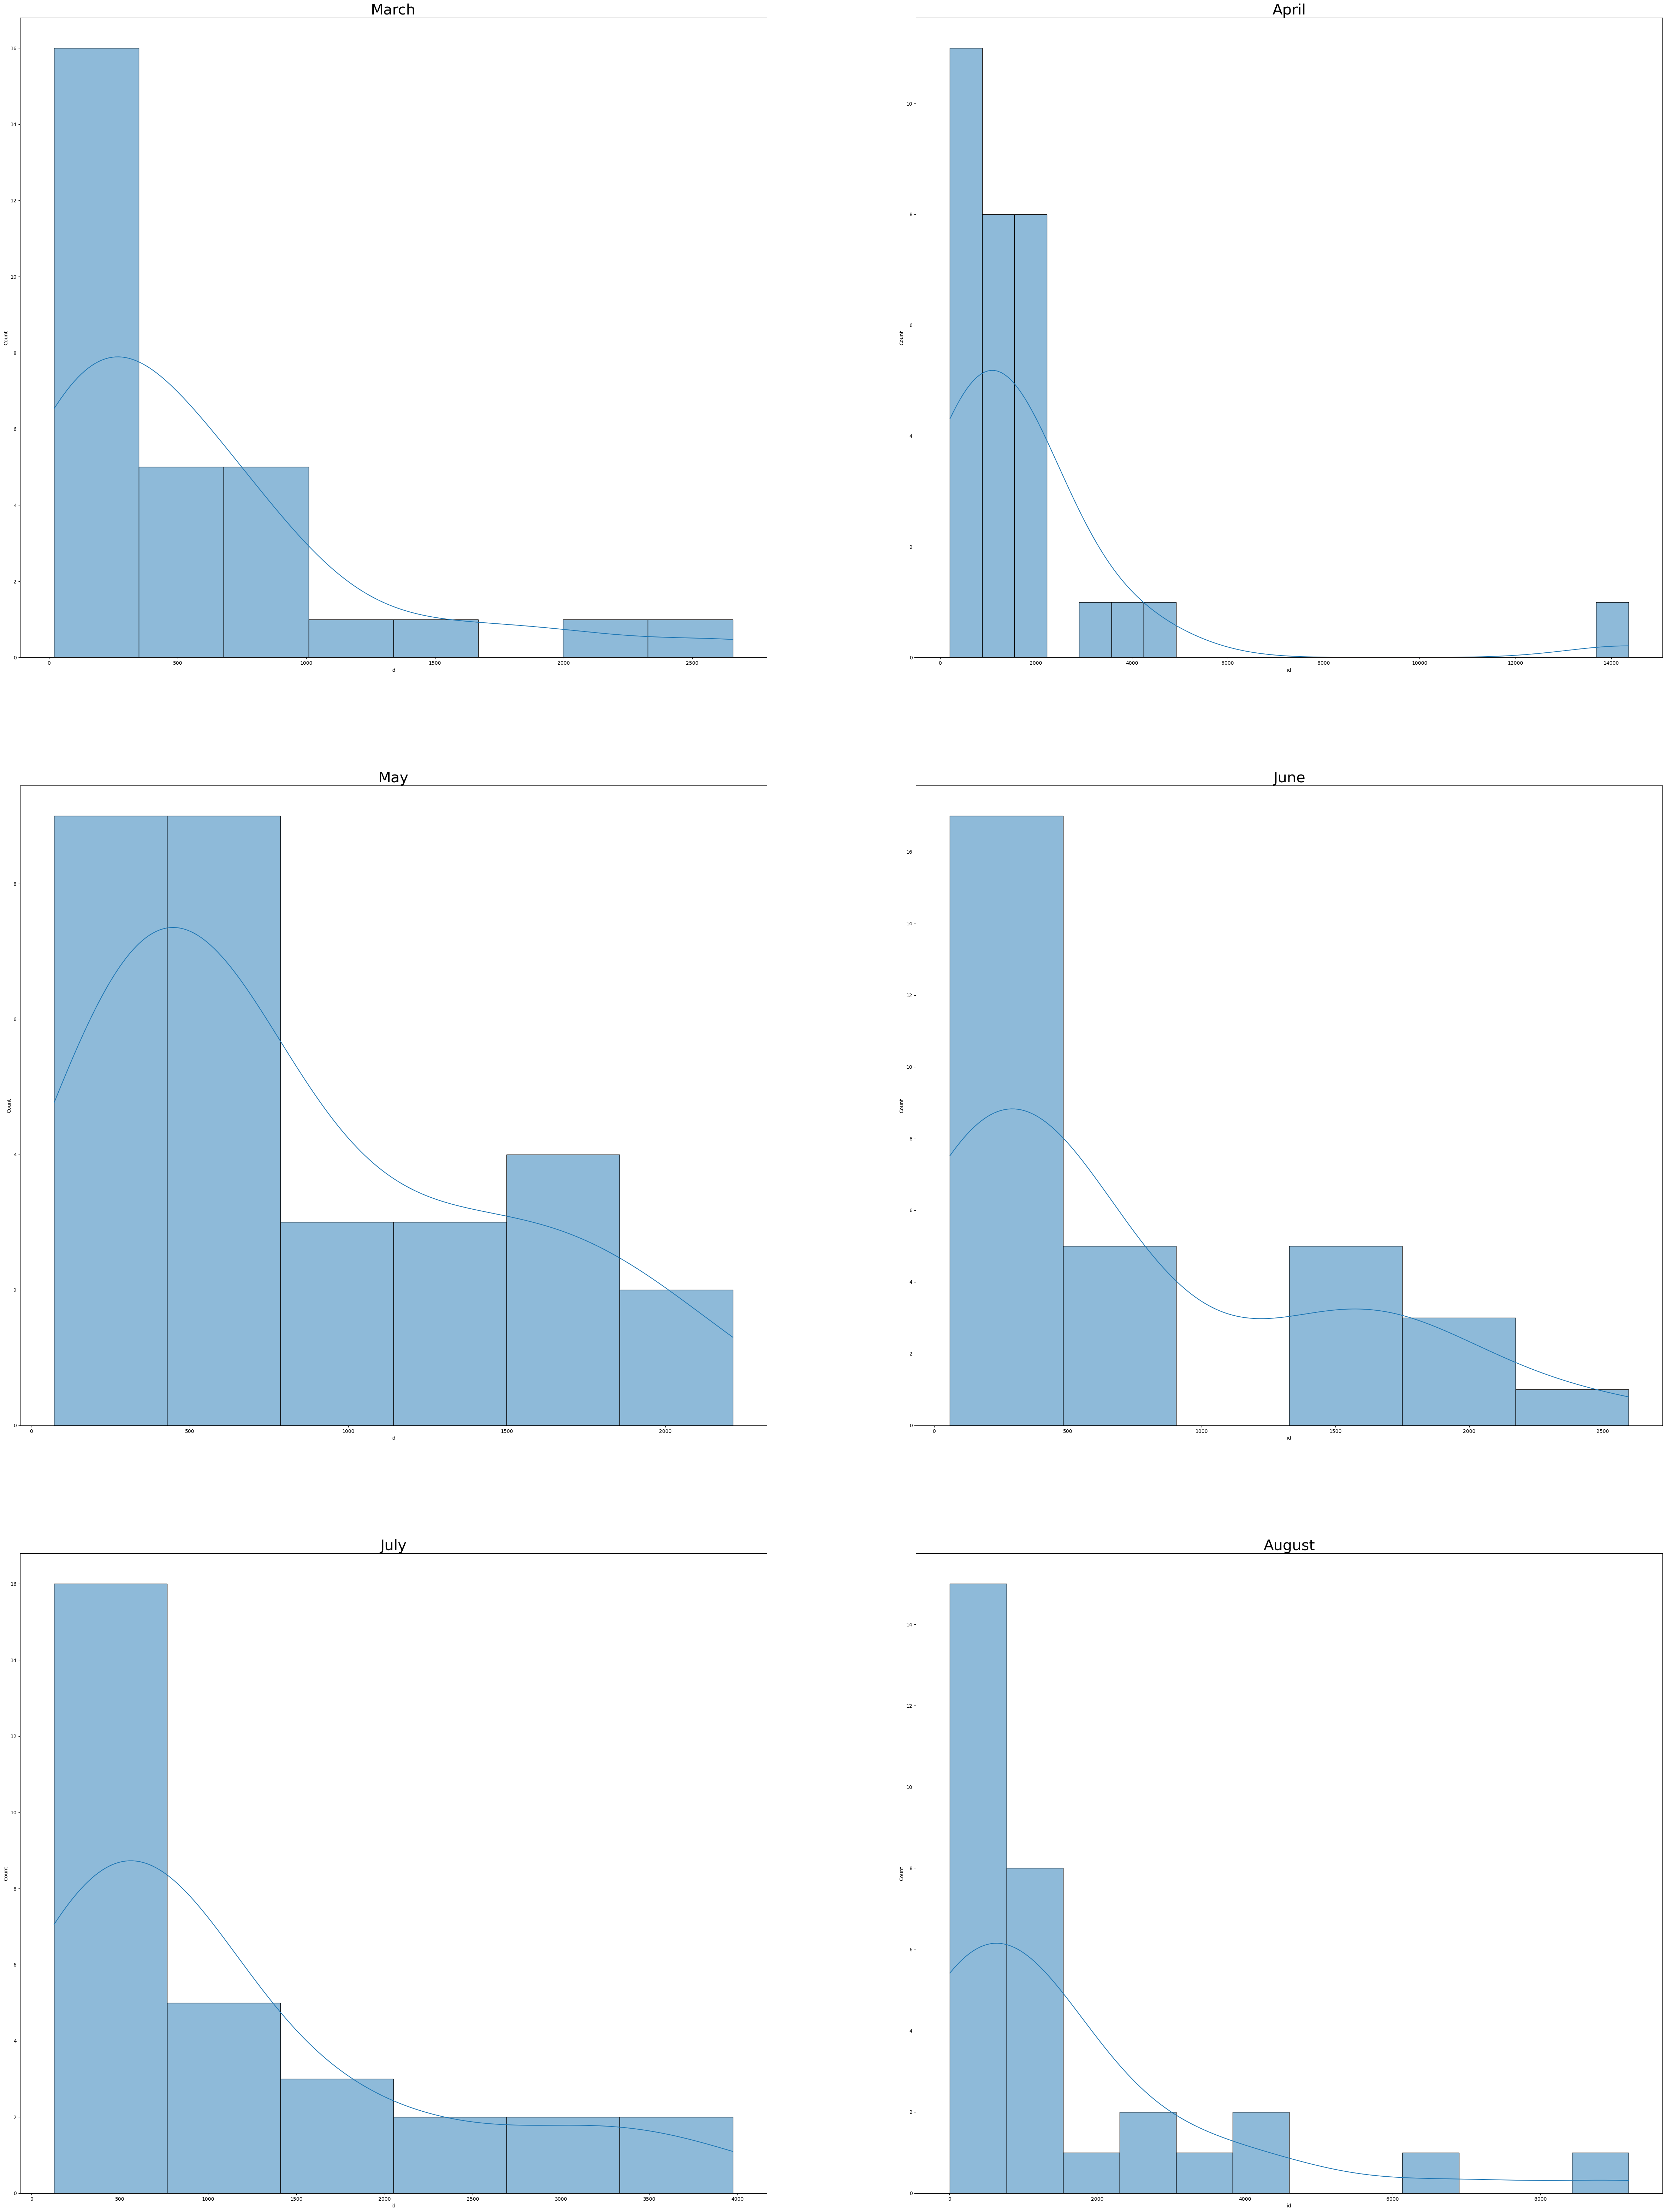

In [149]:
#histogram for frequency distributin 

fig,axes= plt.subplots(3,2,figsize=(60, 80))

axes = axes.flatten()

s=sb.histplot(data=dbmar, x='id',bins='auto',kde=True,ax=axes[0]).set_title('March',fontsize = 30)
s=sb.histplot(data=dbapr, x='id',bins='auto',kde=True,ax=axes[1]).set_title('April',fontsize = 30)
s=sb.histplot(data=dbmay, x='id',bins='auto',kde=True,ax=axes[2]).set_title('May',fontsize = 30)
s=sb.histplot(data=dbjun, x='id',bins='auto',kde=True,ax=axes[3]).set_title('June',fontsize = 30)
s=sb.histplot(data=dbjul, x='id',bins='auto',kde=True,ax=axes[4]).set_title('July',fontsize = 30)
s=sb.histplot(data=dbaug, x='id',bins='auto',kde=True,ax=axes[5]).set_title('August',fontsize = 30)

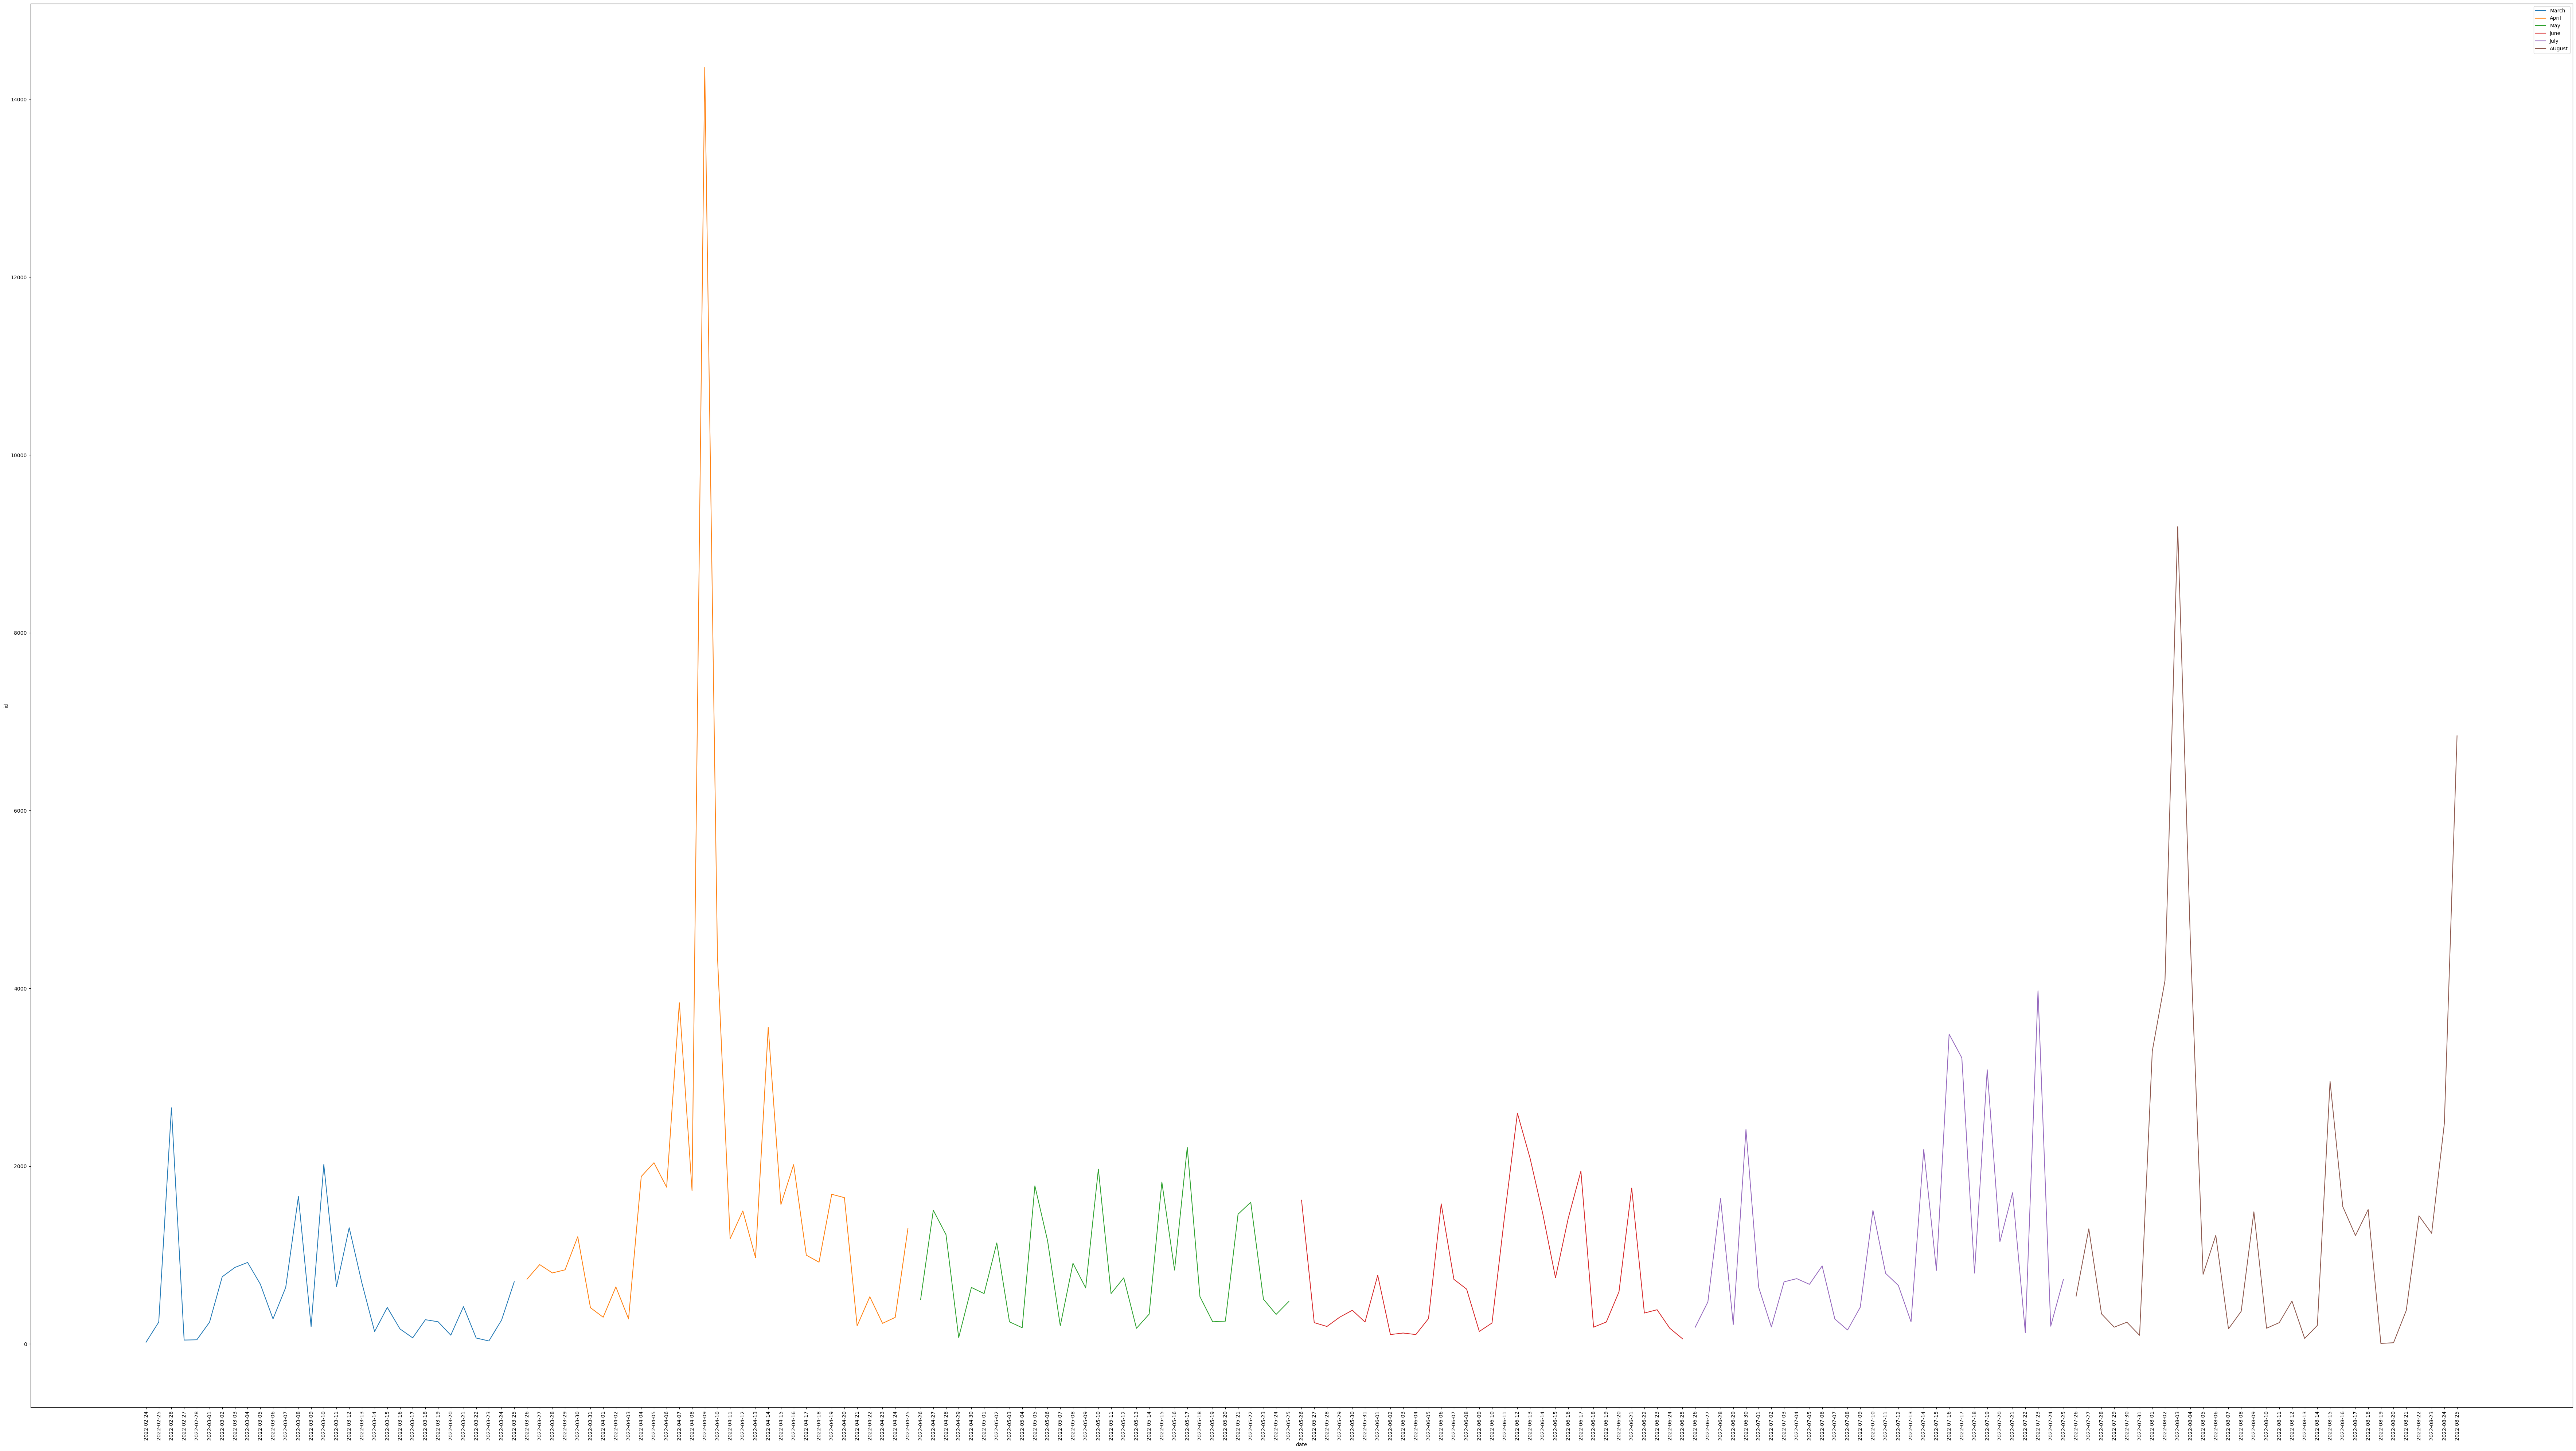

In [150]:
#trend chart to understand the editting pattern during 6 months befire bombing

fig = plt.subplots(figsize=(90, 50))
s=sb.lineplot(x='date', y='id', data=dbmar,label='March')
s=sb.lineplot(x='date', y='id', data=dbapr,label='April')
s=sb.lineplot(x='date', y='id', data=dbmay,label='May')
s=sb.lineplot(x='date', y='id', data=dbjun,label='June')
s=sb.lineplot(x='date', y='id', data=dbjul,label='July')
s=sb.lineplot(x='date', y='id', data=dbaug,label='AUgust')
plt.xticks(rotation=90)

plt.show()

### *Analysing editing frequency at contributor level*

In [151]:
#working on number of changesets and number of edits by each user during the 6 months

db10=zakar4.loc[zakar4['category']=='human']
db11=zakar4.loc[zakar4['category']=='bot']

db10=db10.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)
db11=db11.drop(['deleted','timestamp','user','version','visibility','tp','date'], axis=1)

In [152]:
#counting unique changesets added by each user during 6 months

db12=db10.groupby('uid')['changeset'].nunique()
db13=db11.groupby('uid')['changeset'].nunique()

In [153]:
#number of unique changesets posted by each contributors

changesets2 = db12.reset_index()
changesets2

uid  changeset
0        4815          1
1        5359          3
2       11238          5
3       13861          2
4       22199          1
..        ...        ...
251  16825225          1
252  16846372          1
253  16903311          1
254  16912060          2
255  16913652          1

[256 rows x 2 columns]

In [154]:
#counting the changesets added bu software bots during the period
changesets_bot2= db13.reset_index()
changesets_bot2

uid  changeset
0     69966          1
1    370549          1
2   3087157          2
3   4811708          5
4   7272786          3
5  10215904          1
6  10553599          2
7  13749532          5
8  13785347          1

In [155]:

changesets_bot2['uid'].isin(changesets_bot2['uid']) #automated scripts were added by the same users as those listed in 'human' category 

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
Name: uid, dtype: bool

In [156]:
#grouping data on user and counting the total contribution made by each user during the whole period
db14=db10.drop(['changeset','category'],axis=1)
id_counts2=db14.groupby(['uid']).count()

id_counts2=id_counts2.reset_index()
id_counts2

uid    id
0        4815     2
1        5359    14
2       11238  2194
3       13861    20
4       22199   151
..        ...   ...
251  16825225     1
252  16846372     1
253  16903311     1
254  16912060     2
255  16913652     5

[256 rows x 2 columns]

In [157]:
# Grouping users based on total contribution using the values of 25% and 75% values of quantiles 

id_counts2['contribution level']=id_counts2['id'].apply(lambda x: 'inactive' if x < 2000 else ('casual mapper' if 2000 <= x < 6000 else 'committed'))

id_counts2.head()

uid    id contribution level
0   4815     2           inactive
1   5359    14           inactive
2  11238  2194      casual mapper
3  13861    20           inactive
4  22199   151           inactive

In [158]:
#count of contributors in each category

contribution2= id_counts2.drop('id', axis=1)

contribution2=contribution2.groupby('contribution level').count()

print(contribution2)

                    uid
contribution level     
casual mapper         8
committed             8
inactive            240


In [159]:
#adding contribution level to the dataframe 
temp=id_counts2.drop('id',axis=1)
temp=temp.set_index('uid')


zakar4=zakar4.merge(temp['contribution level'], on='uid', how='left')
zakar4

id  changeset deleted                  timestamp       uid  \
0        452464863  123966239   false  2022-07-23 09:32:45+01:00  10553599   
1       5467980118  119918026    true  2022-04-19 18:35:44+01:00  15483615   
2       5468391207  121327556   false  2022-05-22 17:59:50+01:00  15483615   
3       2460195066  124686301   false  2022-08-09 14:26:41+01:00   7154639   
4       3669342838  119517189   false  2022-04-09 21:34:36+01:00   3023916   
...            ...        ...     ...                        ...       ...   
202342  9869148018  123252390   false  2022-07-05 22:49:35+01:00   1739740   
202343  9853440685  122959825   false  2022-06-28 15:09:54+01:00    693154   
202344  9613001570  119018227   false  2022-03-28 12:46:59+01:00  10857625   
202345  9624298144  119123997   false  2022-03-30 17:28:23+01:00   3023916   
202346  8254308324  122432769    true  2022-06-15 20:44:09+01:00   1739740   

                     user  version visibility    tp        date category  \
0                Filip009        3       true  node  2022-07-23      bot   
1               red_brand        2      false  node  2022-04-19    human   
2               red_brand        2       true  node  2022-05-22    human   
3               trofimich        3       true  node  2022-08-09    human   
4              neviksasha        4       true  node  2022-04-09    human   
...                   ...      ...        ...   ...         ...      ...   
202342           андриано        1       true  node  2022-07-05    human   
202343  Władysław Komorek        1       true  node  2022-06-28    human   
202344        muchichka_s        1       true  node  2022-03-28    human   
202345         neviksasha        1       true  node  2022-03-30    human   
202346           андриано        2      false  node  2022-06-15    human   

       contribution level  
0                inactive  
1           casual mapper  
2           casual mapper  
3           casual mapper  
4               committed  
...                   ...  
202342          committed  
202343           inactive  
202344          committed  
202345          committed  
202346          committed  

[202347 rows x 12 columns]

In [160]:
#counting the number of deleted nodes for each user
df_deleted2=zakar4.loc[:,['uid','deleted']]
df_deleted2=df_deleted2.groupby(['uid','deleted'])['deleted'].count()
df_del2=pd.DataFrame(df_deleted2)
df_del2= df_del2.rename(columns={'deleted': 'deleted nodes'})
df_del2=df_del2.reset_index()
df_del2=df_del2.loc[df_del2['deleted']=='true']


In [161]:
df_del2=df_del2.set_index('uid')
df_del2

deleted  deleted nodes
uid                            
11238       true             76
62361       true              1
69966       true             18
118134      true              3
156033      true             24
...          ...            ...
15483615    true            759
16180657    true             10
16684339    true             11
16710815    true              5
16789685    true              2

[106 rows x 2 columns]

### *Analysis of version history on contributor level*

In [162]:
#anaysing version history on contributor level
zakar4=zakar4.sort_values(['id', 'version'], ascending=[True,True])
zakar4

id  changeset deleted                  timestamp       uid  \
109355    26862965  121249307   false  2022-05-20 16:04:47+01:00  10299365   
109356    26862965  121404871   false  2022-05-24 08:03:11+01:00  10857625   
28103     26862972  121249307   false  2022-05-20 16:04:47+01:00  10299365   
42831     26862974  124336151   false  2022-08-01 10:53:09+01:00    204049   
12641     26862976  121249307   false  2022-05-20 16:04:47+01:00  10299365   
...            ...        ...     ...                        ...       ...   
89210   9978254209  125376228   false  2022-08-25 20:21:10+01:00  14173042   
30067   9978254210  125376228   false  2022-08-25 20:21:10+01:00  14173042   
28556   9978254211  125376228   false  2022-08-25 20:21:10+01:00  14173042   
201766  9978254212  125376228   false  2022-08-25 20:21:10+01:00  14173042   
57068   9978254213  125376228   false  2022-08-25 20:21:10+01:00  14173042   

               user  version visibility    tp        date category  \
109355     Maku1312       15       true  node  2022-05-20    human   
109356  muchichka_s       16       true  node  2022-05-24    human   
28103      Maku1312       14       true  node  2022-05-20    human   
42831         olehz       11       true  node  2022-08-01    human   
12641      Maku1312       11       true  node  2022-05-20    human   
...             ...      ...        ...   ...         ...      ...   
89210      apaluto!        1       true  node  2022-08-25    human   
30067      apaluto!        1       true  node  2022-08-25    human   
28556      apaluto!        1       true  node  2022-08-25    human   
201766     apaluto!        1       true  node  2022-08-25    human   
57068      apaluto!        1       true  node  2022-08-25    human   

       contribution level  
109355           inactive  
109356          committed  
28103            inactive  
42831            inactive  
12641            inactive  
...                   ...  
89210            inactive  
30067            inactive  
28556            inactive  
201766           inactive  
57068            inactive  

[202347 rows x 12 columns]

In [163]:
#Extract the list of editing version for each of the contributors 

version2=zakar4.groupby('uid')['version'].apply(list)
version_list2=pd.DataFrame(version2)
version_list2.head()

version
uid                                 
4815                          [7, 3]
5359   [4, 3, 2, 2, 2, 2, 2, 2, 2...
11238  [2, 2, 2, 2, 3, 2, 3, 2, 2...
13861  [1, 1, 1, 1, 1, 1, 1, 1, 1...
22199  [1, 1, 1, 1, 1, 1, 1, 1, 1...

In [164]:
# This will count the number of new nodes vs number of edits 
# Function to count the frequency of new nodes(version=1) in a list


# Apply the functions to the 'version' column
version_list2['new nodes'] = version_list2['version'].apply(count_ones)
version_list2['edited nodes'] = version_list2['version'].apply(edits)                                                    
version_list2.head(16)

version  new nodes  edited nodes
uid                                                           
4815                           [7, 3]          0             2
5359    [4, 3, 2, 2, 2, 2, 2, 2, 2...          0            14
11238   [2, 2, 2, 2, 3, 2, 3, 2, 2...       1753           441
13861   [1, 1, 1, 1, 1, 1, 1, 1, 1...         20             0
22199   [1, 1, 1, 1, 1, 1, 1, 1, 1...        151             0
62361   [3, 6, 1, 1, 1, 1, 1, 1, 1...        175             2
69966   [5, 7, 3, 6, 4, 5, 4, 4, 3...       3315           274
94578   [10, 2, 9, 7, 10, 4, 9, 5,...          0           839
118134  [2, 5, 4, 4, 2, 2, 2, 2, 2...       1810           100
156033  [4, 2, 3, 3, 2, 2, 2, 2, 2...         28            40
177389  [3, 3, 3, 3, 3, 3, 2, 4, 3...          0           355
186195                           [13]          0             1
195702                            [1]          1             0
200631  [4, 5, 3, 4, 3, 4, 5, 4, 4...         41            72
204049  [11, 10, 13, 14, 8, 14, 12...        241          1691
208947  [3, 4, 3, 2, 2, 2, 2, 2, 2...        165            32

### *Calculating the total active days for each user*

In [165]:
df_lifespan2= zakar4.loc[:,['uid','date']]
df_lifespan2['date'] = df_lifespan2.date.astype('datetime64[ns]')
df_lifespan2=df_lifespan2.sort_values(['uid','date'],ascending=[True,True])
df_lifespan2

uid       date
32558       4815 2022-06-17
111889      4815 2022-06-17
91059       5359 2022-03-09
57433       5359 2022-03-13
194936      5359 2022-06-05
...          ...        ...
83714   16913652 2022-08-23
108248  16913652 2022-08-23
176719  16913652 2022-08-23
31698   16913652 2022-08-23
129002  16913652 2022-08-23

[202347 rows x 2 columns]

In [166]:
 
df_lifespan2=df_lifespan2.groupby('uid')
first_row= df_lifespan2.min()
last_row=df_lifespan2.max()

timeframe_1=pd.DataFrame(first_row).reset_index()
timeframe_2=pd.DataFrame(last_row).reset_index()

# first day when the conributor made an activty
timeframe_1.head(10)

uid       date
0    4815 2022-06-17
1    5359 2022-03-09
2   11238 2022-05-15
3   13861 2022-04-24
4   22199 2022-03-30
5   62361 2022-03-18
6   69966 2022-03-02
7   94578 2022-05-05
8  118134 2022-04-04
9  156033 2022-08-04

In [167]:
timeframe_2.head(10) # last day when the conributor made an activty

uid       date
0    4815 2022-06-17
1    5359 2022-06-05
2   11238 2022-05-18
3   13861 2022-04-24
4   22199 2022-03-30
5   62361 2022-03-18
6   69966 2022-03-12
7   94578 2022-05-30
8  118134 2022-04-05
9  156033 2022-08-04

In [168]:
#calculating the difference between two dats

result=(timeframe_2['date']-timeframe_1['date'])
day=pd.to_timedelta(1, unit='d')
timeframe_1['active days']=result+day
timeframe_1=timeframe_1.drop(['date'],axis=1)
timeframe_1.head(6)

uid active days
0   4815      1 days
1   5359     89 days
2  11238      4 days
3  13861      1 days
4  22199      1 days
5  62361      1 days

## *Importing and analysing tag data for the 6 months period*

In [169]:
#to fetch the tags data for all the nodes fetched in previous query for 6 months

query4 = "SELECT * FROM node_tags WHERE id IN (SELECT id FROM user_info WHERE id IN (SELECT id FROM node_locations WHERE latitude BETWEEN 47.8968940 AND 49.0973238 AND longitude BETWEEN 22.1370590 AND 24.6274681) AND timestamp >=TO_DATE('2022-02-24','yyyy-mm-dd') AND timestamp <TO_DATE('2022-08-26','yyyy-mm-dd'));"

In [170]:
zakar5 = pd.read_sql(query4, con=engine)

In [171]:
pd.set_option('max_colwidth', None)
zakar5

id  \
0       1279063227   
1       1279063227   
2       1279063227   
3       1279063227   
4       1279063227   
...            ...   
283862  6446343965   
283863  6446343969   
283864  6446343969   
283865  6446343975   
283866  6446343975   

                                                                                                                    tags  
0                                                                                                {'amenity': 'pharmacy'}  
1                                                                   {'amenity': 'pharmacy', 'name': 'Аптека Мед-Сервіс'}  
2       {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Аптека Мед-Сервіс'}  
3              {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Мед-Сервіс'}  
4              {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Мед-Сервіс'}  
...                                                                                                                  ...  
283862                                                                                                                {}  
283863                                                                                                                {}  
283864                                                                                                                {}  
283865                                                                                                                {}  
283866                                                                                                                {}  

[283867 rows x 2 columns]

In [172]:
#count of empty tags

db15=zakar5[zakar5['tags']=='{}'].count()
db15

id      263787
tags    263787
dtype: int64

In [173]:
#only taking the records having non-null values in tags

db15=zakar5[zakar5['tags']!='{}']

db15

id  \
0       1279063227   
1       1279063227   
2       1279063227   
3       1279063227   
4       1279063227   
...            ...   
283779  6170847261   
283784  6184099895   
283785  6184099895   
283786  6184099895   
283787  6184099895   

                                                                                                                          tags  
0                                                                                                      {'amenity': 'pharmacy'}  
1                                                                         {'amenity': 'pharmacy', 'name': 'Аптека Мед-Сервіс'}  
2             {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Аптека Мед-Сервіс'}  
3                    {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Мед-Сервіс'}  
4                    {'addr:housenumber': '12', 'addr:street': 'Волошина вулиця', 'amenity': 'pharmacy', 'name': 'Мед-Сервіс'}  
...                                                                                                                        ...  
283779                                                      {'amenity': 'cafe', 'name': 'Оленка', 'phone': '+380 68 990 3274'}  
283784                                                                                           {'historic': 'wayside_cross'}  
283785                                                                {'historic': 'wayside_cross', 'name:hu': 'XIII. stáció'}  
283786                                          {'historic': 'wayside_cross', 'name': 'XIII подія', 'name:hu': 'XIII. stáció'}  
283787  {'historic': 'wayside_cross', 'name': 'XIII подія', 'name:hu': 'XIII. stáció', 'ref': 'XIII', 'religion': 'christian'}  

[20080 rows x 2 columns]

In [174]:
# append the tags column to previous dataframe having user details 
pd.set_option('max_colwidth', 30)
db16=db15.merge(zakar4, on='id', how='left')
db16

id                           tags  changeset deleted  \
0      1279063227        {'amenity': 'pharmacy'}  118426746   false   
1      1279063227        {'amenity': 'pharmacy'}  119496370   false   
2      1279063227        {'amenity': 'pharmacy'}  119506686   false   
3      1279063227  {'amenity': 'pharmacy', 'n...  118426746   false   
4      1279063227  {'amenity': 'pharmacy', 'n...  119496370   false   
...           ...                            ...        ...     ...   
29035  6184099895  {'historic': 'wayside_cros...  118159804   false   
29036  6184099895  {'historic': 'wayside_cros...  118706721   false   
29037  6184099895  {'historic': 'wayside_cros...  118143863   false   
29038  6184099895  {'historic': 'wayside_cros...  118159804   false   
29039  6184099895  {'historic': 'wayside_cros...  118706721   false   

                       timestamp       uid            user  version  \
0      2022-03-13 12:00:14+00:00  11881364  StreetMapUsr73       14   
1      2022-04-09 10:26:47+01:00    721672          Movses       15   
2      2022-04-09 15:35:36+01:00    374661          iorant       16   
3      2022-03-13 12:00:14+00:00  11881364  StreetMapUsr73       14   
4      2022-04-09 10:26:47+01:00    721672          Movses       15   
...                          ...       ...             ...      ...   
29035  2022-03-06 13:51:50+00:00  10857625     muchichka_s        3   
29036  2022-03-20 18:39:18+00:00  10857625     muchichka_s        4   
29037  2022-03-05 23:49:45+00:00   3335899            GBAB        2   
29038  2022-03-06 13:51:50+00:00  10857625     muchichka_s        3   
29039  2022-03-20 18:39:18+00:00  10857625     muchichka_s        4   

      visibility    tp        date category contribution level  
0           true  node  2022-03-13    human           inactive  
1           true  node  2022-04-09    human           inactive  
2           true  node  2022-04-09    human          committed  
3           true  node  2022-03-13    human           inactive  
4           true  node  2022-04-09    human           inactive  
...          ...   ...         ...      ...                ...  
29035       true  node  2022-03-06    human          committed  
29036       true  node  2022-03-20    human          committed  
29037       true  node  2022-03-05    human           inactive  
29038       true  node  2022-03-06    human          committed  
29039       true  node  2022-03-20    human          committed  

[29040 rows x 13 columns]

In [175]:
# convrting tags from dictionary format into table format where each column is a unique key and stores its value

from ast import literal_eval
db16['tags'] = db16['tags'].apply(literal_eval)
extracted_data=[]

for index, row in db16.iterrows():
    tag_dict = row['tags']
    extracted_row = {"id": row['id']}  
    extracted_row.update(tag_dict)  
    extracted_data.append(extracted_row)


pd.set_option('display.max_columns', None)

webhook_data = {'created_by': 'JOSM'}

def parse_webhook(webhook_data):
    data = ast.literal_eval(str(webhook_data))
    return data
db17 = pd.DataFrame(extracted_data)

In [176]:
id_to_value1 = db16.set_index('id')['uid'].to_dict()
db17['uid'] = db17['id'].map(id_to_value1) #adding uid column to the dataframe
db17.head()

id   amenity               name addr:housenumber addr:street  \
0  1279063227  pharmacy                NaN              NaN         NaN   
1  1279063227  pharmacy                NaN              NaN         NaN   
2  1279063227  pharmacy                NaN              NaN         NaN   
3  1279063227  pharmacy  Аптека Мед-Сервіс              NaN         NaN   
4  1279063227  pharmacy  Аптека Мед-Сервіс              NaN         NaN   

  opening_hours healthcare brand wheelchair addr:postcode name:en name:ru  \
0           NaN        NaN   NaN        NaN           NaN     NaN     NaN   
1           NaN        NaN   NaN        NaN           NaN     NaN     NaN   
2           NaN        NaN   NaN        NaN           NaN     NaN     NaN   
3           NaN        NaN   NaN        NaN           NaN     NaN     NaN   
4           NaN        NaN   NaN        NaN           NaN     NaN     NaN   

  name:uk phone tourism name:sk place cuisine internet_access website  \
0     NaN   NaN     NaN     NaN   NaN     NaN             NaN     NaN   
1     NaN   NaN     NaN     NaN   NaN     NaN             NaN     NaN   
2     NaN   NaN     NaN     NaN   NaN     NaN             NaN     NaN   
3     NaN   NaN     NaN     NaN   NaN     NaN             NaN     NaN   
4     NaN   NaN     NaN     NaN   NaN     NaN             NaN     NaN   

  contact:instagram shop toilets:disposal operator crossing crossing_ref  \
0               NaN  NaN              NaN      NaN      NaN          NaN   
1               NaN  NaN              NaN      NaN      NaN          NaN   
2               NaN  NaN              NaN      NaN      NaN          NaN   
3               NaN  NaN              NaN      NaN      NaN          NaN   
4               NaN  NaN              NaN      NaN      NaN          NaN   

  highway historic description wikidata wikipedia name:hu natural level  \
0     NaN      NaN         NaN      NaN       NaN     NaN     NaN   NaN   
1     NaN      NaN         NaN      NaN       NaN     NaN     NaN   NaN   
2     NaN      NaN         NaN      NaN       NaN     NaN     NaN   NaN   
3     NaN      NaN         NaN      NaN       NaN     NaN     NaN   NaN   
4     NaN      NaN         NaN      NaN       NaN     NaN     NaN   NaN   

  brand:wikidata artist_name artwork_type material  ref start_date  \
0            NaN         NaN          NaN      NaN  NaN        NaN   
1            NaN         NaN          NaN      NaN  NaN        NaN   
2            NaN         NaN          NaN      NaN  NaN        NaN   
3            NaN         NaN          NaN      NaN  NaN        NaN   
4            NaN         NaN          NaN      NaN  NaN        NaN   

  description:hu artist_name:en artist_name:hu contact:email contact:facebook  \
0            NaN            NaN            NaN           NaN              NaN   
1            NaN            NaN            NaN           NaN              NaN   
2            NaN            NaN            NaN           NaN              NaN   
3            NaN            NaN            NaN           NaN              NaN   
4            NaN            NaN            NaN           NaN              NaN   

  contact:website artist:wikidata  bus public_transport railway  \
0             NaN             NaN  NaN              NaN     NaN   
1             NaN             NaN  NaN              NaN     NaN   
2             NaN             NaN  NaN              NaN     NaN   
3             NaN             NaN  NaN              NaN     NaN   
4             NaN             NaN  NaN              NaN     NaN   

  crossing:barrier crossing:bell crossing:light crossing:island power  \
0              NaN           NaN            NaN             NaN   NaN   
1              NaN           NaN            NaN             NaN   NaN   
2              NaN           NaN            NaN             NaN   NaN   
3              NaN           NaN            NaN             NaN   NaN   
4              NaN           NaN            NaN             NaN   NaN   



In [177]:
db17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29040 entries, 0 to 29039
Columns: 543 entries, id to uid
dtypes: int64(2), object(541)
memory usage: 120.3+ MB


In [178]:
#counting total counts of each tags

non_null_counts = db17.count()
counts2=pd.DataFrame(non_null_counts)
counts2= counts2.reset_index()
counts2.columns = ["tags", "total counts"]
counts2=counts2.sort_values(['total counts'], ascending=False)
counts2.head(7)

tags  total counts
0               id         29040
542            uid         29040
2             name         20720
1          amenity          8073
10         name:en          7515
12         name:uk          7243
5    opening_hours          6688

In [179]:
#selecting the value of tags for further analysis, only tags having more than 5000 entries are considered

db18= counts2.loc[counts2['total counts']>5000]
db18

tags  total counts
0               id         29040
542            uid         29040
2             name         20720
1          amenity          8073
10         name:en          7515
12         name:uk          7243
5    opening_hours          6688
11         name:ru          6586

In [180]:
df_tg= df18.merge(db18, on='tags', how='outer')
df_tg

tags  total counts_x  total counts_y
0              id         31621.0         29040.0
1             uid         31621.0         29040.0
2            name         20265.0         20720.0
3         name:uk         12651.0          7243.0
4         name:ru         12192.0          6586.0
5         name:en         11819.0          7515.0
6           place         10919.0             NaN
7       wikipedia          8437.0             NaN
8          koatuu          7716.0             NaN
9      population          7452.0             NaN
10    name:prefix          6816.0             NaN
11  addr:postcode          5825.0             NaN
12        amenity          5627.0          8073.0
13        name:hu          5413.0             NaN
14   wikipedia:ru          5206.0             NaN
15  opening_hours             NaN          6688.0

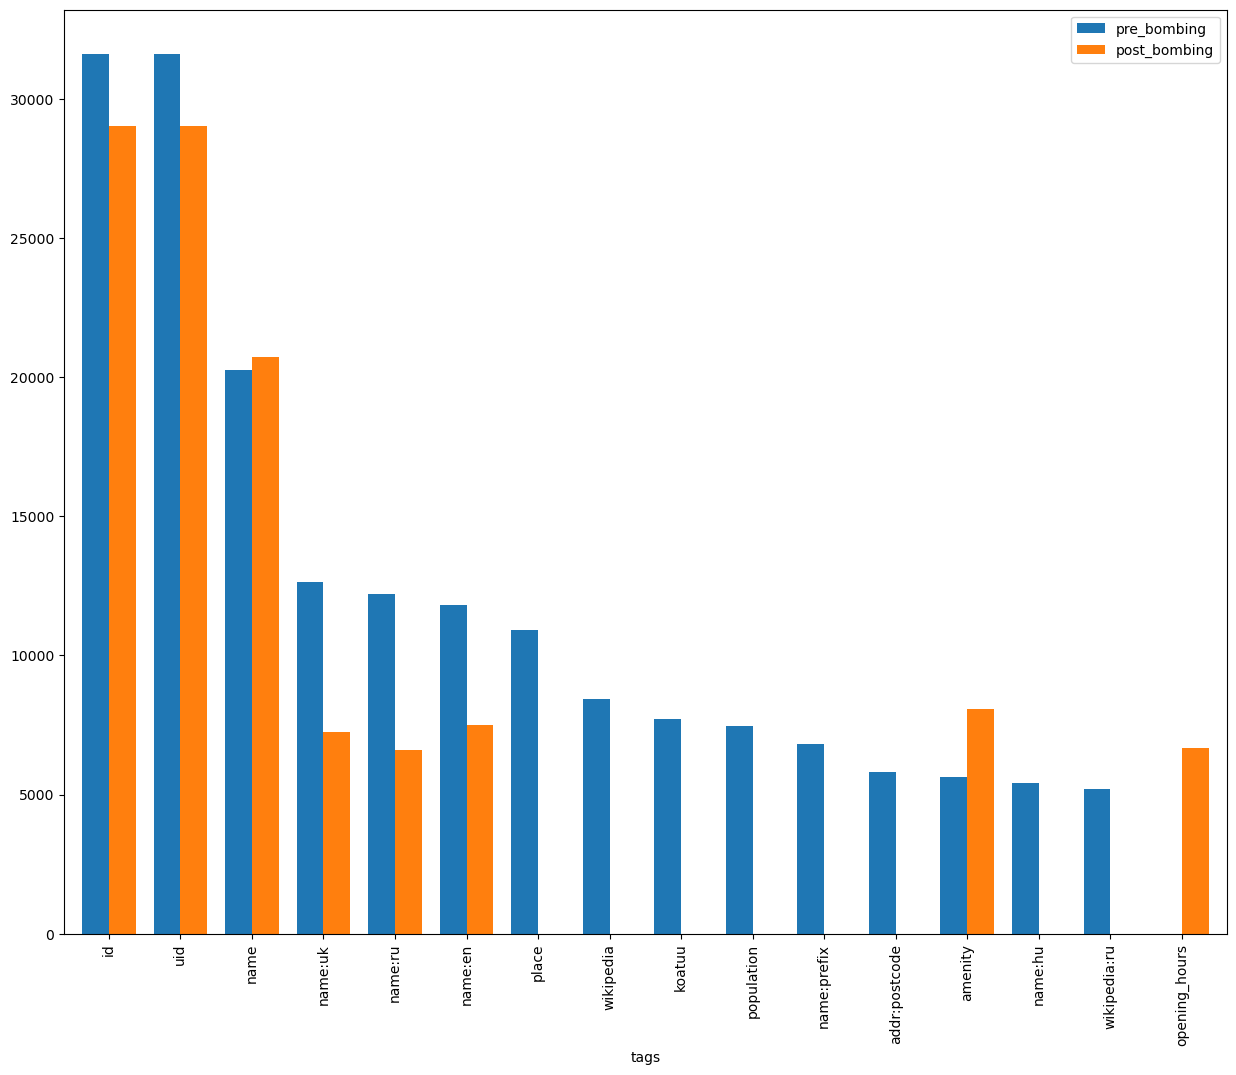

In [181]:
x= df_tg['tags']
y=df_tg['total counts_x']
z=df_tg['total counts_y']

df_tg = pd.DataFrame({
    'tags': x,
    'pre_bombing':y,
    'post_bombing':z
})

ax = df_tg.plot(x="tags", y=["pre_bombing", "post_bombing"],width=0.75, kind="bar", rot=90,figsize=(15, 12))
x_ticks = ax.get_xticks()
x_tick_labels = ax.get_xticklabels()
plt.show()

<Axes: xlabel='total counts', ylabel='Count'>

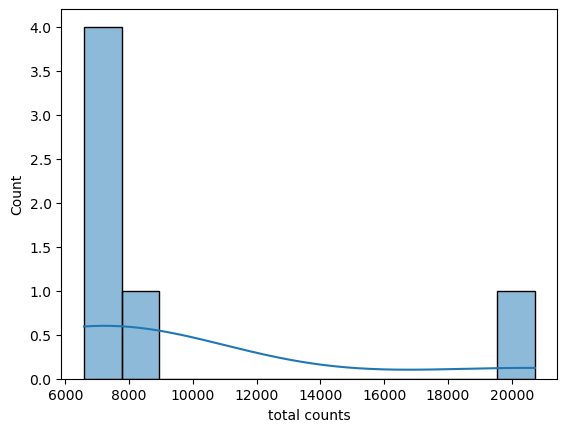

In [182]:
#frequency distribution of tag counts

db_plot=db18.loc[(db18['tags']!='id') & (db18['tags']!='uid'),:]
sb.histplot(data=db_plot, x='total counts',bins='auto',kde=True)

In [183]:
#list of tags for further analysis

column_keep2=db18["tags"].tolist()
column_keep2


['id',
 'uid',
 'name',
 'amenity',
 'name:en',
 'name:uk',
 'opening_hours',
 'name:ru']

In [184]:
db19=db17.loc[:,column_keep2]
db19.head()

id     uid               name   amenity name:en name:uk  \
0  1279063227  374661                NaN  pharmacy     NaN     NaN   
1  1279063227  374661                NaN  pharmacy     NaN     NaN   
2  1279063227  374661                NaN  pharmacy     NaN     NaN   
3  1279063227  374661  Аптека Мед-Сервіс  pharmacy     NaN     NaN   
4  1279063227  374661  Аптека Мед-Сервіс  pharmacy     NaN     NaN   

  opening_hours name:ru  
0           NaN     NaN  
1           NaN     NaN  
2           NaN     NaN  
3           NaN     NaN  
4           NaN     NaN

In [185]:
#calculating the frequency of unique values under each tags column

remove=['id','uid']

dict1 = {}
for column_name in db19.columns:
    if column_name not in remove:
        unique_value_counts = db19[column_name].value_counts()
        dict1[column_name] = unique_value_counts

sorted(dict1.items())

[('amenity',
  post_office           2710
  pharmacy               766
  bank                   675
  cafe                   651
  restaurant             469
                        ... 
  driving_school           1
  ice_cream                1
  bbq                      1
  clock                    1
  vehicle_inspection       1
  Name: amenity, Length: 71, dtype: int64),
 ('name',
  Нова Пошта №1                                 943
  Нова Пошта, відділення №1                     340
  Нова Пошта                                    257
  Нова Пошта №2                                 202
  Monobank                                      164
                                               ... 
  Свято - Покровський греко-католицький храм      1
  Кам’яне                                         1
  Ур. Кевеле                                      1
  Драшівець                                       1
  Пекарня Босния                                  1
  Name: name, Length: 3851, dtype: int64),

In [186]:
uniquevalues=pd.DataFrame.from_dict(dict1)
uniquevalues

name  amenity  name:en  name:uk  \
 Chalet                          2.0      NaN      NaN      NaN   
 туристический комплекс "Во...   1.0      NaN      NaN      NaN   
"Bograch"                        NaN      NaN      2.0      NaN   
"Gostynets"                      NaN      NaN      4.0      NaN   
"Liberty bell"                   1.0      NaN      NaN      1.0   
...                              ...      ...      ...      ...   
№13 ТОВ "Хустфарм"               6.0      NaN      NaN      6.0   
№16 ТОВ "Хустфарм"               8.0      NaN      NaN      8.0   
№5 ТОВ "Хустфарм"                6.0      NaN      NaN      6.0   
№6                               2.0      NaN      NaN      2.0   
№9 ТОВ "Хустфарм"                3.0      NaN      NaN      3.0   

                                opening_hours  name:ru  
 Chalet                                   NaN      NaN  
 туристический комплекс "Во...            NaN      NaN  
"Bograch"                                 NaN      NaN  
"Gostynets"                               NaN      NaN  
"Liberty bell"                            NaN      NaN  
...                                       ...      ...  
№13 ТОВ "Хустфарм"                        NaN      NaN  
№16 ТОВ "Хустфарм"                        NaN      NaN  
№5 ТОВ "Хустфарм"                         NaN      NaN  
№6                                        NaN      NaN  
№9 ТОВ "Хустфарм"                         NaN      NaN  

[6304 rows x 6 columns]

In [187]:
#displayong the list of unique tags stored by each contributor 

uid_column_name = 'uid'
grouped = db19.groupby(uid_column_name)

# Initialize an empty dictionary to store the results
dict2 = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Apply the unique() function to the current column within each group
        unique_values = grouped[column_name].unique().apply(list)
        
        # Store the unique values in the result_dict with the column_name as the key
        dict2[column_name] = unique_values

        
#storing dictionary into table 
uniquetags2=pd.DataFrame.from_dict(dict2)
uniquetags2=uniquetags2.drop(['id'],axis=1)
uniquetags2.head()

name                        amenity  \
uid                                                                   
4815   [Point 1429, Геришаска, Ко...                          [nan]   
11238                          [nan]                          [nan]   
62361  [nan, центр европи, Кузій,...                          [nan]   
69966                          [nan]                          [nan]   
94578  [Легенда карпат, Eva, Альф...  [nan, bank, post_office, a...   

                             name:en                        name:uk  \
uid                                                                   
4815      [nan, Gerisaska, Kostrino]                [nan, Кострино]   
11238                          [nan]                          [nan]   
62361                          [nan]                          [nan]   
69966                          [nan]                          [nan]   
94578  [nan, Ukrposhta 89607, Pla...  [nan, Укрпошта 89607, Апте...   

                       opening_hours                        name:ru  
uid                                                                  
4815                           [nan]                          [nan]  
11238                          [nan]                          [nan]  
62361                          [nan]                          [nan]  
69966                          [nan]                          [nan]  
94578  [Mo-Su 07:30-00:00, nan, M...  [nan, Аптека оптовых цен, ...

In [188]:
#count unique values for each of these tags that are added by contributors 
uid_column_name = 'uid'
dict_re = {}

# Iterate over each column (excluding the 'uid' column)
for column_name in db19.columns:
    if column_name != uid_column_name:
        # Get the unique values for the current column within each group
        unique_values = grouped[column_name].unique()
        
        #  count the total number of unique values
        total_unique_count = len(set([item for sublist in unique_values for item in sublist]))
        
        # Store the total unique count in the dict_re with the column_name as the key
        dict_re[column_name] = total_unique_count
        
dict_re

{'id': 7008,
 'name': 3852,
 'amenity': 72,
 'name:en': 1362,
 'name:uk': 972,
 'opening_hours': 532,
 'name:ru': 707}

In [189]:
# countinng the frequency of each tags added by each of the contributors 

grouped = db19.groupby(uid_column_name)
dict3 = {}

for column_name in db19.columns:
    if column_name != uid_column_name:
        unique_values = grouped[column_name].nunique()
        dict3[column_name] = unique_values

In [190]:
#converting the resulting dictionary into dataframe

contributor_base2=pd.DataFrame.from_dict(dict3)
contributor_base2.reset_index()
contributor_base2=contributor_base2.drop(['id'],axis=1)
contributor_base2

name  amenity  name:en  name:uk  opening_hours  name:ru
uid                                                              
4815         3        0        2        1              0        0
11238        0        0        0        0              0        0
62361        3        0        0        0              0        0
69966        0        0        0        0              0        0
94578      740       36      235      208            272      131
...        ...      ...      ...      ...            ...      ...
16825225     2        1        0        0              0        0
16846372     1        1        0        0              0        0
16903311     1        0        0        0              0        0
16912060     4        0        0        0              0        0
16913652     3        0        0        0              0        0

[164 rows x 6 columns]

In [191]:
#creating user profile based on previously derived features of all contributors

contributor_base2=timeframe_1.merge(contributor_base2, how='left',on='uid')
contributor_base2=changesets2.merge(contributor_base2, how='left',on='uid')
contributor_base2=version_list2.merge(contributor_base2, how='left',on='uid')
contributor_base2['version'] = contributor_base2['version'].str[:6]
contributor_base2=contributor_base2.merge(df_del2.loc[:,'deleted nodes'], how='left',on='uid')
contributor_base2=id_counts2.merge(contributor_base2, how='left',on='uid')

In [192]:
#final contributor_base that contributed during the 6 months before bombing

contributor_base2

uid    id contribution level             version  new nodes  \
0        4815     2           inactive              [7, 3]          0   
1        5359    14           inactive  [4, 3, 2, 2, 2, 2]          0   
2       11238  2194      casual mapper  [2, 2, 2, 2, 3, 2]       1753   
3       13861    20           inactive  [1, 1, 1, 1, 1, 1]         20   
4       22199   151           inactive  [1, 1, 1, 1, 1, 1]        151   
..        ...   ...                ...                 ...        ...   
251  16825225     1           inactive                 [2]          0   
252  16846372     1           inactive                 [1]          1   
253  16903311     1           inactive                 [2]          0   
254  16912060     2           inactive              [3, 4]          0   
255  16913652     5           inactive     [2, 1, 1, 1, 1]          4   

     edited nodes  changeset active days  name  amenity  name:en  name:uk  \
0               2          1      1 days   3.0      0.0      2.0      1.0   
1              14          3     89 days   NaN      NaN      NaN      NaN   
2             441          5      4 days   0.0      0.0      0.0      0.0   
3               0          2      1 days   NaN      NaN      NaN      NaN   
4               0          1      1 days   NaN      NaN      NaN      NaN   
..            ...        ...         ...   ...      ...      ...      ...   
251             1          1      1 days   2.0      1.0      0.0      0.0   
252             0          1      1 days   1.0      1.0      0.0      0.0   
253             1          1      1 days   1.0      0.0      0.0      0.0   
254             2          2      1 days   4.0      0.0      0.0      0.0   
255             1          1      1 days   3.0      0.0      0.0      0.0   

     opening_hours  name:ru  deleted nodes  
0              0.0      0.0            NaN  
1              NaN      NaN            NaN  
2              0.0      0.0           76.0  
3              NaN      NaN            NaN  
4              NaN      NaN            NaN  
..             ...      ...            ...  
251            0.0      0.0            NaN  
252            0.0      0.0            NaN  
253            0.0      0.0            NaN  
254            0.0      0.0            NaN  
255            0.0      0.0            NaN  

[256 rows x 15 columns]

In [193]:
contributor_base2

uid    id contribution level             version  new nodes  \
0        4815     2           inactive              [7, 3]          0   
1        5359    14           inactive  [4, 3, 2, 2, 2, 2]          0   
2       11238  2194      casual mapper  [2, 2, 2, 2, 3, 2]       1753   
3       13861    20           inactive  [1, 1, 1, 1, 1, 1]         20   
4       22199   151           inactive  [1, 1, 1, 1, 1, 1]        151   
..        ...   ...                ...                 ...        ...   
251  16825225     1           inactive                 [2]          0   
252  16846372     1           inactive                 [1]          1   
253  16903311     1           inactive                 [2]          0   
254  16912060     2           inactive              [3, 4]          0   
255  16913652     5           inactive     [2, 1, 1, 1, 1]          4   

     edited nodes  changeset active days  name  amenity  name:en  name:uk  \
0               2          1      1 days   3.0      0.0      2.0      1.0   
1              14          3     89 days   NaN      NaN      NaN      NaN   
2             441          5      4 days   0.0      0.0      0.0      0.0   
3               0          2      1 days   NaN      NaN      NaN      NaN   
4               0          1      1 days   NaN      NaN      NaN      NaN   
..            ...        ...         ...   ...      ...      ...      ...   
251             1          1      1 days   2.0      1.0      0.0      0.0   
252             0          1      1 days   1.0      1.0      0.0      0.0   
253             1          1      1 days   1.0      0.0      0.0      0.0   
254             2          2      1 days   4.0      0.0      0.0      0.0   
255             1          1      1 days   3.0      0.0      0.0      0.0   

     opening_hours  name:ru  deleted nodes  
0              0.0      0.0            NaN  
1              NaN      NaN            NaN  
2              0.0      0.0           76.0  
3              NaN      NaN            NaN  
4              NaN      NaN            NaN  
..             ...      ...            ...  
251            0.0      0.0            NaN  
252            0.0      0.0            NaN  
253            0.0      0.0            NaN  
254            0.0      0.0            NaN  
255            0.0      0.0            NaN  

[256 rows x 15 columns]

In [194]:
uidlist2=contributor_base2['uid'].to_list()
list_activeuid=set(uid_list).intersection(uidlist2)
n=len(list_activeuid)

print('Number of users active after bombing: ',n)

Number of users active after bombing:  70


In [195]:
result = [item for item in uidlist2 if item not in list_activeuid]

In [196]:
print(len(result))

186


## *Analysing location data for the 6 months period*


In [197]:
#fetching locations to analyse spatial data
zakar6=zakar_2.drop(['deleted','version','visibility','tp','extra'],axis=1)
zakar6

id  changeset                  timestamp       uid  \
0        452464863  123966239  2022-07-23 09:32:45+01:00  10553599   
1       5467980118  119918026  2022-04-19 18:35:44+01:00  15483615   
2       5468391207  121327556  2022-05-22 17:59:50+01:00  15483615   
3       2460195066  124686301  2022-08-09 14:26:41+01:00   7154639   
4       3669342838  119517189  2022-04-09 21:34:36+01:00   3023916   
...            ...        ...                        ...       ...   
202275  9869148018  123252390  2022-07-05 22:49:35+01:00   1739740   
202276  9853440685  122959825  2022-06-28 15:09:54+01:00    693154   
202277  9613001570  119018227  2022-03-28 12:46:59+01:00  10857625   
202278  9624298144  119123997  2022-03-30 17:28:23+01:00   3023916   
202279  8254308324  122432769  2022-06-15 20:44:09+01:00   1739740   

                     user   latitude  longitude        date  
0                Filip009  49.004485  22.440338  2022-07-23  
1               red_brand  48.642877  22.300631  2022-04-19  
2               red_brand  48.657827  22.337595  2022-05-22  
3               trofimich  48.646850  23.333922  2022-08-09  
4              neviksasha  48.441727  22.730602  2022-04-09  
...                   ...        ...        ...         ...  
202275           андриано  48.608051  22.316602  2022-07-05  
202276  Władysław Komorek  49.016221  22.892235  2022-06-28  
202277        muchichka_s  48.446334  22.730730  2022-03-28  
202278         neviksasha  48.440219  22.713695  2022-03-30  
202279           андриано  48.601882  22.291706  2022-06-15  

[202280 rows x 8 columns]

In [198]:
# grouing by uid and calculating mean value of latitudes
db20=zakar6.groupby(['uid'])['latitude'].mean()
db20=db20.reset_index()
db20

uid   latitude
0        4815  48.607735
1        5359  48.560828
2       11238  48.652447
3       13861  47.914099
4       22199  48.311229
..        ...        ...
251  16825225  48.611934
252  16846372  48.056579
253  16903311  48.618423
254  16912060  48.239471
255  16913652  48.526563

[256 rows x 2 columns]

In [199]:
# grouing by uid and calculating mean value of longitude

db21=zakar6.groupby(['uid'])['longitude'].mean()
db21=db21.reset_index()
db20

uid   latitude
0        4815  48.607735
1        5359  48.560828
2       11238  48.652447
3       13861  47.914099
4       22199  48.311229
..        ...        ...
251  16825225  48.611934
252  16846372  48.056579
253  16903311  48.618423
254  16912060  48.239471
255  16913652  48.526563

[256 rows x 2 columns]

In [200]:
mean_loc2=db20.merge(db21, on='uid')

In [201]:
mean_loc2

uid   latitude  longitude
0        4815  48.607735  23.377733
1        5359  48.560828  22.899781
2       11238  48.652447  24.261886
3       13861  47.914099  24.151389
4       22199  48.311229  23.038784
..        ...        ...        ...
251  16825225  48.611934  24.194130
252  16846372  48.056579  23.108959
253  16903311  48.618423  24.111988
254  16912060  48.239471  24.228106
255  16913652  48.526563  24.154197

[256 rows x 3 columns]

In [202]:
#Finding the locations of the first node contributed by each user

db22=zakar6.sort_values(['uid', 'date'], ascending=[True,True])
db22

id  changeset                  timestamp       uid       user  \
32545    943552660  122495093  2022-06-17 08:39:58+01:00      4815   *Martin*   
111851  4640034266  122495093  2022-06-17 08:39:58+01:00      4815   *Martin*   
91032   4706810321  118294675  2022-03-09 21:11:15+00:00      5359  user_5359   
57416   5647838842  118418911  2022-03-13 06:11:43+00:00      5359  user_5359   
23456   9760960006  121960681  2022-06-05 07:21:54+01:00      5359  user_5359   
...            ...        ...                        ...       ...        ...   
31685   9972106119  125266438  2022-08-23 12:22:15+01:00  16913652       riz9   
83689   2880820717  125266438  2022-08-23 12:22:13+01:00  16913652       riz9   
108212  9972090223  125266438  2022-08-23 12:22:16+01:00  16913652       riz9   
128957  9972106120  125266438  2022-08-23 12:22:16+01:00  16913652       riz9   
176653  9972106018  125266438  2022-08-23 12:22:15+01:00  16913652       riz9   

         latitude  longitude        date  
32545   48.273788  24.162138  2022-06-17  
111851  48.941682  22.593328  2022-06-17  
91032   48.611615  22.264249  2022-03-09  
57416   48.619782  22.295515  2022-03-13  
23456   48.551419  23.002699  2022-06-05  
...           ...        ...         ...  
31685   48.511648  24.181144  2022-08-23  
83689   48.527766  24.147453  2022-08-23  
108212  48.542497  24.126046  2022-08-23  
128957  48.531405  24.136713  2022-08-23  
176653  48.519501  24.179627  2022-08-23  

[202280 rows x 8 columns]

In [203]:
db23=db22.groupby('uid')

first_row= db23.first()
first_record2=pd.DataFrame(first_row).reset_index()
first_record2

uid          id  changeset                  timestamp  \
0        4815   943552660  122495093  2022-06-17 08:39:58+01:00   
1        5359  4706810321  118294675  2022-03-09 21:11:15+00:00   
2       11238  9740962894  121007304  2022-05-15 11:39:03+01:00   
3       13861  9689456375  120118859  2022-04-24 11:32:10+01:00   
4       22199  9624777282  119131211  2022-03-30 21:04:58+01:00   
..        ...         ...        ...                        ...   
251  16825225  8914722455  124863059  2022-08-13 19:04:04+01:00   
252  16846372  9956099618  124951929  2022-08-16 05:42:28+01:00   
253  16903311  4204291993  125218804  2022-08-22 11:03:30+01:00   
254  16912060  3656601056  125258388  2022-08-23 09:14:25+01:00   
255  16913652  9972106119  125266438  2022-08-23 12:22:15+01:00   

               user   latitude  longitude        date  
0          *Martin*  48.273788  24.162138  2022-06-17  
1         user_5359  48.611615  22.264249  2022-03-09  
2           fahrrad  48.640058  24.329501  2022-05-15  
3        Abendstund  47.914072  24.153723  2022-04-24  
4    FabianAffolter  48.310906  23.041531  2022-03-30  
..              ...        ...        ...         ...  
251       Viktor_Ku  48.611934  24.194130  2022-08-13  
252         Самарук  48.056579  23.108959  2022-08-16  
253         ahryniv  48.618423  24.111988  2022-08-22  
254       StarodubO  48.229688  24.235716  2022-08-23  
255            riz9  48.511648  24.181144  2022-08-23  

[256 rows x 8 columns]

In [204]:
#finding the median value of the latitude and longitude contributed by each user


db25=zakar6.groupby(['uid'])['latitude'].median()
db26=zakar6.groupby(['uid'])['longitude'].median()

In [205]:
db25=db25.reset_index()
db26=db26.reset_index()
median_loc2=db25.merge(db26, on='uid')

In [206]:
median_loc2

uid   latitude  longitude
0        4815  48.607735  23.377733
1        5359  48.551810  23.002693
2       11238  48.639169  24.216029
3       13861  47.913888  24.151452
4       22199  48.311448  23.037936
..        ...        ...        ...
251  16825225  48.611934  24.194130
252  16846372  48.056579  23.108959
253  16903311  48.618423  24.111988
254  16912060  48.239471  24.228106
255  16913652  48.527766  24.147453

[256 rows x 3 columns]

### *Plotting all three measures of location data to understand the activity*


C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

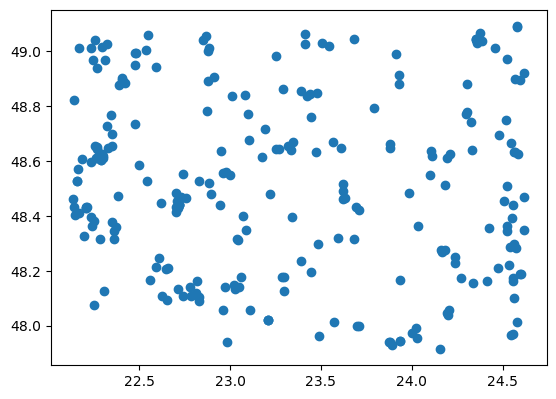

In [207]:
crs={'init':'epsg:4326'}
geometry4=[Point(xy) for xy in zip(first_record2["longitude"], first_record2["latitude"])]
geodata4=gpd.GeoDataFrame(first_record2,crs=crs, geometry=geometry4)
geodata4.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

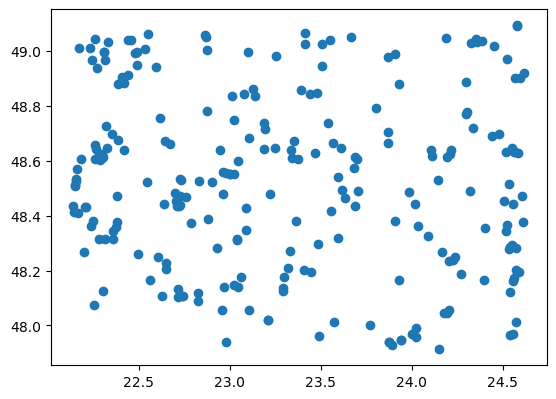

In [208]:
#plotting the median value location of nodes created by each usercrs={'init':'epsg:4326'}
geometry5=[Point(xy) for xy in zip(median_loc2["longitude"], median_loc2["latitude"])]
geodata5=gpd.GeoDataFrame(median_loc2,crs=crs, geometry=geometry5)
geodata5.plot()

C:\Users\Shruti\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

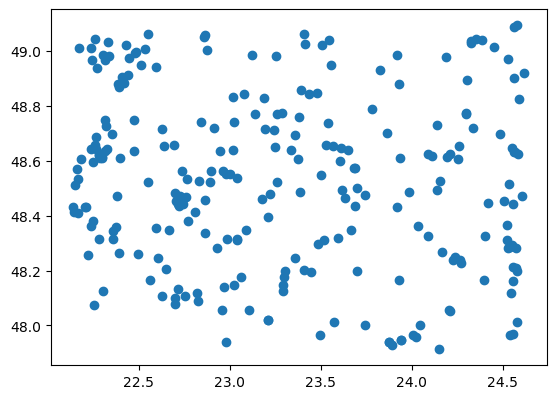

In [209]:
#plotting the mean value of locations

crs={'init':'epsg:4326'}
geometry6=[Point(xy) for xy in zip(mean_loc2["longitude"], mean_loc2["latitude"])]
geodata6=gpd.GeoDataFrame(mean_loc2,crs=crs, geometry=geometry6)
geodata6.plot()

Text(0.5, 0.98, 'zakar mapping pattern')

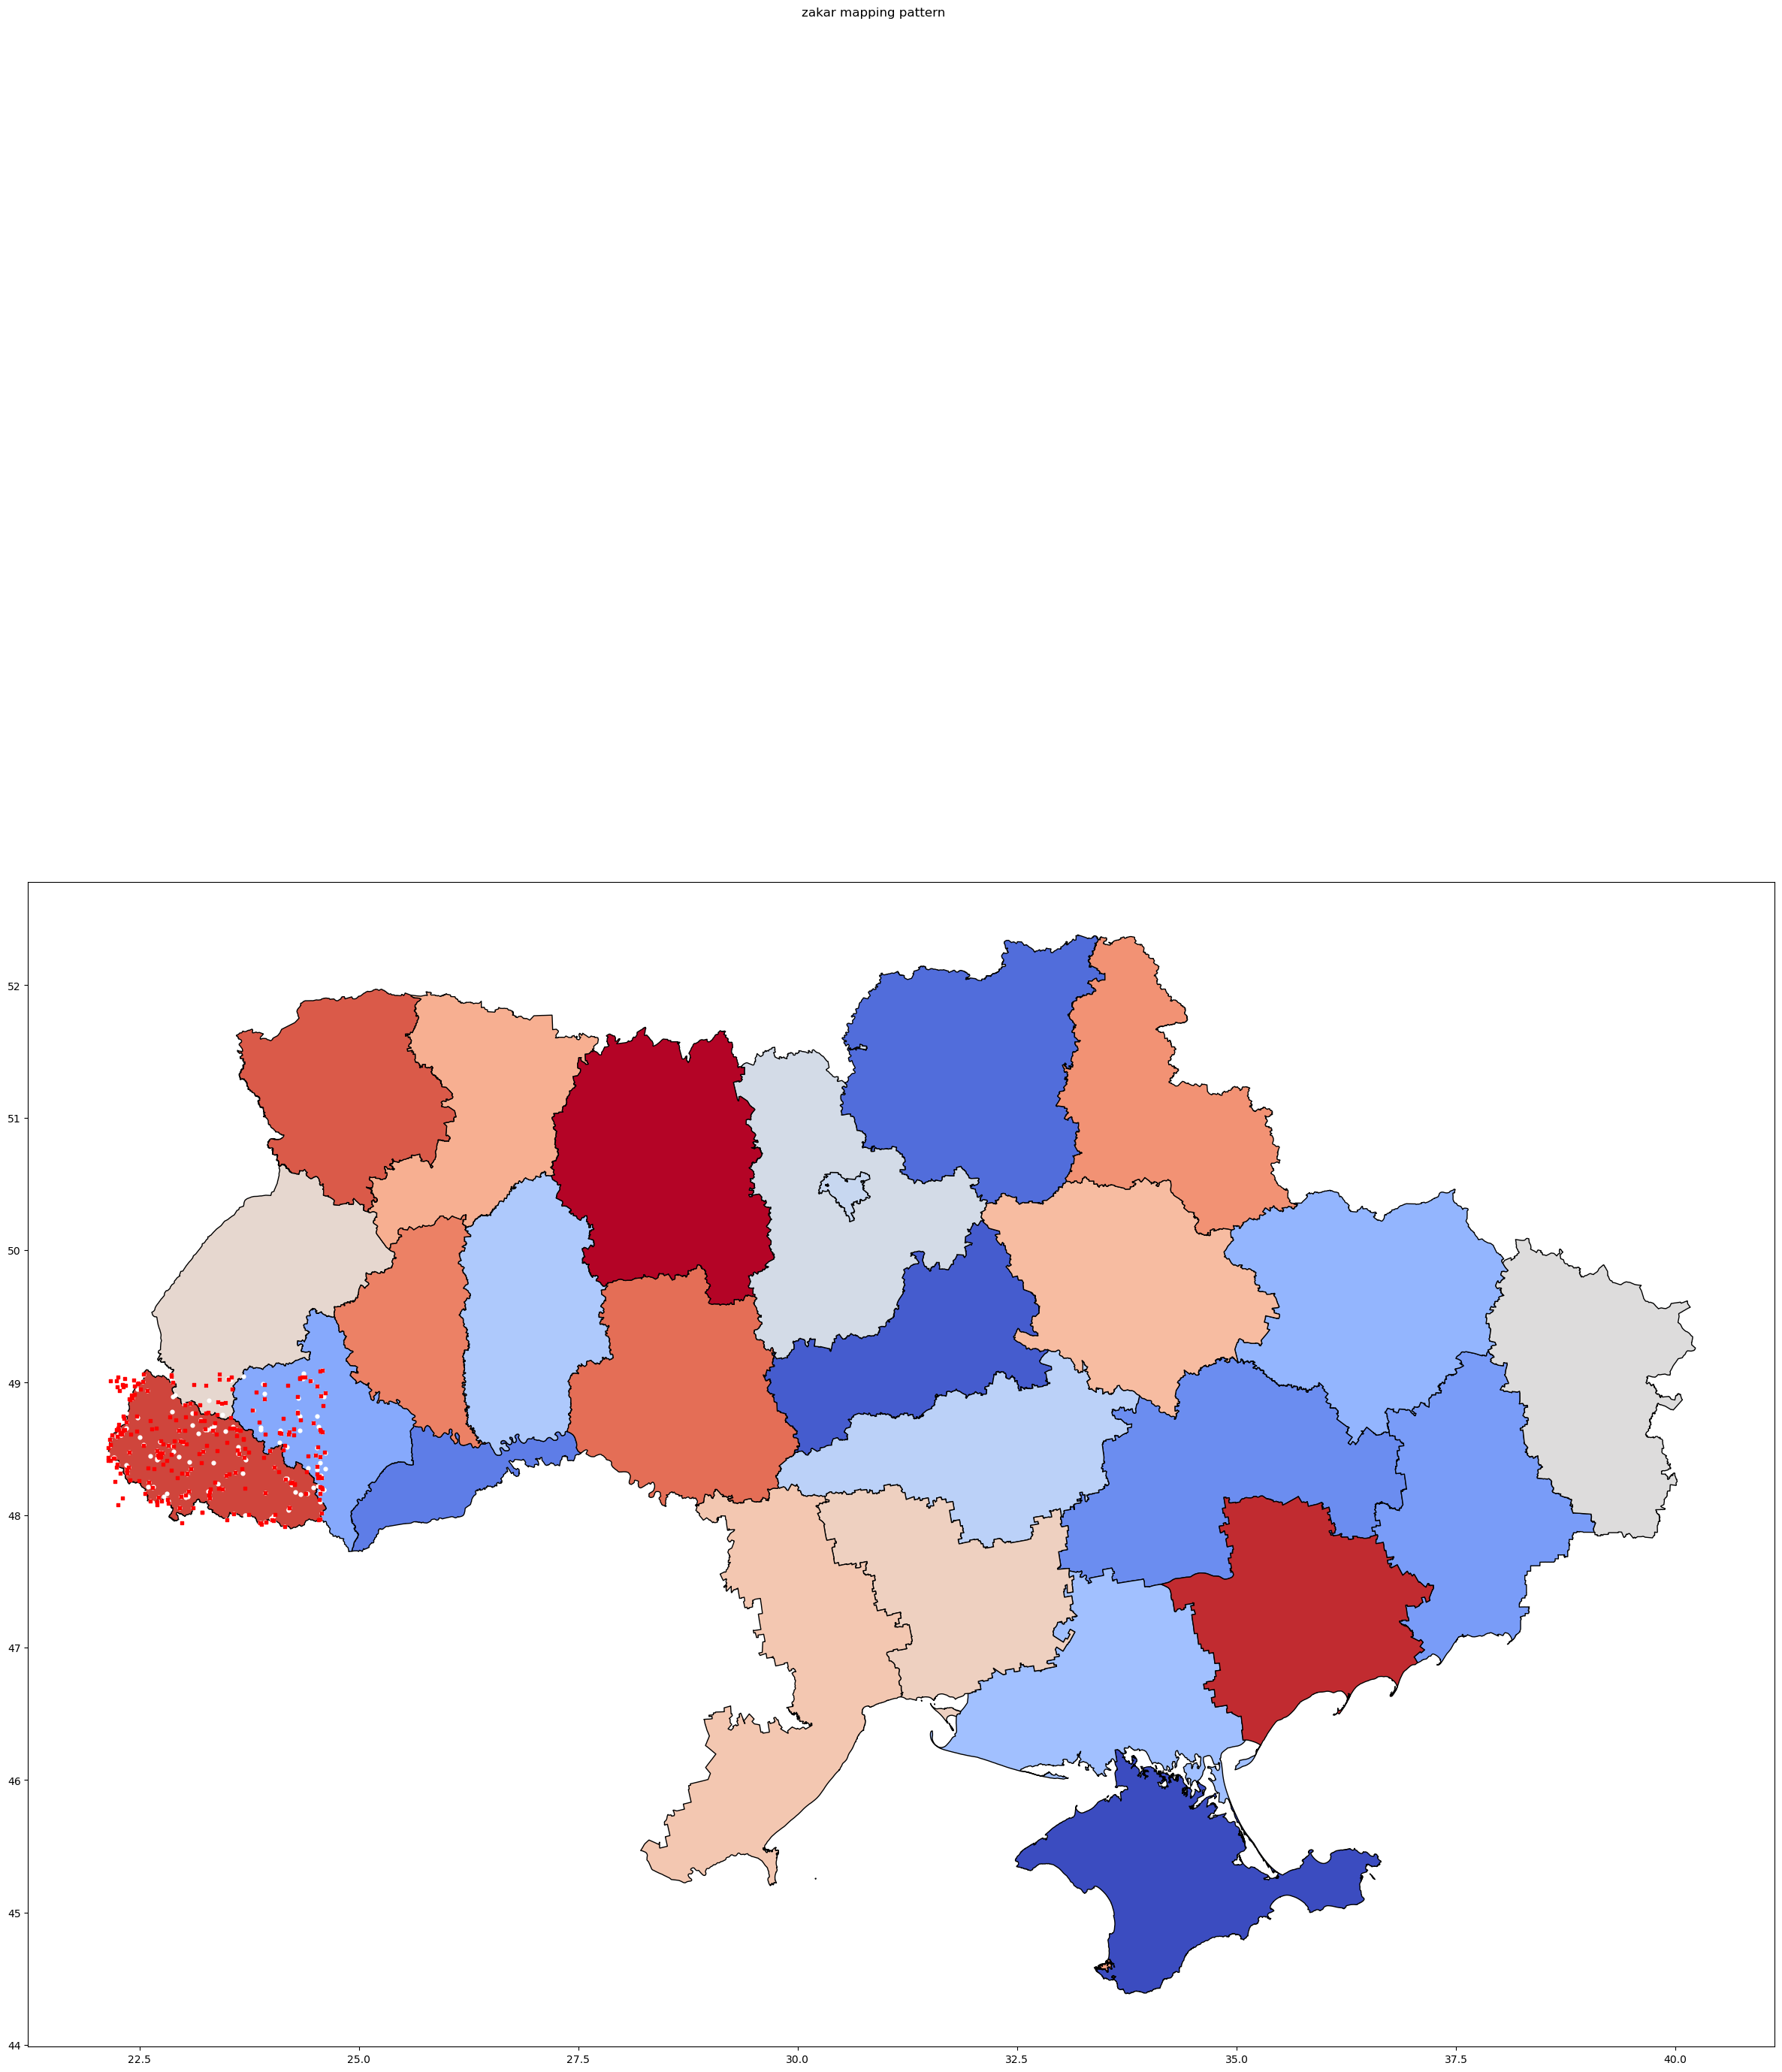

In [210]:
#creating plot with Ukraine's map to understand mapping pattern of the contributors

fig,ax = plt.subplots(figsize=(30, 40))


color = 'blue'

cmapblue = LinearSegmentedColormap.from_list('custom_cmap', [(0, color), (1, color)], N=256)
shapefile.plot(facecolor='white', edgecolor='k',alpha=1,linewidth=1,cmap='coolwarm',ax=ax)


g=geodata4.plot(ax=ax,color='white', marker='o',markersize=12,legend=True);
g=geodata6.plot(ax=ax,color='red',marker='s',markersize=12,legend=True);

fig.suptitle('zakar mapping pattern', fontsize=12)



### *Analysing dispersion of mapping using Statistical measure*

In [211]:
db27=zakar6.loc[:,['uid','latitude','longitude']]
db27.head()

uid   latitude  longitude
0  10553599  49.004485  22.440338
1  15483615  48.642877  22.300631
2  15483615  48.657827  22.337595
3   7154639  48.646850  23.333922
4   3023916  48.441727  22.730602

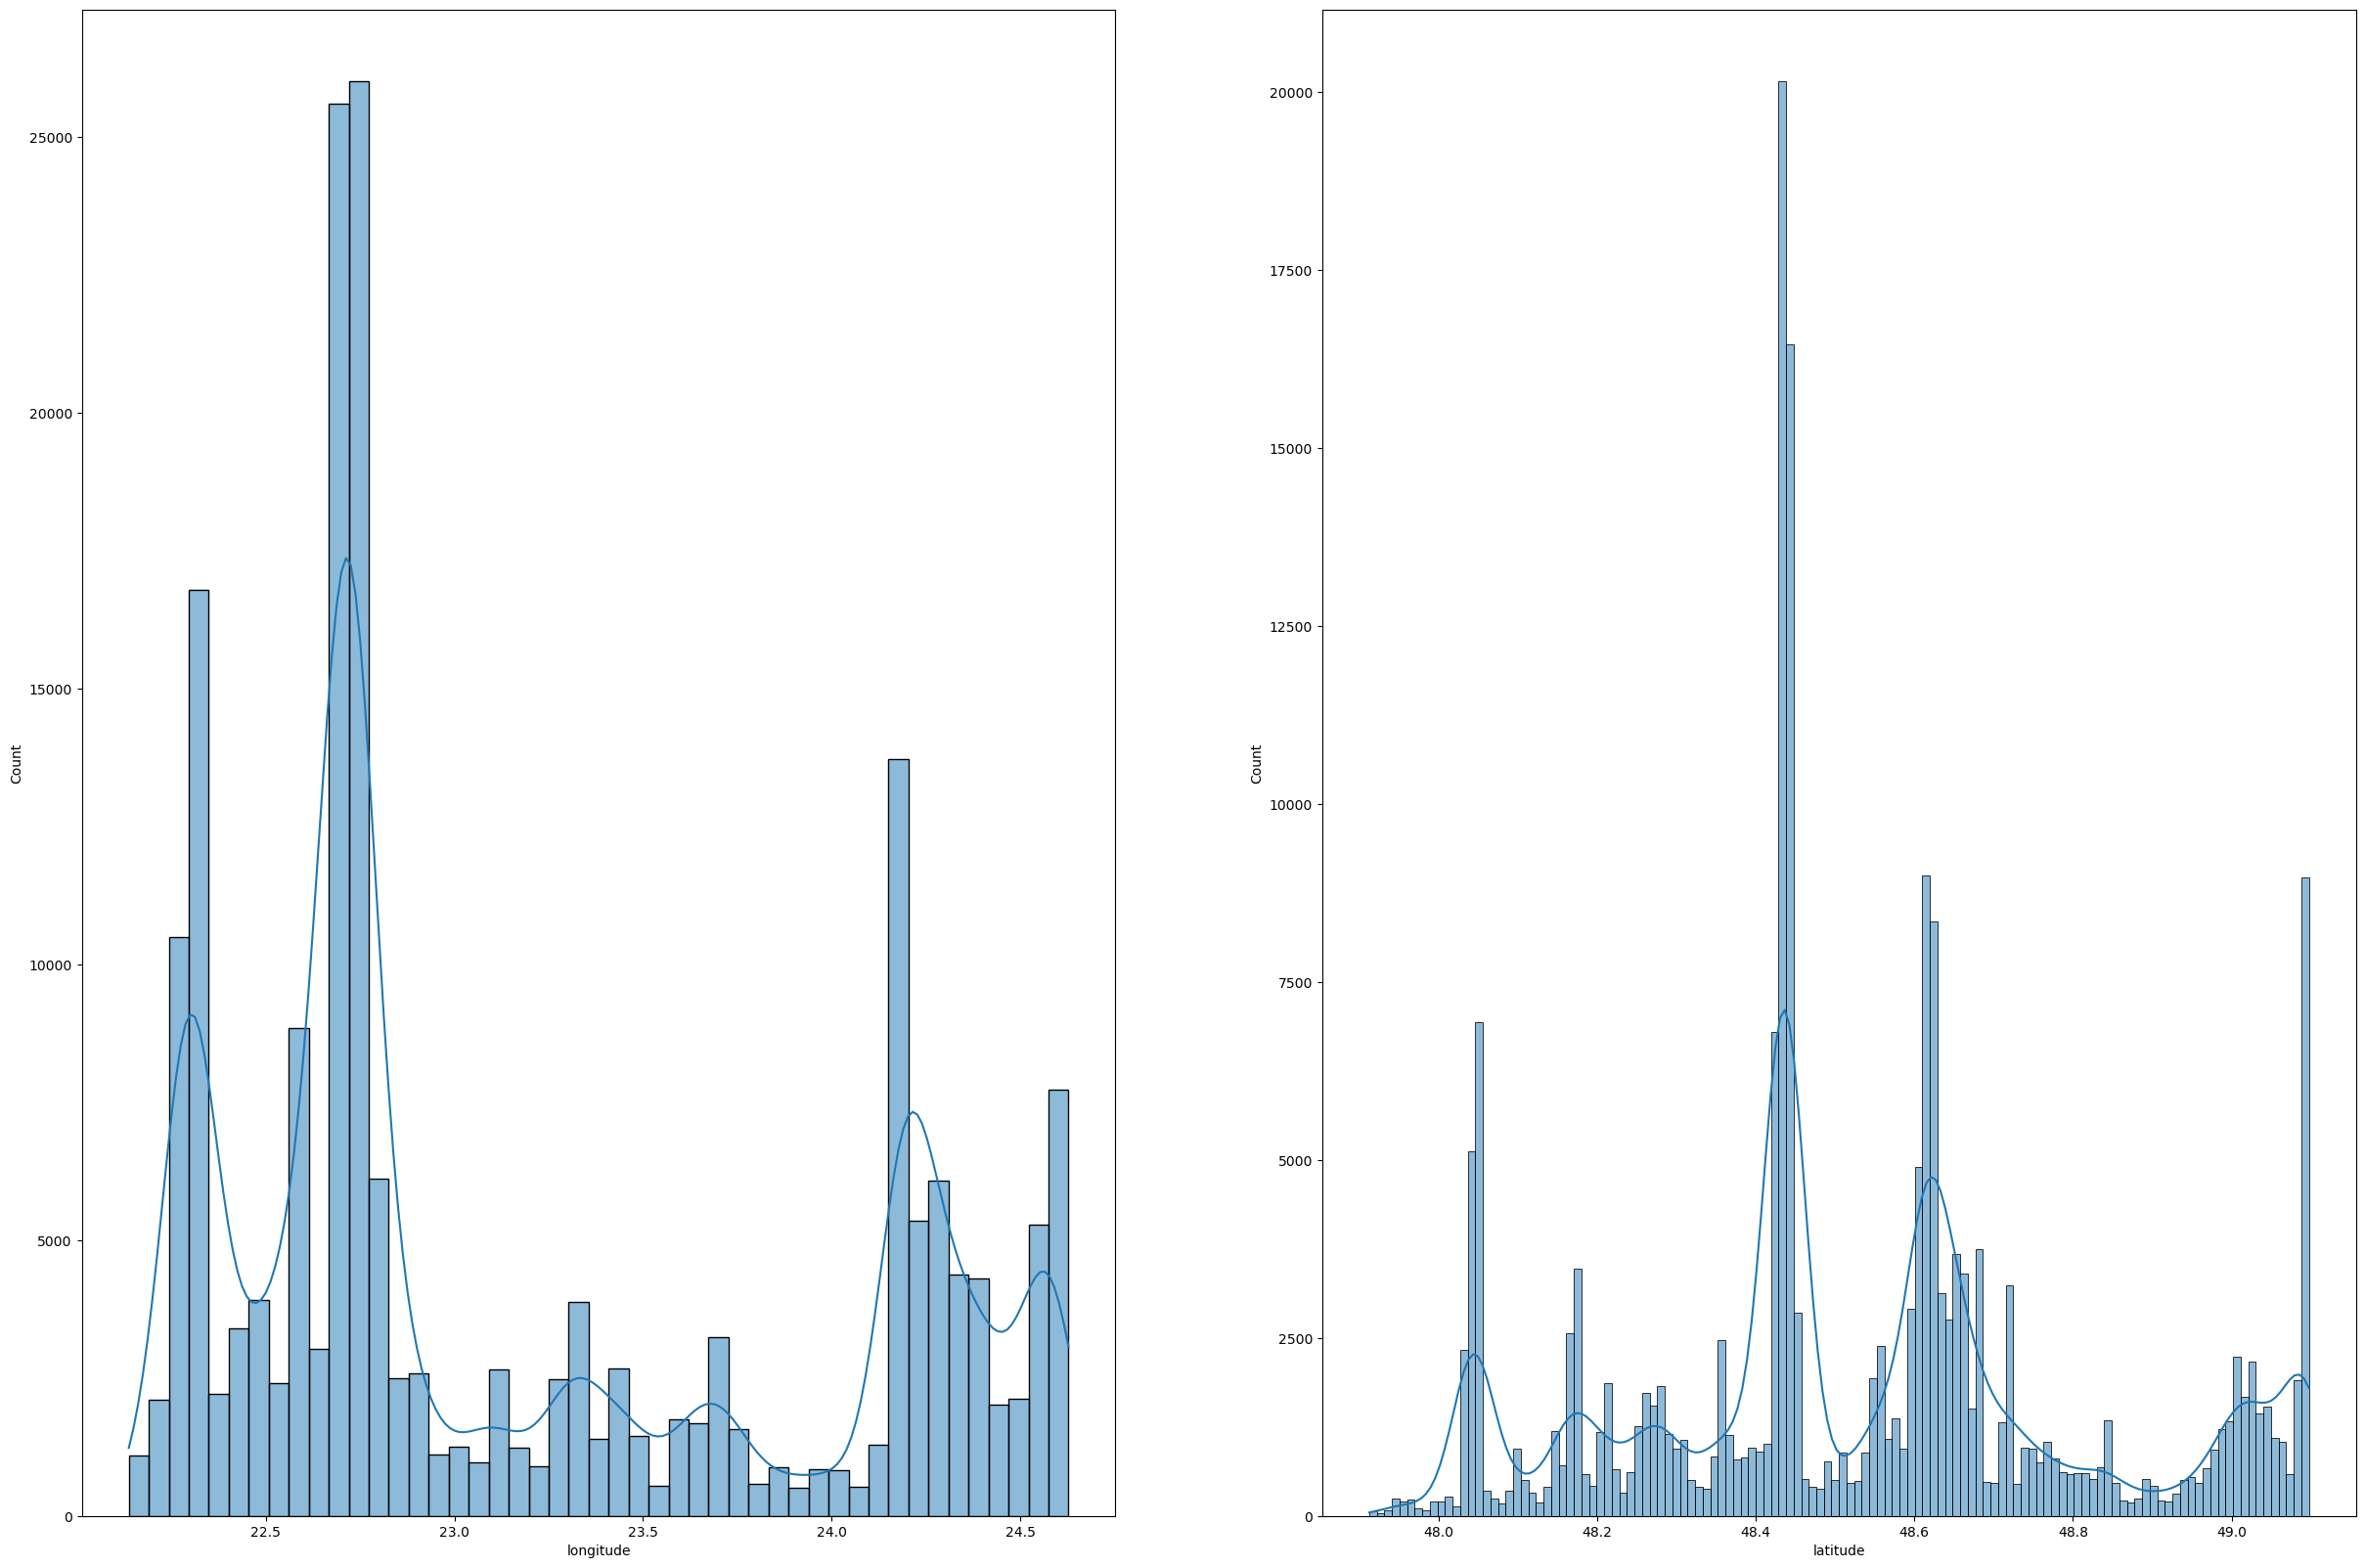

In [212]:
# frequency distribution of latitude and longitude measures

fig,axes= plt.subplots(1,2,figsize=(30, 20))

axes = axes.flatten()

s=sb.histplot(data=db27, x='longitude',bins='auto',kde=True,ax=axes[0])
s=sb.histplot(data=db27, x='latitude',bins='auto',kde=True,ax=axes[1])

In [213]:
#calculating standard deviation of complete dataset 

p_std_lat2=st.pstdev(db27['latitude'])
p_std_lon2=st.pstdev(db27['longitude'])
print('Population std for latitude: ',p_std_lat2)
print('Population std for longitude: ',p_std_lon2)

Population std for latitude:  0.28779178948491246
Population std for longitude:  0.7843660146969522


In [214]:
#calculation foe mean value

p_mean_lat2=db27['latitude'].mean()
p_mean_lon2=db27['longitude'].mean()

print('Population mean for latitude: ',p_mean_lat2)
print('Population mean for latitude: ',p_mean_lon2)

Population mean for latitude:  48.535669656782176
Population mean for latitude:  23.17835054611084


In [215]:
#calculation for Coefficient of variance to understand the variability in mapping

cv_lat2=(p_std_lat2/p_mean_lat2)*100
cv_lon2=(p_std_lon2/p_mean_lon2)*100
print('CV for latitude: ',cv_lat2)
print('CV for longitude: ',cv_lon2)

CV for latitude:  0.5929490445274975
CV for longitude:  3.384045871325228


In [216]:
#calculating std for each contributor group

db28=db27.groupby('uid').agg('std',numeric_only='True')
db28=db28.reset_index()#
db28

uid  latitude  longitude
0        4815  0.472273   1.109316
1        5359  0.023302   0.262698
2       11238  0.039080   0.065151
3       13861  0.000588   0.002113
4       22199  0.000923   0.005430
..        ...       ...        ...
251  16825225       NaN        NaN
252  16846372       NaN        NaN
253  16903311       NaN        NaN
254  16912060  0.013835   0.010762
255  16913652  0.011738   0.025083

[256 rows x 3 columns]

In [217]:
db29=db28.merge(mean_loc2,on='uid',how='left')
db29= db29.rename(columns={'latitude_x': 'latitude'})
db29= db29.rename(columns={'longitude_x': 'longitude'})
db29= db29.rename(columns={'latitude_y': 'mean_lat'})
db29= db29.rename(columns={'longitude_y': 'mean_long'})
db29

uid  latitude  longitude   mean_lat  mean_long
0        4815  0.472273   1.109316  48.607735  23.377733
1        5359  0.023302   0.262698  48.560828  22.899781
2       11238  0.039080   0.065151  48.652447  24.261886
3       13861  0.000588   0.002113  47.914099  24.151389
4       22199  0.000923   0.005430  48.311229  23.038784
..        ...       ...        ...        ...        ...
251  16825225       NaN        NaN  48.611934  24.194130
252  16846372       NaN        NaN  48.056579  23.108959
253  16903311       NaN        NaN  48.618423  24.111988
254  16912060  0.013835   0.010762  48.239471  24.228106
255  16913652  0.011738   0.025083  48.526563  24.154197

[256 rows x 5 columns]

In [218]:
#calculation for CV applied to each group

db29['CV_lat']=(db29['latitude']/db29['mean_lat']*100)
db29['CV_lon']=(db29['longitude']/db29['mean_long'])*100
db29

uid  latitude  longitude   mean_lat  mean_long    CV_lat    CV_lon
0        4815  0.472273   1.109316  48.607735  23.377733  0.971600  4.745181
1        5359  0.023302   0.262698  48.560828  22.899781  0.047986  1.147164
2       11238  0.039080   0.065151  48.652447  24.261886  0.080326  0.268532
3       13861  0.000588   0.002113  47.914099  24.151389  0.001228  0.008751
4       22199  0.000923   0.005430  48.311229  23.038784  0.001911  0.023570
..        ...       ...        ...        ...        ...       ...       ...
251  16825225       NaN        NaN  48.611934  24.194130       NaN       NaN
252  16846372       NaN        NaN  48.056579  23.108959       NaN       NaN
253  16903311       NaN        NaN  48.618423  24.111988       NaN       NaN
254  16912060  0.013835   0.010762  48.239471  24.228106  0.028679  0.044420
255  16913652  0.011738   0.025083  48.526563  24.154197  0.024189  0.103844

[256 rows x 7 columns]

In [219]:
db29.sort_values('CV_lon',ascending=True)

uid  latitude  longitude   mean_lat  mean_long  CV_lat  CV_lon
63    1782528       0.0        0.0  48.479192  23.221001     0.0     0.0
129   6092005       0.0        0.0  48.440593  24.557366     0.0     0.0
26     415497       0.0        0.0  48.018408  23.211251     0.0     0.0
90    3026567       0.0        0.0  48.361201  24.037040     0.0     0.0
176  10291557       0.0        0.0  48.618531  22.288867     0.0     0.0
..        ...       ...        ...        ...        ...     ...     ...
245  16648314       NaN        NaN  48.286075  24.540250     NaN     NaN
249  16748621       NaN        NaN  48.248203  24.238097     NaN     NaN
251  16825225       NaN        NaN  48.611934  24.194130     NaN     NaN
252  16846372       NaN        NaN  48.056579  23.108959     NaN     NaN
253  16903311       NaN        NaN  48.618423  24.111988     NaN     NaN

[256 rows x 7 columns]

In [220]:

df_ts1= zakar1.loc[:,['date','id']]
df_ts1=df_ts1.groupby('date').count()
df_ts1=df_ts1.reset_index()
df_ts1['date']=pd.to_datetime(df_ts1['date'])
df_ts1 = df_ts1.set_index('date')

In [221]:
df_ts2= zakar4.loc[:,['date','id']]
df_ts2=df_ts2.groupby('date').count()
df_ts2=df_ts2.reset_index()
df_ts2['date']=pd.to_datetime(df_ts2['date'])
df_ts2 = df_ts2.set_index('date')

In [222]:
df_ts=df_ts1.append(df_ts2)
df_ts

C:\Users\Shruti\AppData\Local\Temp\ipykernel_47036\1232277424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ts=df_ts1.append(df_ts2)


id
date            
2021-08-24  3386
2021-08-25  2819
2021-08-26  5972
2021-08-27  1471
2021-08-28  1782
...          ...
2022-08-21   377
2022-08-22  1442
2022-08-23  1245
2022-08-24  2479
2022-08-25  6841

[367 rows x 1 columns]

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition
add_result = seasonal_decompose(df_ts, model='additive', period=30)


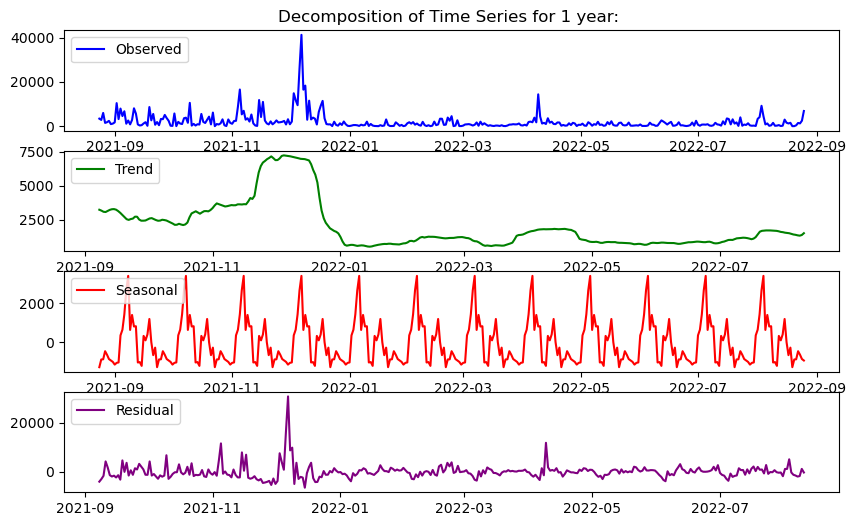

In [224]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
axes[0].set_title('Decomposition of Time Series for 1 year: ')
axes[0].plot(df_ts.index, add_result.observed, label='Observed', color='blue')
axes[1].plot(df_ts.index, add_result.trend, label='Trend', color='green')
axes[2].plot(df_ts.index, add_result.seasonal, label='Seasonal', color='red')
axes[3].plot(df_ts.index, add_result.resid, label='Residual', color='purple')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')

In [225]:
week1 = seasonal_decompose(df6, model='additive',period=2)
week2 = seasonal_decompose(db6, model='additive',period=2)

In [226]:
month1 = seasonal_decompose(df7, model='additive',period=7)
month2 = seasonal_decompose(db7, model='additive',period=7)

In [227]:
sixmonth1 = seasonal_decompose(df_ts1, model='additive',period=7)
sixmonth2 = seasonal_decompose(df_ts2, model='additive',period=7)


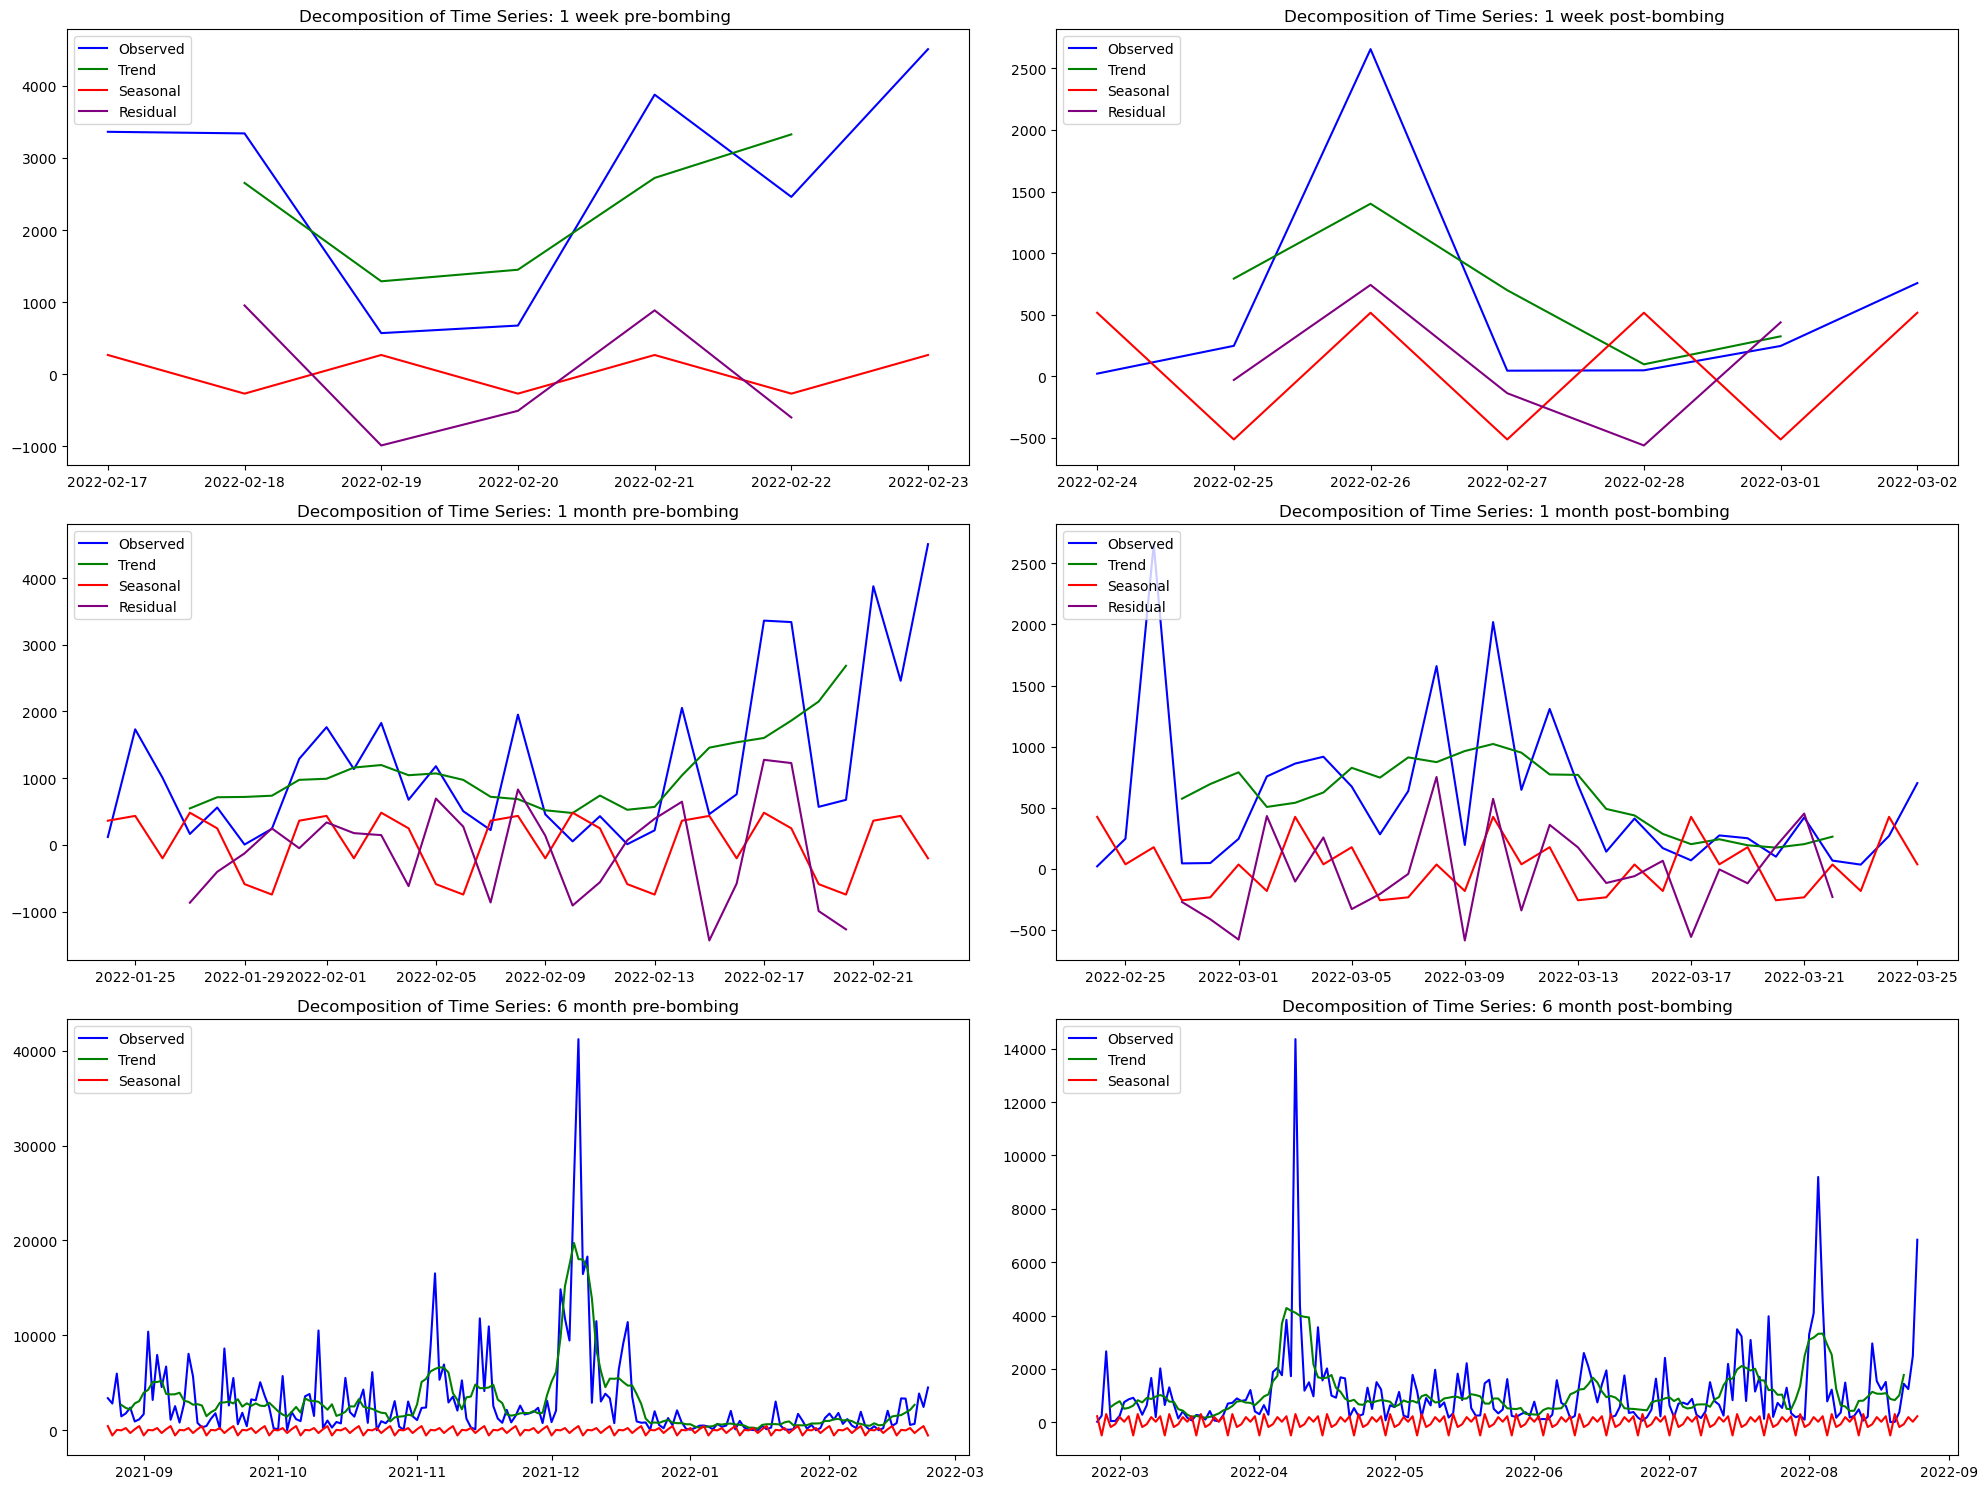

In [228]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

axes[0,0].set_title('Decomposition of Time Series: 1 week pre-bombing ')
axes[0,0].plot(df6.index, week1.observed, label='Observed', color='blue')
axes[0,0].plot(df6.index, week1.trend, label='Trend', color='green')
axes[0,0].plot(df6.index, week1.seasonal, label='Seasonal', color='red')
axes[0,0].plot(df6.index, week1.resid, label='Residual', color='purple')
axes[0,0].legend(loc='upper left')
axes[0,1].set_title('Decomposition of Time Series: 1 week post-bombing ')
axes[0,1].plot(db6.index, week2.observed, label='Observed', color='blue')
axes[0,1].plot(db6.index, week2.trend, label='Trend', color='green')
axes[0,1].plot(db6.index, week2.seasonal, label='Seasonal', color='red')
axes[0,1].plot(db6.index, week2.resid, label='Residual', color='purple')
axes[0,1].legend(loc='upper left')

axes[1,0].set_title('Decomposition of Time Series: 1 month pre-bombing')
axes[1,0].plot(df7.index, month1.observed, label='Observed', color='blue')
axes[1,0].plot(df7.index, month1.trend, label='Trend', color='green')
axes[1,0].plot(df7.index, month1.seasonal, label='Seasonal', color='red')
axes[1,0].plot(df7.index, month1.resid, label='Residual', color='purple')
axes[1,0].legend(loc='upper left')
axes[1,1].set_title('Decomposition of Time Series: 1 month post-bombing ')
axes[1,1].plot(db7.index, month2.observed, label='Observed', color='blue')
axes[1,1].plot(db7.index, month2.trend, label='Trend', color='green')
axes[1,1].plot(db7.index, month2.seasonal, label='Seasonal', color='red')
axes[1,1].plot(db7.index, month2.resid, label='Residual', color='purple')
axes[1,1].legend(loc='upper left')


axes[2,0].set_title('Decomposition of Time Series: 6 month pre-bombing')
axes[2,0].plot(df_ts1.index, sixmonth1.observed, label='Observed', color='blue')
axes[2,0].plot(df_ts1.index, sixmonth1.trend, label='Trend', color='green')
axes[2,0].plot(df_ts1.index, sixmonth1.seasonal, label='Seasonal', color='red')
#axes[2,0].plot(df_ts1.index, sixmonth1.resid, label='Residual', color='purple')
axes[2,0].legend(loc='upper left')
axes[2,1].set_title('Decomposition of Time Series: 6 month post-bombing')
axes[2,1].plot(df_ts2.index, sixmonth2.observed, label='Observed', color='blue')
axes[2,1].plot(df_ts2.index, sixmonth2.trend, label='Trend', color='green')
axes[2,1].plot(df_ts2.index, sixmonth2.seasonal, label='Seasonal', color='red')
#axes[2,1].plot(df_ts2.index, sixmonth2.resid, label='Residual', color='purple')
axes[2,1].legend(loc='upper left')

plt.tight_layout()

In [229]:
db6['id'].sum()

4015

In [230]:
db7['id'].sum()

16799

In [231]:
db9['id'].sum()

202347